In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('C:\\Users\\kirti\\Downloads')

In [3]:
df=pd.read_csv('Social_Media.csv')

In [4]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [5]:
df.shape

(11760, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [7]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [8]:
dupes = df.duplicated()
sum(dupes)

0

In [9]:
df.drop(['UserID'],axis='columns', inplace=True)

In [10]:
df.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,11179.0,280.830844,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,28170.481765,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,74.790029,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6531.699065,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,28.661565,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,0.793878,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,13.817432,9.070657,0.0,8.00,12.0,18.00,270.0


In [12]:
df['travelling_network_rating'] = df['travelling_network_rating'].astype('object')


In [13]:
df['Adult_flag'] = df['Adult_flag'].astype('object')

In [14]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TAKEN_PRODUCT :  2
Yes    1896
No     9864
Name: Taken_product, dtype: int64


PREFERRED_DEVICE :  10
Others                2
Other                 2
ANDROID             134
Android OS          145
Android             315
Mobile              600
iOS                1095
Laptop             1108
iOS and Android    4134
Tab                4172
Name: preferred_device, dtype: int64


YEARLY_AVG_OUTSTATION_CHECKINS :  30
*        1
27      96
21     143
13     150
22     152
12     159
17     160
14     167
19     176
28     180
25     198
26     199
20     199
15     206
18     208
23     215
29     215
24     223
11     229
6      236
16     255
4      256
5      261
8      320
7      336
3      336
9      340
10     682
2      844
1     4543
Name: yearly_avg_Outstation_checkins, dtype: int64


MEMBER_IN_FAMILY :  7
10         11
Three      15
5         384
1        1349
2        2256
4        3184
3        4561
Name: member_in_family, dtype: int64


PREFERRED_LOCATION_TYPE :  15
Movie     

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11707 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11685 non-null  object 
 5   member_in_family                              11760 non-null  object 
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

#### Univariate Analysis of Numeric Variables

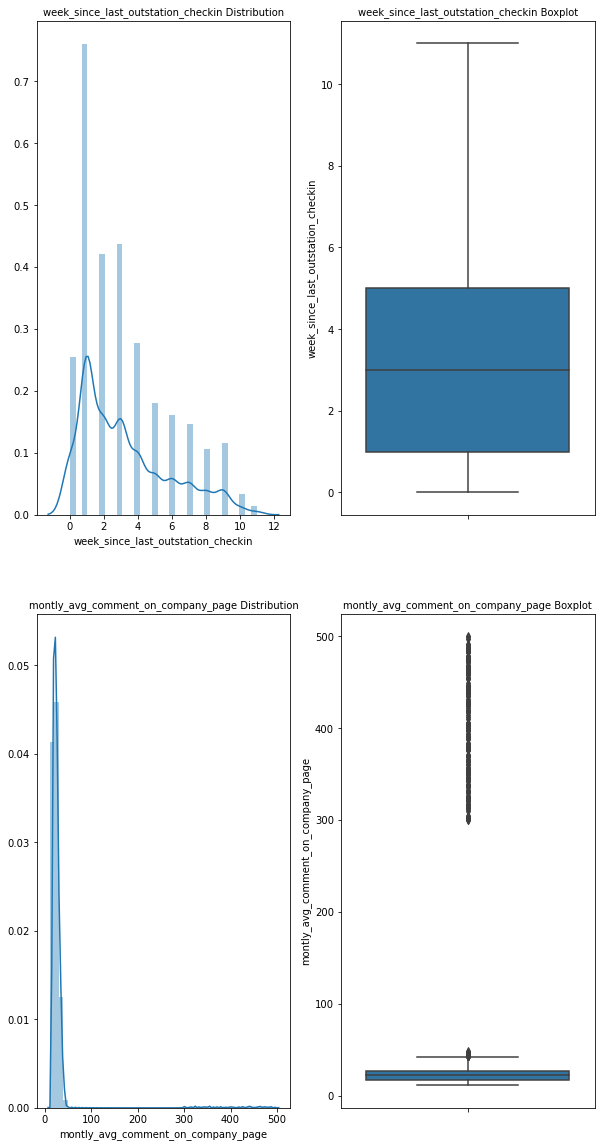

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['week_since_last_outstation_checkin'] , ax=axes[0][0])
a.set_title("week_since_last_outstation_checkin Distribution",fontsize=10)

a = sns.boxplot(df['week_since_last_outstation_checkin'] , orient = "v" , ax=axes[0][1])
a.set_title("week_since_last_outstation_checkin Boxplot",fontsize=10)

a = sns.distplot(df['montly_avg_comment_on_company_page'] , ax=axes[1][0])
a.set_title("montly_avg_comment_on_company_page Distribution",fontsize=10)

a = sns.boxplot(df['montly_avg_comment_on_company_page'] , orient = "v" , ax=axes[1][1])
a.set_title("montly_avg_comment_on_company_page Boxplot",fontsize=10)



plt.show()

In [17]:
df['montly_avg_comment_on_company_page'].value_counts().sort_values(ascending=False).head(10)

23    673
22    653
25    609
24    605
21    594
20    588
19    574
18    573
17    524
26    505
Name: montly_avg_comment_on_company_page, dtype: int64

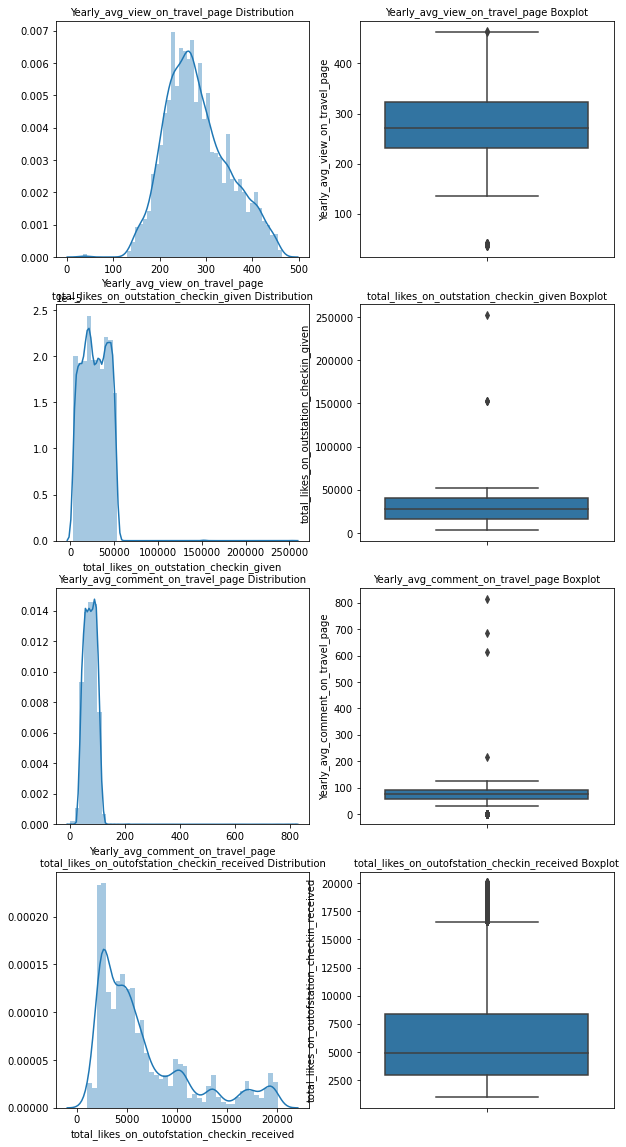

In [18]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['Yearly_avg_view_on_travel_page'] , ax=axes[0][0])
a.set_title("Yearly_avg_view_on_travel_page Distribution",fontsize=10)

a = sns.boxplot(df['Yearly_avg_view_on_travel_page'] , orient = "v" , ax=axes[0][1])
a.set_title("Yearly_avg_view_on_travel_page Boxplot",fontsize=10)

a = sns.distplot(df['total_likes_on_outstation_checkin_given'] , ax=axes[1][0])
a.set_title("total_likes_on_outstation_checkin_given Distribution",fontsize=10)

a = sns.boxplot(df['total_likes_on_outstation_checkin_given'] , orient = "v" , ax=axes[1][1])
a.set_title("total_likes_on_outstation_checkin_given Boxplot",fontsize=10)


a = sns.distplot(df['Yearly_avg_comment_on_travel_page'] , ax=axes[2][0])
a.set_title("Yearly_avg_comment_on_travel_page Distribution",fontsize=10)

a = sns.boxplot(df['Yearly_avg_comment_on_travel_page'] , orient = "v" , ax=axes[2][1])
a.set_title("Yearly_avg_comment_on_travel_page Boxplot",fontsize=10)


a = sns.distplot(df['total_likes_on_outofstation_checkin_received'] , ax=axes[3][0])
a.set_title("total_likes_on_outofstation_checkin_received Distribution",fontsize=10)

a = sns.boxplot(df['total_likes_on_outofstation_checkin_received'] , orient = "v" , ax=axes[3][1])
a.set_title("total_likes_on_outofstation_checkin_received Boxplot",fontsize=10)

plt.show()

In [19]:
df['week_since_last_outstation_checkin'].value_counts()

1     3070
3     1766
2     1700
4     1118
0     1032
5      728
6      654
7      594
9      472
8      428
10     138
11      60
Name: week_since_last_outstation_checkin, dtype: int64

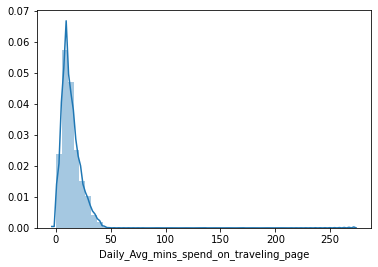

In [20]:
sns.distplot(df['Daily_Avg_mins_spend_on_traveling_page'])

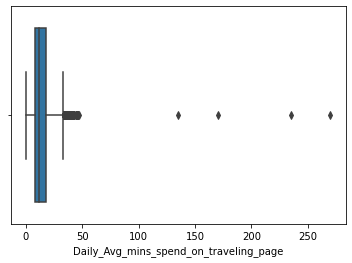

In [21]:
sns.boxplot(df['Daily_Avg_mins_spend_on_traveling_page'])

In [22]:
df1 = df.copy()

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11707 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11685 non-null  object 
 5   member_in_family                              11760 non-null  object 
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

#### Bivariate Analysis of Numeric Variables

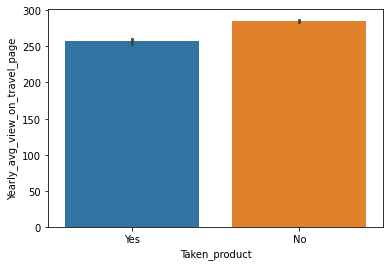

In [24]:
sns.barplot(data=df1,x= 'Taken_product',y='Yearly_avg_view_on_travel_page')

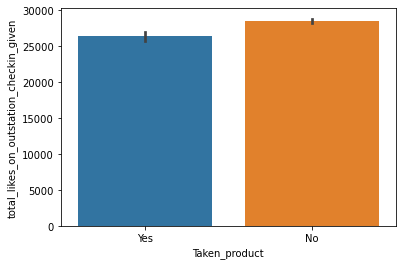

In [25]:
sns.barplot(data=df1,x= 'Taken_product',y='total_likes_on_outstation_checkin_given')

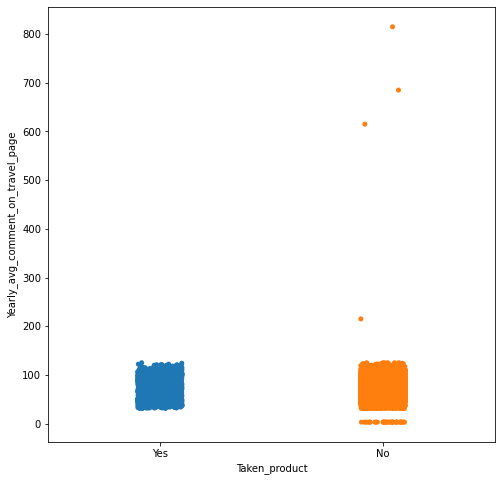

In [26]:
plt.figure(figsize=(8,8))
sns.stripplot(df1["Taken_product"], df1['Yearly_avg_comment_on_travel_page'], jitter=True) 
plt.show()

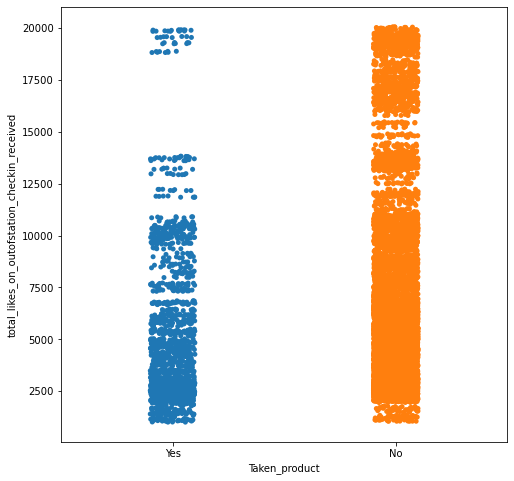

In [27]:
plt.figure(figsize=(8,8))
sns.stripplot(df1["Taken_product"], df1['total_likes_on_outofstation_checkin_received'], jitter=True) 
plt.show()

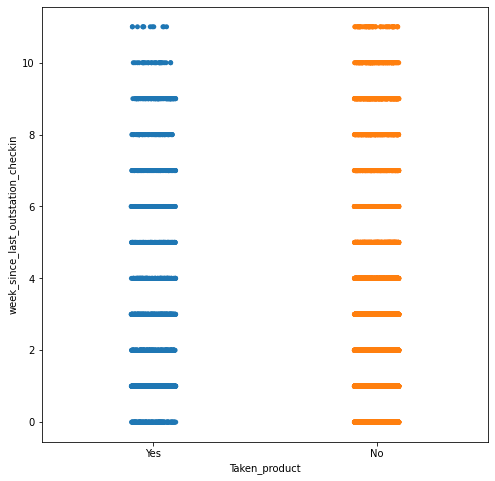

In [28]:
plt.figure(figsize=(8,8))
sns.stripplot(df1["Taken_product"], df1['week_since_last_outstation_checkin'], jitter=True) 
plt.show()

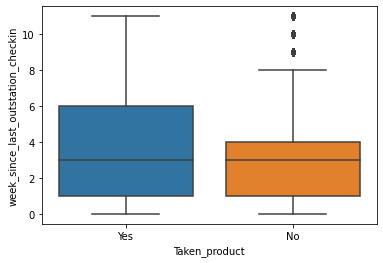

In [29]:
sns.boxplot(df1["Taken_product"], df1['week_since_last_outstation_checkin'])

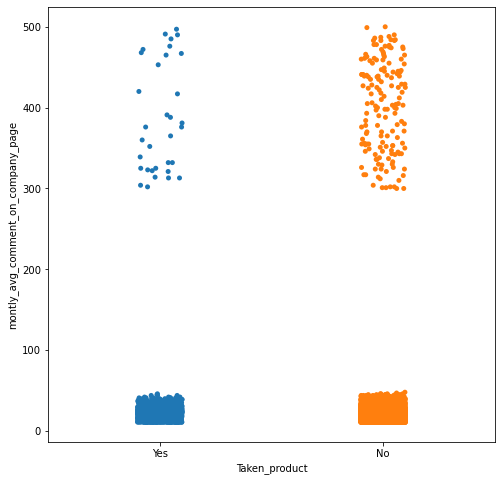

In [30]:
plt.figure(figsize=(8,8))
sns.stripplot(df1["Taken_product"], df1['montly_avg_comment_on_company_page'], jitter=True) 
plt.show()

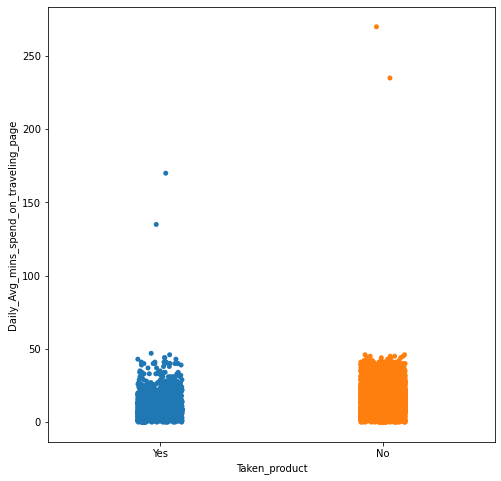

In [31]:
plt.figure(figsize=(8,8))
sns.stripplot(df1["Taken_product"], df1['Daily_Avg_mins_spend_on_traveling_page'], jitter=True) 
plt.show()


In [32]:
numeric = df1.select_dtypes(exclude = 'object')

In [33]:
categorical = df1.select_dtypes(include = 'object')

In [34]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                11179 non-null  float64
 1   total_likes_on_outstation_checkin_given       11379 non-null  float64
 2   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 3   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 4   week_since_last_outstation_checkin            11760 non-null  int64  
 5   montly_avg_comment_on_company_page            11760 non-null  int64  
 6   Daily_Avg_mins_spend_on_traveling_page        11760 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 643.2 KB


In [35]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Taken_product                   11760 non-null  object
 1   preferred_device                11707 non-null  object
 2   yearly_avg_Outstation_checkins  11685 non-null  object
 3   member_in_family                11760 non-null  object
 4   preferred_location_type         11729 non-null  object
 5   following_company_page          11657 non-null  object
 6   working_flag                    11760 non-null  object
 7   travelling_network_rating       11760 non-null  object
 8   Adult_flag                      11760 non-null  object
dtypes: object(9)
memory usage: 827.0+ KB


#### Missing Value Treatment in Numeric Variables using KNN Imputer

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numeric = pd.DataFrame(scaler.fit_transform(numeric), columns = numeric.columns)

In [37]:
from sklearn.impute import KNNImputer

In [38]:
imputer = KNNImputer(n_neighbors=10)

In [39]:
df1_imputed = pd.DataFrame(imputer.fit_transform(scaled_numeric), columns = scaled_numeric.columns)

In [40]:
df2 = pd.concat([df1_imputed, categorical], axis = 1)

In [41]:
df2.isnull().sum()

Yearly_avg_view_on_travel_page                    0
total_likes_on_outstation_checkin_given           0
Yearly_avg_comment_on_travel_page                 0
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
montly_avg_comment_on_company_page                0
Daily_Avg_mins_spend_on_traveling_page            0
Taken_product                                     0
preferred_device                                 53
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
following_company_page                          103
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
dtype: int64

#### Outliers Treatment

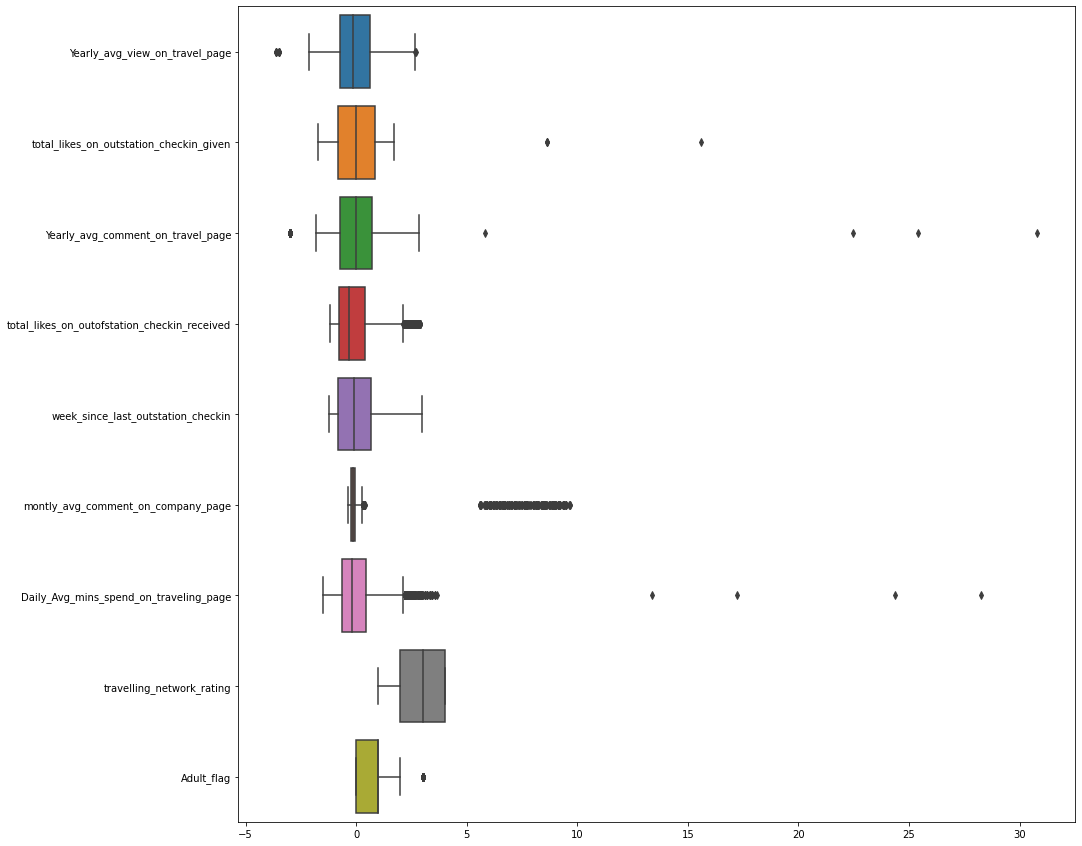

In [42]:
plt.figure(figsize = (15,15))
x=sns.boxplot(data=df2, orient="h")
plt.show(x);

In [43]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [44]:
for column in df2.columns:
    if df2[column].dtype != 'object': 
        lr,ur=remove_outlier(df2[column])         
        df2[column]=np.where(df2[column]>ur,ur,df2[column])
        df2[column]=np.where(df2[column]<lr,lr,df2[column])

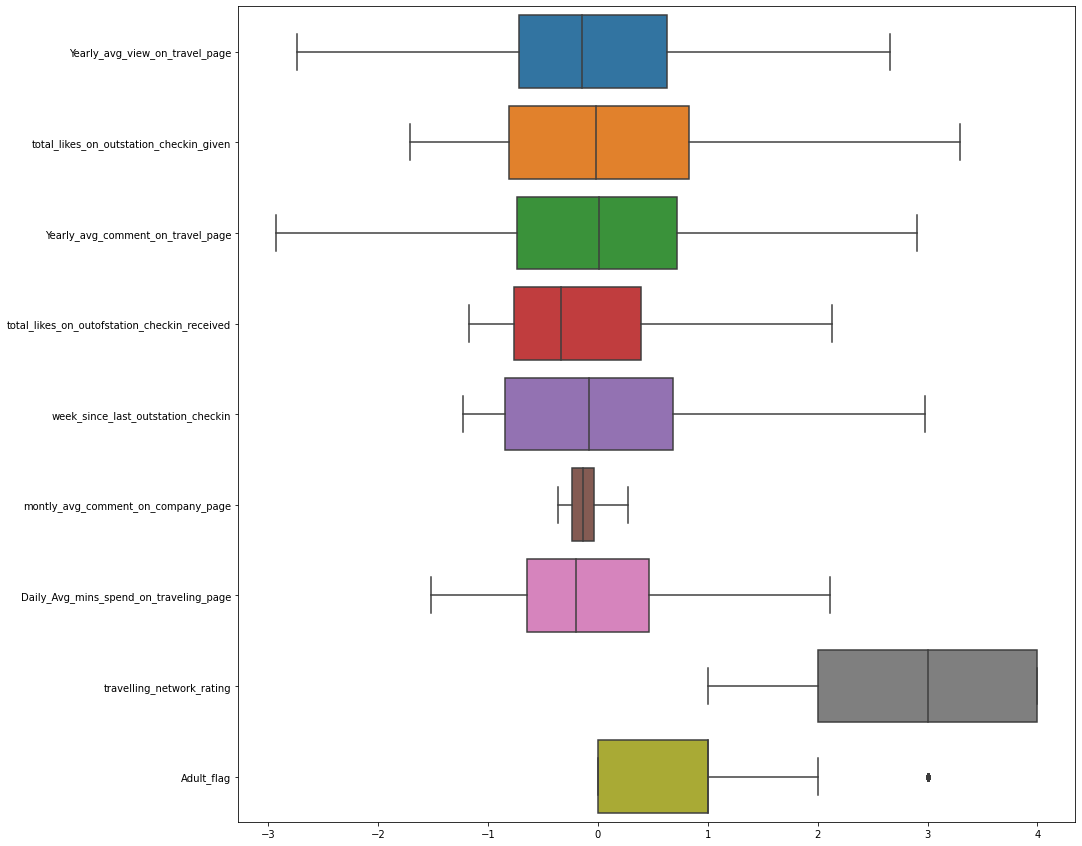

In [45]:
plt.figure(figsize = (15,15))
x=sns.boxplot(data=df2, orient="h")
plt.show(x);

#### Univariate Analysis of Categorical Variables

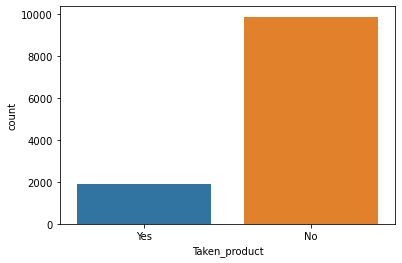

In [46]:
sns.countplot(df2.Taken_product)
plt.show()

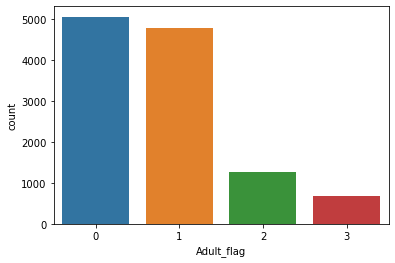

In [47]:
sns.countplot(df2.Adult_flag)
plt.show()

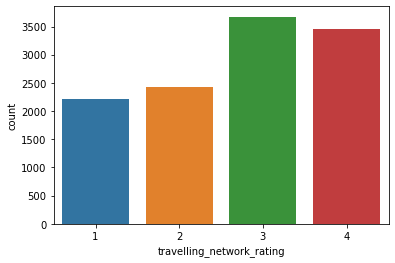

In [48]:
sns.countplot(df2.travelling_network_rating)
plt.show()

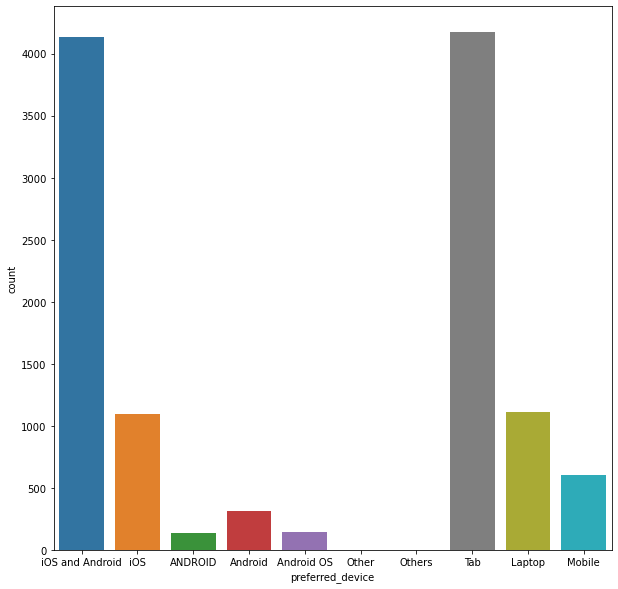

In [49]:
plt.figure(figsize = (10,10))
c=sns.countplot(df2.preferred_device)
plt.show(c)

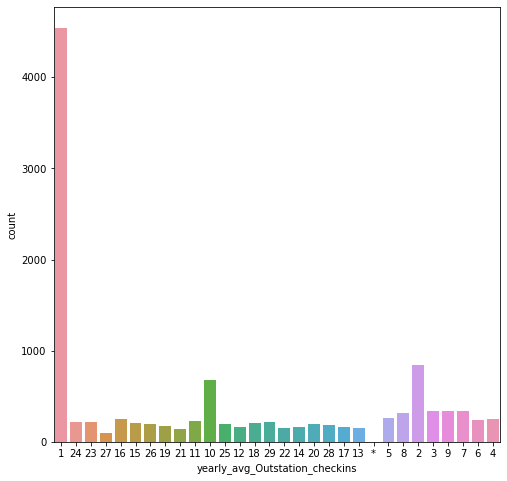

In [50]:
plt.figure(figsize = (8,8))
o=sns.countplot(df2.yearly_avg_Outstation_checkins)
plt.show(o)

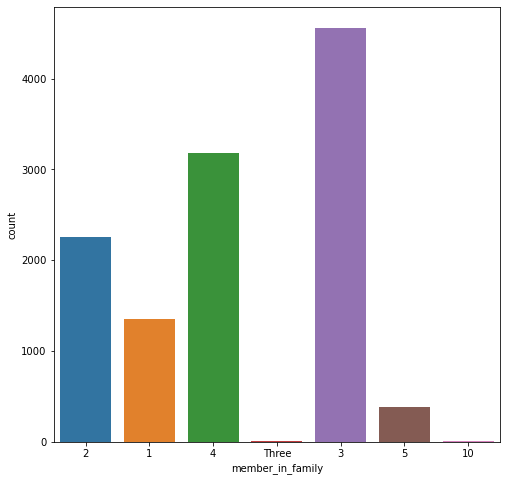

In [51]:
plt.figure(figsize = (8,8))
m=sns.countplot(df2.member_in_family)
plt.show(m)

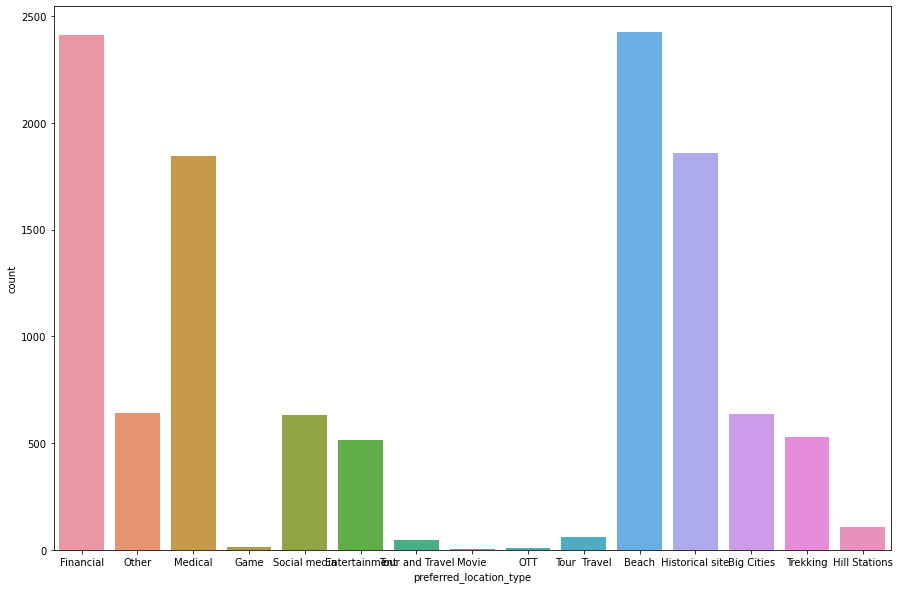

In [52]:
plt.figure(figsize = (15,10))
sns.countplot(df2.preferred_location_type)
plt.show();

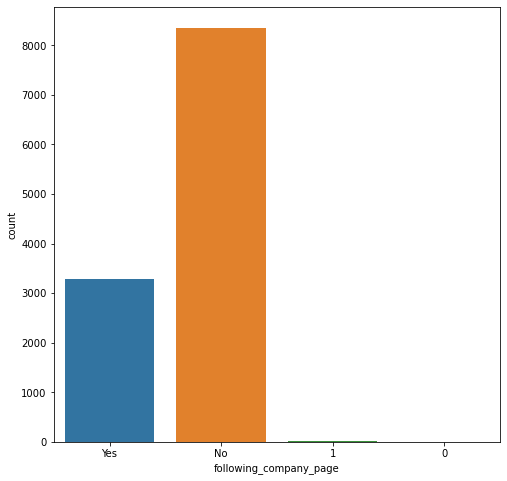

In [53]:
plt.figure(figsize = (8,8))
f= sns.countplot(df2.following_company_page)
plt.show(f);

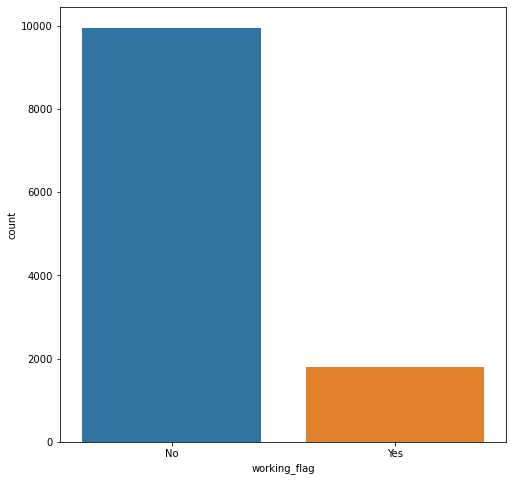

In [54]:
plt.figure(figsize = (8,8))
w=sns.countplot(df2.working_flag)
plt.show(w);

In [55]:
df2.isnull().sum()

Yearly_avg_view_on_travel_page                    0
total_likes_on_outstation_checkin_given           0
Yearly_avg_comment_on_travel_page                 0
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
montly_avg_comment_on_company_page                0
Daily_Avg_mins_spend_on_traveling_page            0
Taken_product                                     0
preferred_device                                 53
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
following_company_page                          103
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
dtype: int64

#### Missing Value Treatment in Categorical Variables Using MODE 

#### Preferred Device

In [56]:
df2['preferred_device'] = df2['preferred_device'].replace("Tab","Mobile")
df2['preferred_device'] = df2['preferred_device'].replace("Others","Mobile")
df2['preferred_device'] = df2['preferred_device'].replace("iOS and Android","Mobile")
df2['preferred_device'] = df2['preferred_device'].replace("iOS","Mobile")
df2['preferred_device'] = df2['preferred_device'].replace("Other","Mobile")
df2['preferred_device'] = df2['preferred_device'].replace("ANDROID","Mobile")
df2['preferred_device'] = df2['preferred_device'].replace("Android","Mobile")
df2['preferred_device'] = df2['preferred_device'].replace("Android OS","Mobile")

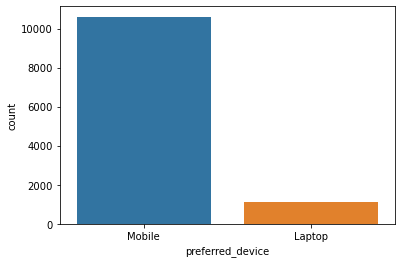

In [57]:
c=sns.countplot(df2.preferred_device)
plt.show(c)

In [58]:
df2['preferred_device'].value_counts(normalize=True)

Mobile    0.905356
Laptop    0.094644
Name: preferred_device, dtype: float64

In [59]:
df2['preferred_device'] = df2['preferred_device'].fillna(df2['preferred_device'].mode().iloc[0])

In [60]:
my_tab = pd.crosstab(index=df2["preferred_device"],  
                     columns="count").sort_values(ascending = False, by='count')               
my_tab

col_0,count
preferred_device,
Mobile,10652
Laptop,1108


In [61]:
df2['preferred_device'].isnull().sum()

0

#### Following Company Page

In [62]:
df2['following_company_page'].value_counts(normalize=True)

No     0.716737
Yes    0.281805
1      0.001029
0      0.000429
Name: following_company_page, dtype: float64

In [63]:
df2['following_company_page'] = df2['following_company_page'].replace("1","Yes")
df2['following_company_page'] = df2['following_company_page'].replace("0","No")

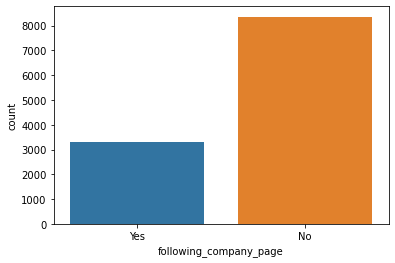

In [64]:
f= sns.countplot(df2.following_company_page)
plt.show(f);

In [65]:
df2['following_company_page'].value_counts(normalize=True)

No     0.717166
Yes    0.282834
Name: following_company_page, dtype: float64

In [66]:
df2['following_company_page'] = df2['following_company_page'].fillna(df2['following_company_page'].mode().iloc[0])

In [67]:
my_tab = pd.crosstab(index=df2["following_company_page"],  
                     columns="count").sort_values(ascending = False, by='count')               
my_tab

col_0,count
following_company_page,
No,8463
Yes,3297


In [68]:
df2['following_company_page'].isnull().sum()

0

#### Yearly Average OutStation Checkin

In [69]:
df2['yearly_avg_Outstation_checkins'].value_counts(normalize=True)

1     0.388789
2     0.072229
10    0.058365
9     0.029097
3     0.028755
7     0.028755
8     0.027386
5     0.022336
4     0.021908
16    0.021823
6     0.020197
11    0.019598
24    0.019084
29    0.018400
23    0.018400
18    0.017801
15    0.017629
20    0.017030
26    0.017030
25    0.016945
28    0.015404
19    0.015062
14    0.014292
17    0.013693
12    0.013607
22    0.013008
13    0.012837
21    0.012238
27    0.008216
*     0.000086
Name: yearly_avg_Outstation_checkins, dtype: float64

In [70]:
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].fillna(df2['yearly_avg_Outstation_checkins'].mode().iloc[0])

In [71]:
df2['yearly_avg_Outstation_checkins'].isnull().sum()

0

In [72]:
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("*","1")

In [73]:
df2['yearly_avg_Outstation_checkins'].value_counts(normalize=True)

1     0.392772
2     0.071769
10    0.057993
9     0.028912
3     0.028571
7     0.028571
8     0.027211
5     0.022194
4     0.021769
16    0.021684
6     0.020068
11    0.019473
24    0.018963
29    0.018282
23    0.018282
18    0.017687
15    0.017517
26    0.016922
20    0.016922
25    0.016837
28    0.015306
19    0.014966
14    0.014201
17    0.013605
12    0.013520
22    0.012925
13    0.012755
21    0.012160
27    0.008163
Name: yearly_avg_Outstation_checkins, dtype: float64

#### Preferred Location Type

In [74]:
df2['preferred_location_type'].value_counts(normalize=True)

Beach              0.206667
Financial          0.205388
Historical site    0.158240
Medical            0.157302
Other              0.054821
Big Cities         0.054225
Social media       0.053969
Trekking           0.045017
Entertainment      0.043994
Hill Stations      0.009208
Tour  Travel       0.005116
Tour and Travel    0.004007
Game               0.001023
OTT                0.000597
Movie              0.000426
Name: preferred_location_type, dtype: float64

In [75]:
df2['preferred_location_type'] = df2['preferred_location_type'].fillna(df2['preferred_location_type'].mode().iloc[0])

In [76]:
df2['preferred_location_type'].isnull().sum()

0

In [77]:
my_tab = pd.crosstab(index=df2["preferred_location_type"],  
                     columns="count").sort_values(ascending = False, by='count')               
my_tab

col_0,count
preferred_location_type,
Beach,2455
Financial,2409
Historical site,1856
Medical,1845
Other,643
Big Cities,636
Social media,633
Trekking,528
Entertainment,516


In [78]:
df2.isnull().sum()

Yearly_avg_view_on_travel_page                  0
total_likes_on_outstation_checkin_given         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
montly_avg_comment_on_company_page              0
Daily_Avg_mins_spend_on_traveling_page          0
Taken_product                                   0
preferred_device                                0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
following_company_page                          0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
dtype: int64

#### Multivariate Analysis

In [79]:
df2.corr()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page
Yearly_avg_view_on_travel_page,1.000000,0.011878,0.041515,0.508213,0.288562,0.047064,0.645510
total_likes_on_outstation_checkin_given,0.011878,1.000000,0.019649,0.013823,0.035748,0.022504,0.024037
Yearly_avg_comment_on_travel_page,0.041515,0.019649,1.000000,-0.013646,0.065653,0.198871,0.066733
total_likes_on_outofstation_checkin_received,0.508213,0.013823,-0.013646,1.000000,0.148314,-0.005133,0.721508
week_since_last_outstation_checkin,0.288562,0.035748,0.065653,0.148314,1.000000,0.110536,0.279531
montly_avg_comment_on_company_page,0.047064,0.022504,0.198871,-0.005133,0.110536,1.000000,0.152750
Daily_Avg_mins_spend_on_traveling_page,0.645510,0.024037,0.066733,0.721508,0.279531,0.152750,1.000000


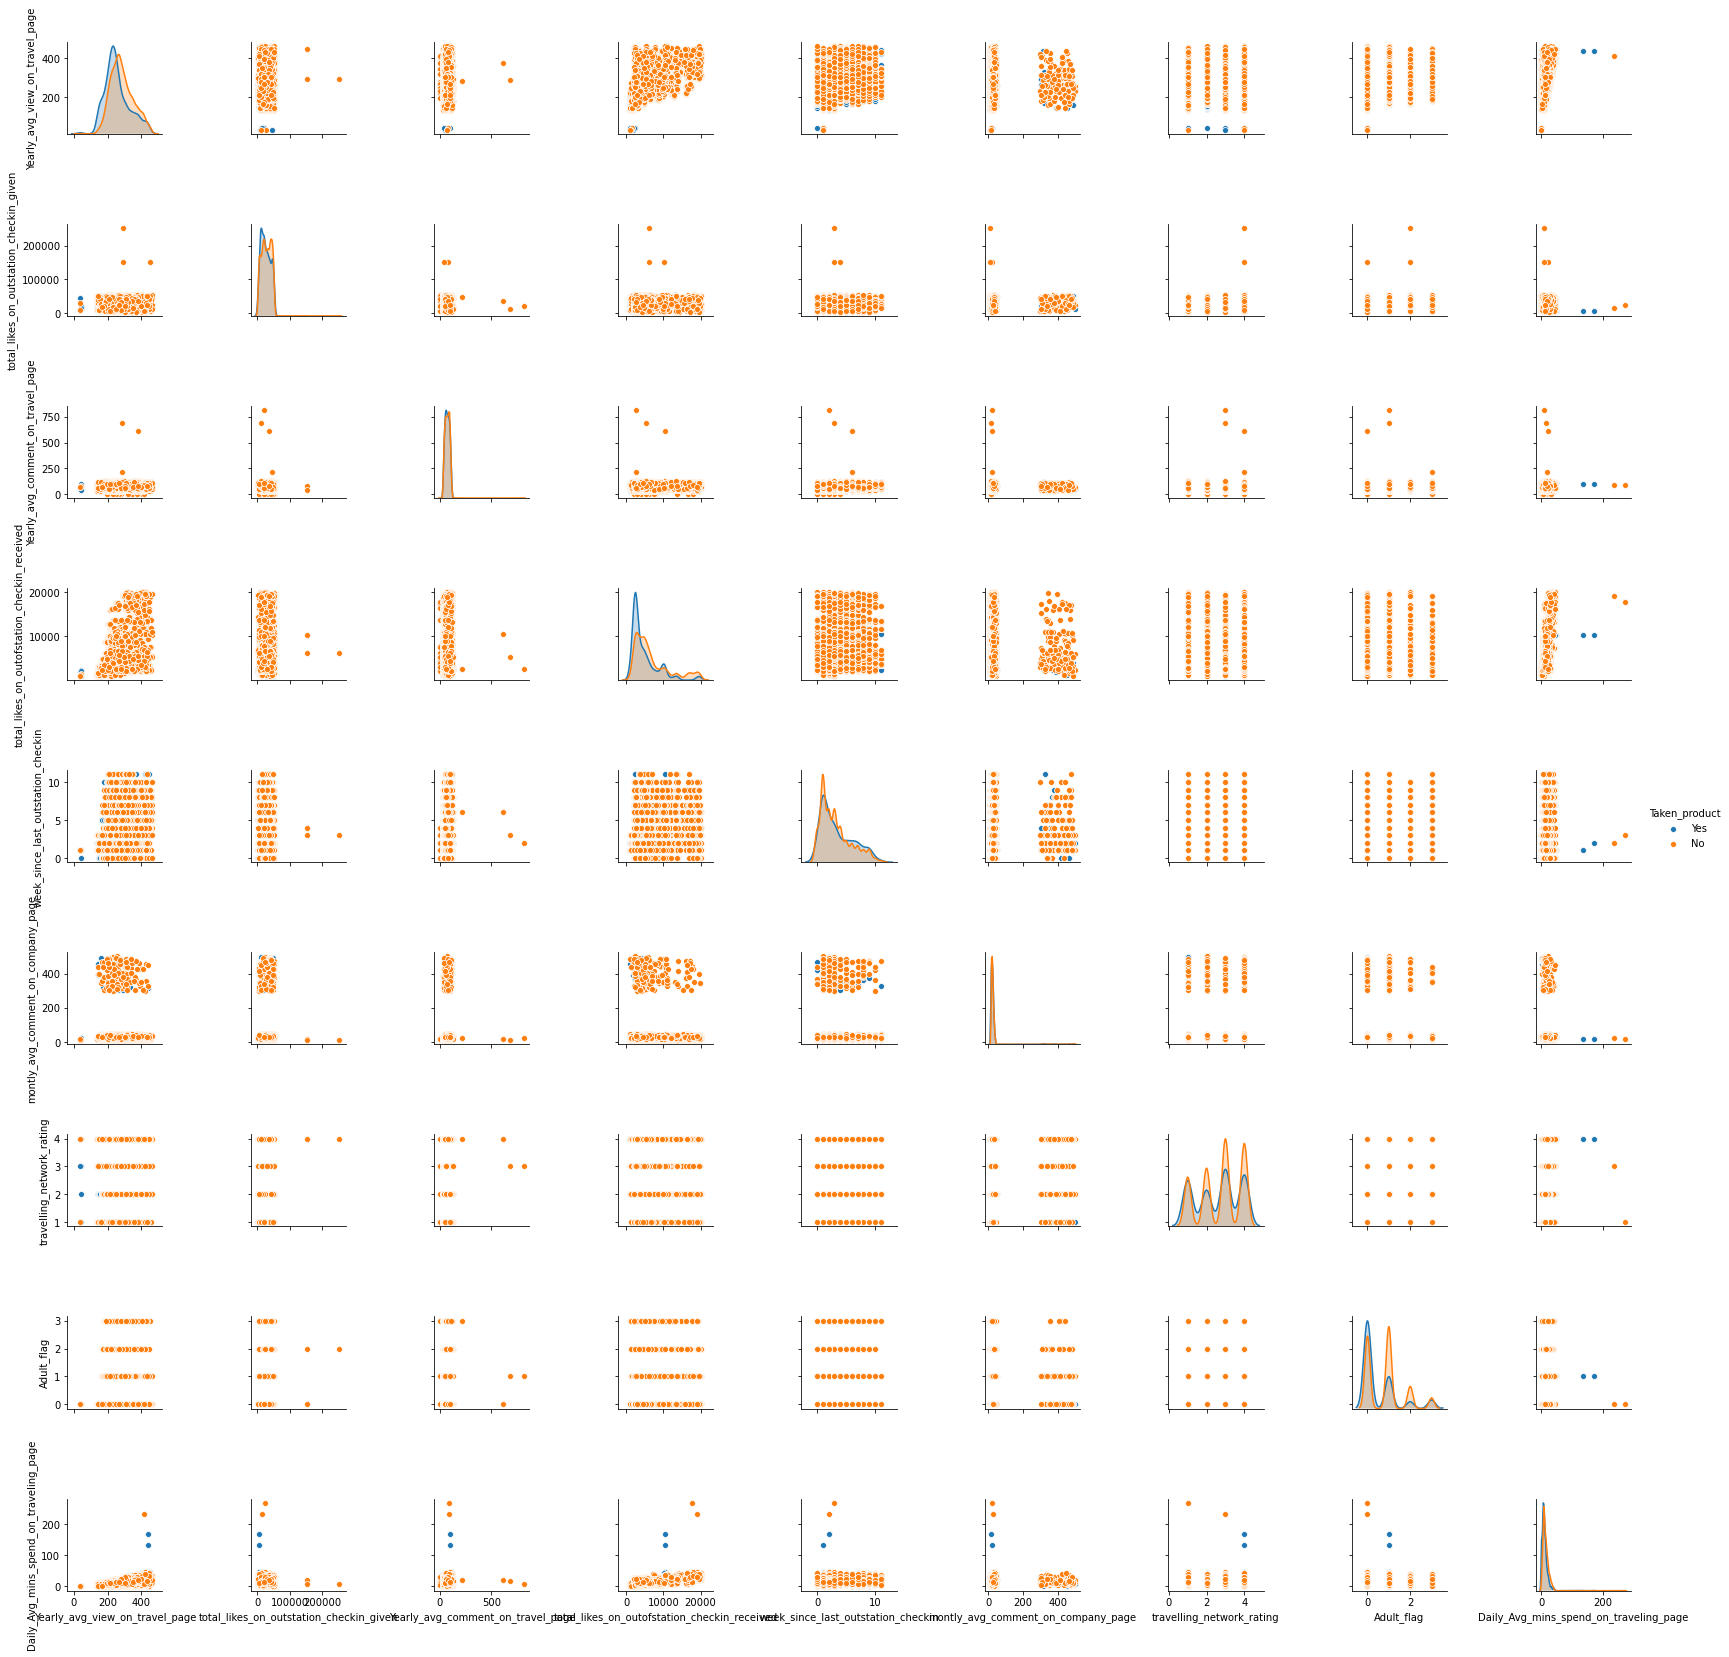

In [80]:
sns.pairplot(df,hue="Taken_product")

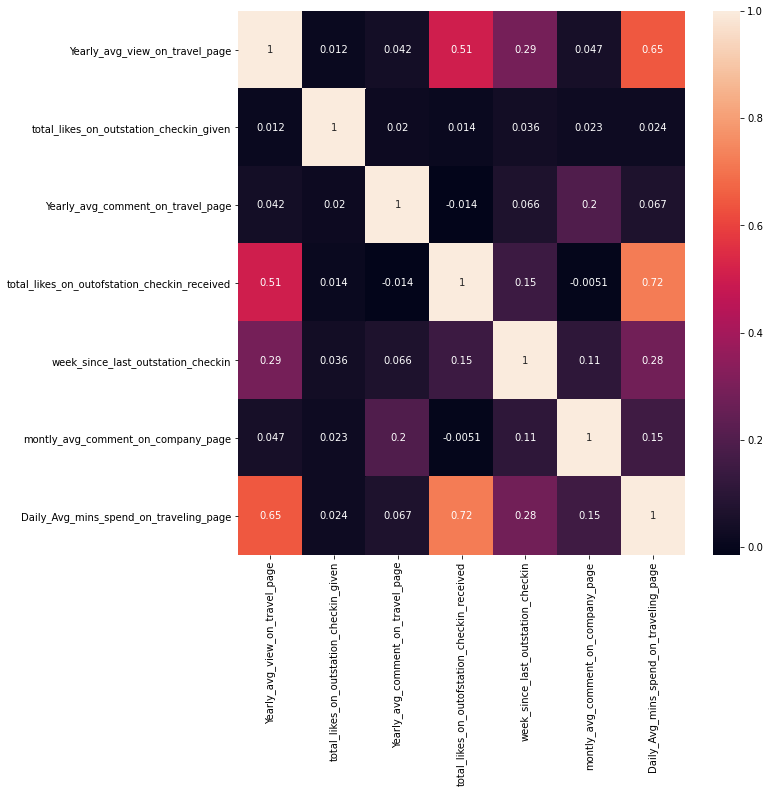

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                11760 non-null  float64
 1   total_likes_on_outstation_checkin_given       11760 non-null  float64
 2   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 3   total_likes_on_outofstation_checkin_received  11760 non-null  float64
 4   week_since_last_outstation_checkin            11760 non-null  float64
 5   montly_avg_comment_on_company_page            11760 non-null  float64
 6   Daily_Avg_mins_spend_on_traveling_page        11760 non-null  float64
 7   Taken_product                                 11760 non-null  object 
 8   preferred_device                              11760 non-null  object 
 9   yearly_avg_Outstation_checkins                11760 non-null 

In [83]:
df2.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,Taken_product,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,following_company_page,working_flag,travelling_network_rating,Adult_flag
0,0.383825,0.722972,0.799562,-0.114461,1.833319,-0.362970,-0.641374,Yes,Mobile,1,2,Financial,Yes,No,1,0
1,1.263850,-1.279545,-0.573972,-0.297827,-0.842262,-0.116353,-0.420873,No,Mobile,1,1,Financial,No,Yes,4,1
2,-0.056187,1.382367,0.716318,-0.943754,1.068868,-0.280765,-0.751624,Yes,Mobile,1,2,Other,Yes,No,2,0
3,-0.496200,1.428598,-0.782083,-0.769737,-0.842262,-0.362970,-0.641374,No,Mobile,1,4,Financial,Yes,No,3,0
4,-1.156218,-0.520389,-1.448039,-0.650963,2.215545,-0.342419,-0.861874,No,Mobile,1,1,Medical,No,No,4,1


In [84]:
df2 =pd.get_dummies(df2, columns=['Taken_product'],drop_first=True)

In [85]:
df2.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,following_company_page,working_flag,travelling_network_rating,Adult_flag,Taken_product_Yes
0,0.383825,0.722972,0.799562,-0.114461,1.833319,-0.362970,-0.641374,Mobile,1,2,Financial,Yes,No,1,0,1
1,1.263850,-1.279545,-0.573972,-0.297827,-0.842262,-0.116353,-0.420873,Mobile,1,1,Financial,No,Yes,4,1,0
2,-0.056187,1.382367,0.716318,-0.943754,1.068868,-0.280765,-0.751624,Mobile,1,2,Other,Yes,No,2,0,1
3,-0.496200,1.428598,-0.782083,-0.769737,-0.842262,-0.362970,-0.641374,Mobile,1,4,Financial,Yes,No,3,0,0
4,-1.156218,-0.520389,-1.448039,-0.650963,2.215545,-0.342419,-0.861874,Mobile,1,1,Medical,No,No,4,1,0


#### Bivariate Analysis of Categorical Variables

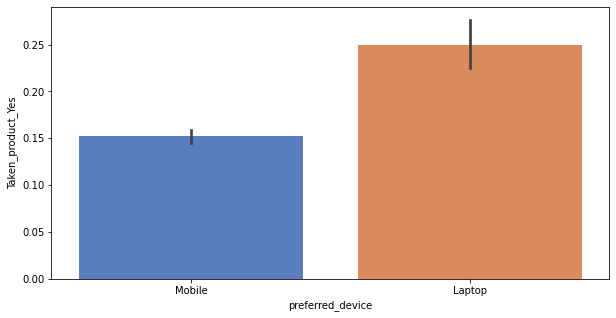

In [86]:
plt.figure(figsize=(10,5)) 
ax = sns.barplot(x='preferred_device', y='Taken_product_Yes', data=df2, palette='muted')

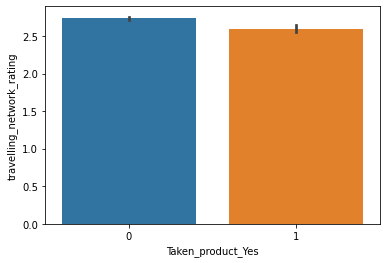

In [87]:
sns.barplot(df2['Taken_product_Yes'], df2['travelling_network_rating'])

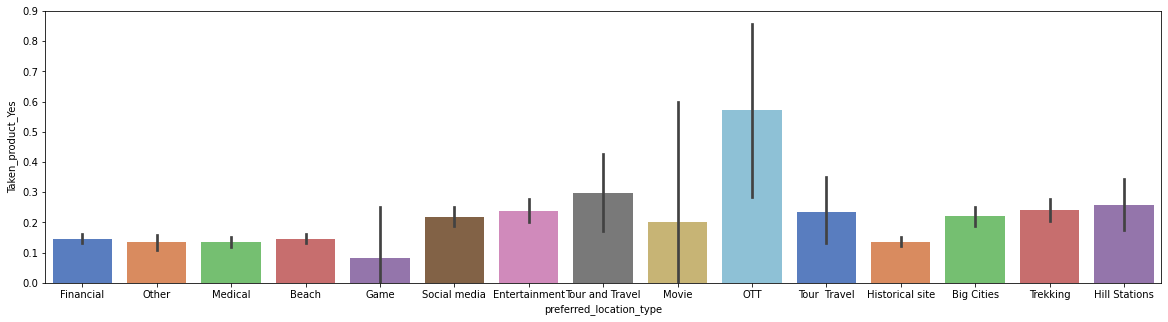

In [88]:
plt.figure(figsize=(20,5)) 
ax = sns.barplot(x='preferred_location_type', y='Taken_product_Yes', data=df2, palette='muted')

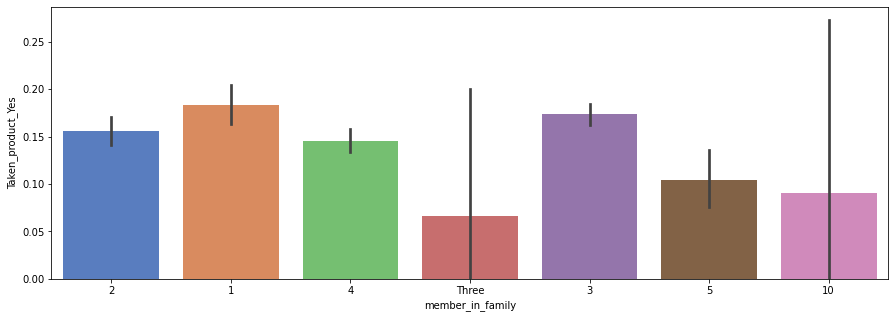

In [89]:
plt.figure(figsize=(15,5)) 
ax = sns.barplot(x='member_in_family', y='Taken_product_Yes', data=df2, palette='muted')

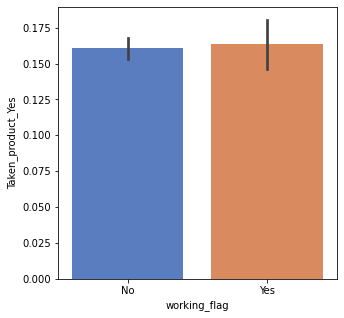

In [90]:
plt.figure(figsize=(5,5)) 
ax = sns.barplot(x='working_flag', y='Taken_product_Yes', data=df2, palette='muted')

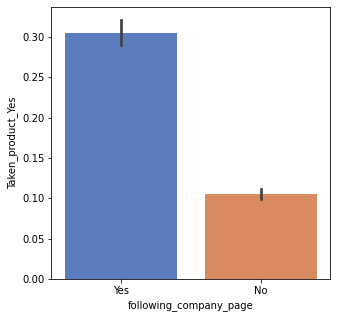

In [91]:
plt.figure(figsize=(5,5)) 
ax = sns.barplot(x='following_company_page', y='Taken_product_Yes', data=df2, palette='muted')

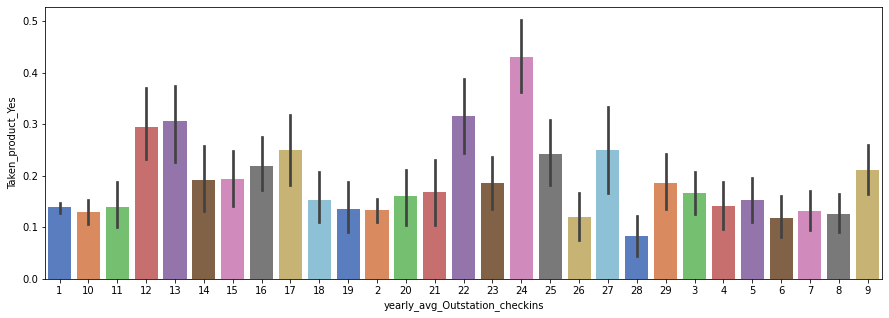

In [92]:
plt.figure(figsize=(15,5)) 
ax = sns.barplot(x='yearly_avg_Outstation_checkins', y='Taken_product_Yes', data=df2, palette='muted')

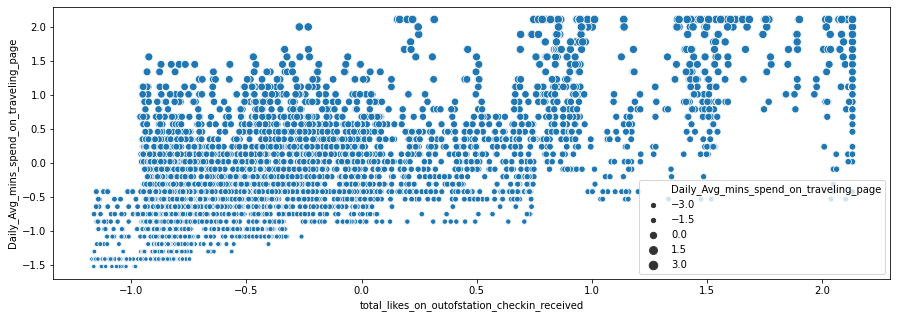

In [93]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df2['total_likes_on_outofstation_checkin_received'],y='Daily_Avg_mins_spend_on_traveling_page', data=df2, size = "Daily_Avg_mins_spend_on_traveling_page") # scatter plot

<Figure size 1080x1080 with 0 Axes>

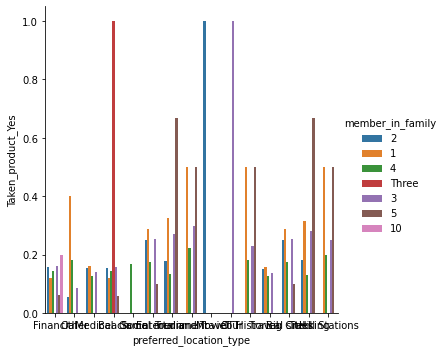

In [94]:
figure = plt.figure(figsize=(15,15))
u=sns.catplot(x="preferred_location_type", y="Taken_product_Yes", hue="member_in_family", kind="bar", ci=None, data=df2)

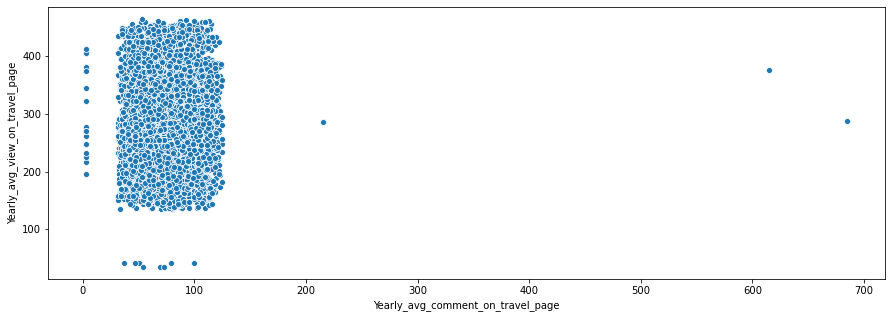

In [95]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['Yearly_avg_comment_on_travel_page'],y='Yearly_avg_view_on_travel_page', data=df) 

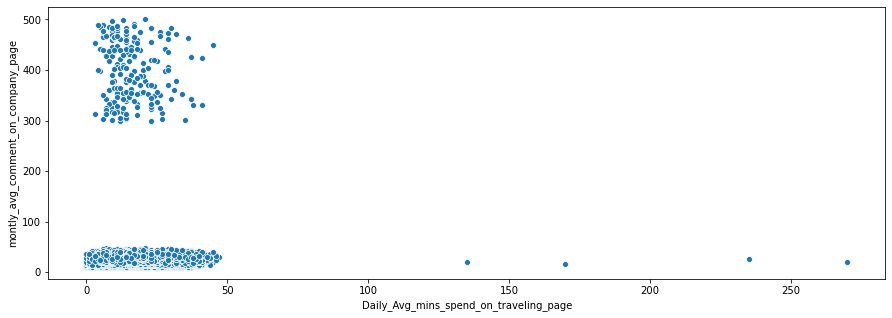

In [96]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['Daily_Avg_mins_spend_on_traveling_page'],y='montly_avg_comment_on_company_page', data=df)

#### Variable Transformation

#### Members in Family

In [97]:
df2['member_in_family'] = df2['member_in_family'].replace("1","Small Family")
df2['member_in_family'] = df2['member_in_family'].replace("2","Small Family")
df2['member_in_family'] = df2['member_in_family'].replace("3","Standard Family")
df2['member_in_family'] = df2['member_in_family'].replace("Three","Standard Family")
df2['member_in_family'] = df2['member_in_family'].replace("4","Standard Family")
df2['member_in_family'] = df2['member_in_family'].replace("5","Standard Family")
df2['member_in_family'] = df2['member_in_family'].replace("10","Large Family")


In [98]:
df2['member_in_family'].value_counts()

Standard Family    8144
Small Family       3605
Large Family         11
Name: member_in_family, dtype: int64

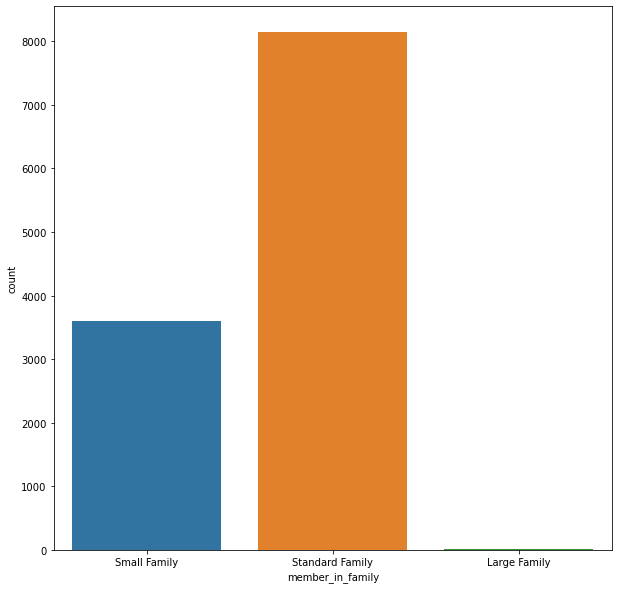

In [99]:
plt.figure(figsize = (10,10))
a=sns.countplot(df2.member_in_family)
plt.show(a)

#### Preferred Location Type

In [100]:
df2['preferred_location_type'] = df2['preferred_location_type'].replace("Big Cities","Cultural")
df2['preferred_location_type'] = df2['preferred_location_type'].replace("Historical site","Cultural")

df2['preferred_location_type'] = df2['preferred_location_type'].replace("Trekking","Adventure")
df2['preferred_location_type'] = df2['preferred_location_type'].replace("Hill Stations","Adventure")
df2['preferred_location_type'] = df2['preferred_location_type'].replace("Game","Adventure")
df2['preferred_location_type'] = df2['preferred_location_type'].replace("Beach","Adventure")

df2['preferred_location_type'] = df2['preferred_location_type'].replace("Social media","Entertainment")
df2['preferred_location_type'] = df2['preferred_location_type'].replace("Movie","Entertainment")
df2['preferred_location_type'] = df2['preferred_location_type'].replace("OTT","Entertainment")

df2['preferred_location_type'] = df2['preferred_location_type'].replace("Financial","Business")
df2['preferred_location_type'] = df2['preferred_location_type'].replace("Medical","Business")

df2['preferred_location_type'] = df2['preferred_location_type'].replace("Tour  Travel","Other")
df2['preferred_location_type'] = df2['preferred_location_type'].replace("Tour and Travel","Other")

In [101]:
df2['preferred_location_type'].value_counts()

Business         4254
Adventure        3103
Cultural         2492
Entertainment    1161
Other             750
Name: preferred_location_type, dtype: int64

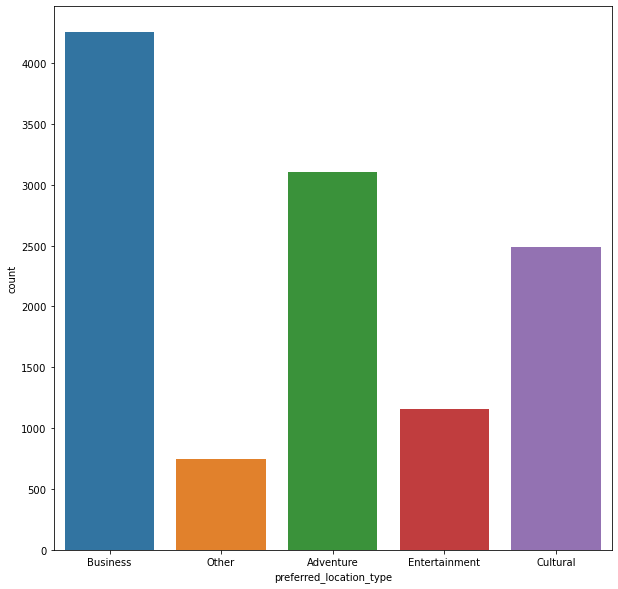

In [102]:
plt.figure(figsize = (10,10))
l=sns.countplot(df2.preferred_location_type)
plt.show(l)

In [103]:
df2.drop(['total_likes_on_outofstation_checkin_received'],axis='columns', inplace=True)

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Yearly_avg_view_on_travel_page           11760 non-null  float64
 1   total_likes_on_outstation_checkin_given  11760 non-null  float64
 2   Yearly_avg_comment_on_travel_page        11760 non-null  float64
 3   week_since_last_outstation_checkin       11760 non-null  float64
 4   montly_avg_comment_on_company_page       11760 non-null  float64
 5   Daily_Avg_mins_spend_on_traveling_page   11760 non-null  float64
 6   preferred_device                         11760 non-null  object 
 7   yearly_avg_Outstation_checkins           11760 non-null  object 
 8   member_in_family                         11760 non-null  object 
 9   preferred_location_type                  11760 non-null  object 
 10  following_company_page                   11760

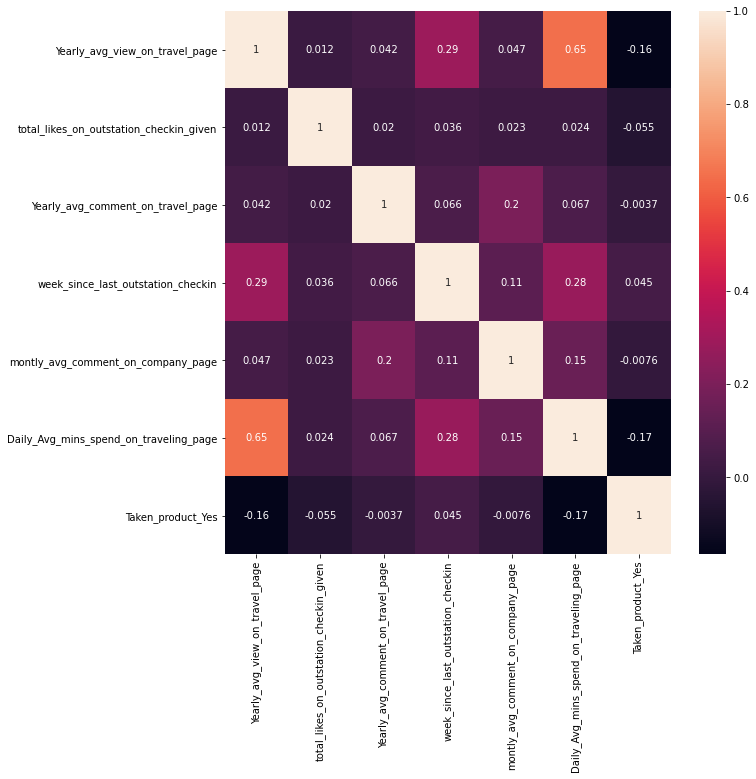

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

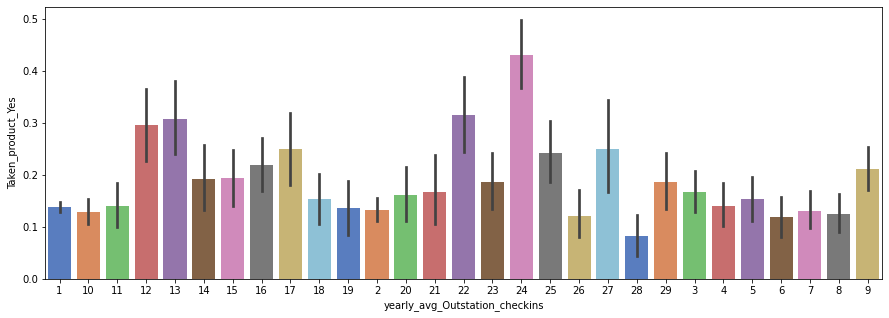

In [106]:
plt.figure(figsize=(15,5)) 
ax = sns.barplot(x='yearly_avg_Outstation_checkins', y='Taken_product_Yes', data=df2, palette='muted')

In [107]:
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("1","1-5")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("2","1-5")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("3","1-5")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("4","1-5")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("5","1-5")

df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("6","6-10")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("7","6-10")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("8","6-10")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("9","6-10")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("10","6-10")

df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("11","11-15")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("12","11-15")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("13","11-15")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("14","11-15")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("15","11-15")

df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("16","16-20")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("17","16-20")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("18","16-20")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("19","16-20")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("20","16-20")

df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("21","21-25")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("22","21-25")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("23","21-25")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("24","21-25")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("25","21-25")

df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("26","Above 25")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("27","Above 25")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("28","Above 25")
df2['yearly_avg_Outstation_checkins'] = df2['yearly_avg_Outstation_checkins'].replace("29","Above 25")

In [108]:
df2['yearly_avg_Outstation_checkins'].value_counts()

1-5         6316
6-10        1914
16-20        998
21-25        931
11-15        911
Above 25     690
Name: yearly_avg_Outstation_checkins, dtype: int64

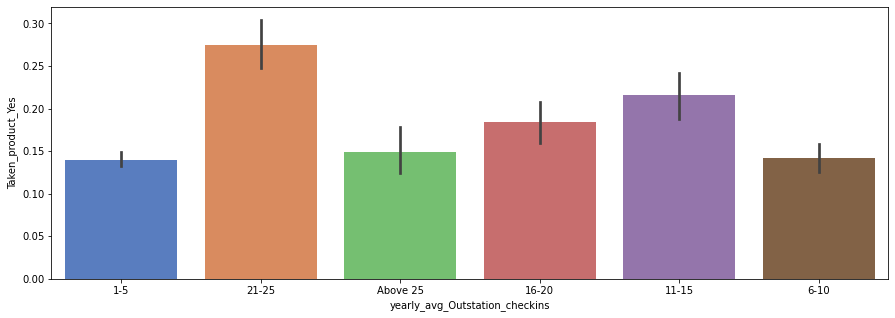

In [109]:
plt.figure(figsize=(15,5)) 
ax = sns.barplot(x='yearly_avg_Outstation_checkins', y='Taken_product_Yes', data=df2, palette='muted')

#### Adult_Flag

In [110]:
df2['Adult_flag'].value_counts()

0    5048
1    4768
2    1264
3     680
Name: Adult_flag, dtype: int64

In [111]:
df2["Adult_flag"] = df2["Adult_flag"].replace({2:'1',
                                    1:'1',
                                     3 :'1'})

In [112]:
df2['Adult_flag'].value_counts()

1    6712
0    5048
Name: Adult_flag, dtype: int64

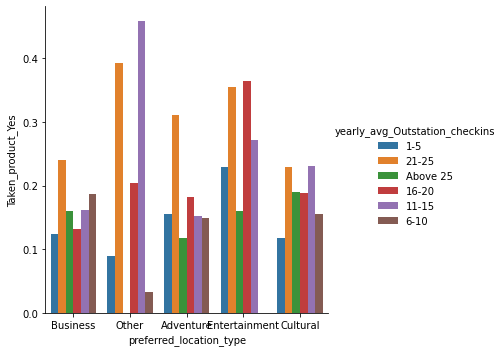

In [113]:
sns.catplot(x="preferred_location_type", y="Taken_product_Yes", hue="yearly_avg_Outstation_checkins", kind="bar", ci=None, data=df2)

In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Yearly_avg_view_on_travel_page           11760 non-null  float64
 1   total_likes_on_outstation_checkin_given  11760 non-null  float64
 2   Yearly_avg_comment_on_travel_page        11760 non-null  float64
 3   week_since_last_outstation_checkin       11760 non-null  float64
 4   montly_avg_comment_on_company_page       11760 non-null  float64
 5   Daily_Avg_mins_spend_on_traveling_page   11760 non-null  float64
 6   preferred_device                         11760 non-null  object 
 7   yearly_avg_Outstation_checkins           11760 non-null  object 
 8   member_in_family                         11760 non-null  object 
 9   preferred_location_type                  11760 non-null  object 
 10  following_company_page                   11760

In [115]:
df2.shape

(11760, 15)

In [116]:
df2['Taken_product_Yes'].value_counts(normalize = True)

0    0.838776
1    0.161224
Name: Taken_product_Yes, dtype: float64

<Figure size 1080x1080 with 0 Axes>

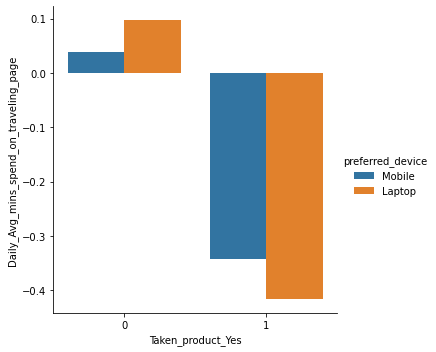

In [117]:
figure = plt.figure(figsize=(15,15))
u=sns.catplot(x="Taken_product_Yes", y="Daily_Avg_mins_spend_on_traveling_page", hue="preferred_device", kind="bar", ci=None, data=df2)

### Notes 1 Corrections

In [118]:
df2.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,following_company_page,working_flag,travelling_network_rating,Adult_flag,Taken_product_Yes
0,0.383825,0.722972,0.799562,1.833319,-0.362970,-0.641374,Mobile,1-5,Small Family,Business,Yes,No,1,0,1
1,1.263850,-1.279545,-0.573972,-0.842262,-0.116353,-0.420873,Mobile,1-5,Small Family,Business,No,Yes,4,1,0
2,-0.056187,1.382367,0.716318,1.068868,-0.280765,-0.751624,Mobile,1-5,Small Family,Other,Yes,No,2,0,1
3,-0.496200,1.428598,-0.782083,-0.842262,-0.362970,-0.641374,Mobile,1-5,Standard Family,Business,Yes,No,3,0,0
4,-1.156218,-0.520389,-1.448039,2.215545,-0.342419,-0.861874,Mobile,1-5,Small Family,Business,No,No,4,1,0


In [119]:
Laptop = df2[df2['preferred_device']=='Laptop'] 
Mobile = df2[df2['preferred_device']=='Mobile']

In [120]:
Laptop.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,following_company_page,working_flag,travelling_network_rating,Adult_flag,Taken_product_Yes
5881,1.439855,-1.278780,-0.449105,-0.842262,0.089161,-0.420873,Laptop,6-10,Small Family,Adventure,No,Yes,4,1,0
5883,-0.378863,1.428945,-0.657217,-0.842262,-0.198559,-0.641374,Laptop,1-5,Standard Family,Adventure,Yes,No,3,0,0
5885,-0.452198,0.487578,0.383340,-1.224488,-0.116353,-0.641374,Laptop,1-5,Small Family,Adventure,No,No,3,0,0
5888,0.207820,-1.432001,-1.115061,-1.224488,0.089161,-0.420873,Laptop,21-25,Standard Family,Adventure,No,Yes,2,0,0
5906,-0.452198,0.779213,0.216851,-0.842262,0.089161,-0.420873,Laptop,16-20,Small Family,Adventure,Yes,Yes,2,0,1


In [121]:
Laptop.shape

(1108, 15)

In [122]:
Mobile.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,following_company_page,working_flag,travelling_network_rating,Adult_flag,Taken_product_Yes
0,0.383825,0.722972,0.799562,1.833319,-0.362970,-0.641374,Mobile,1-5,Small Family,Business,Yes,No,1,0,1
1,1.263850,-1.279545,-0.573972,-0.842262,-0.116353,-0.420873,Mobile,1-5,Small Family,Business,No,Yes,4,1,0
2,-0.056187,1.382367,0.716318,1.068868,-0.280765,-0.751624,Mobile,1-5,Small Family,Other,Yes,No,2,0,1
3,-0.496200,1.428598,-0.782083,-0.842262,-0.362970,-0.641374,Mobile,1-5,Standard Family,Business,Yes,No,3,0,0
4,-1.156218,-0.520389,-1.448039,2.215545,-0.342419,-0.861874,Mobile,1-5,Small Family,Business,No,No,4,1,0


In [123]:
Mobile.shape

(10652, 15)

In [124]:
Laptop['Taken_product_Yes'].value_counts()

0    832
1    276
Name: Taken_product_Yes, dtype: int64

In [125]:
Mobile['Taken_product_Yes'].value_counts()

0    9032
1    1620
Name: Taken_product_Yes, dtype: int64

In [126]:
Laptop['Taken_product_Yes'].value_counts(normalize = True)

0    0.750903
1    0.249097
Name: Taken_product_Yes, dtype: float64

In [127]:
Mobile['Taken_product_Yes'].value_counts(normalize = True)

0    0.847916
1    0.152084
Name: Taken_product_Yes, dtype: float64

#### Bivariate Analysis of Numeric Variables

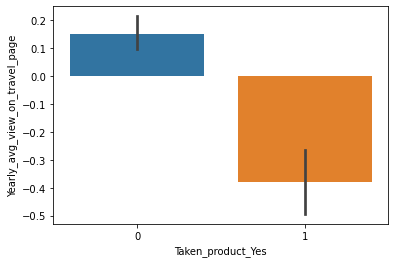

In [128]:
sns.barplot(data=Laptop,x= 'Taken_product_Yes',y='Yearly_avg_view_on_travel_page')

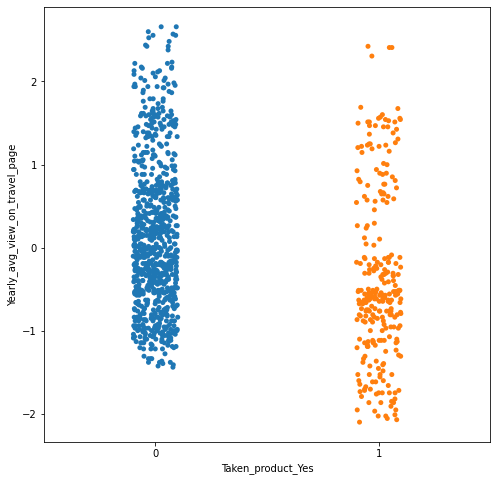

In [129]:
plt.figure(figsize=(8,8))
sns.stripplot(Laptop["Taken_product_Yes"], Laptop['Yearly_avg_view_on_travel_page'], jitter=True) 
plt.show()

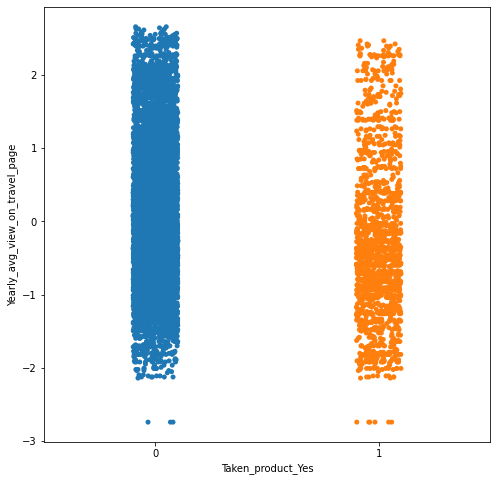

In [130]:
plt.figure(figsize=(8,8))
sns.stripplot(Mobile["Taken_product_Yes"], Mobile['Yearly_avg_view_on_travel_page'], jitter=True) 
plt.show()

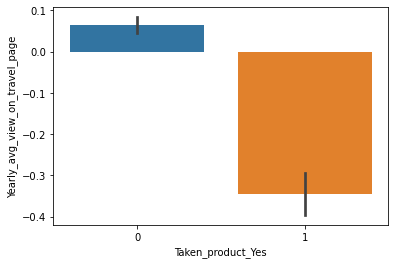

In [131]:
sns.barplot(data=Mobile,x= 'Taken_product_Yes',y='Yearly_avg_view_on_travel_page')

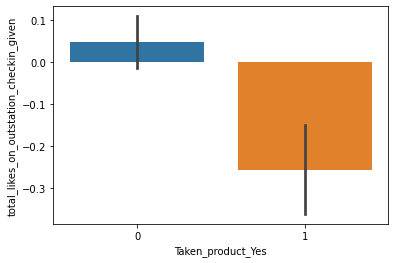

In [132]:
sns.barplot(data=Laptop,x= 'Taken_product_Yes',y='total_likes_on_outstation_checkin_given')

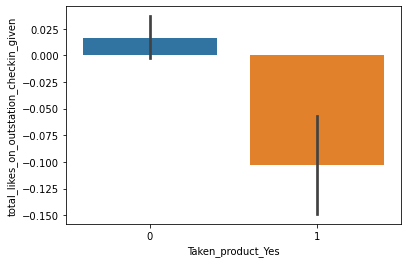

In [133]:
sns.barplot(data=Mobile,x= 'Taken_product_Yes',y='total_likes_on_outstation_checkin_given')

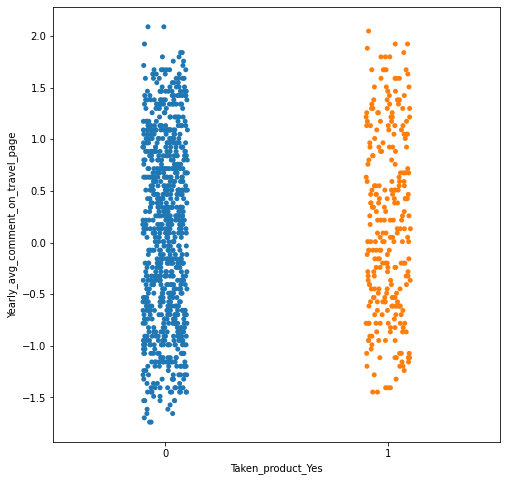

In [134]:
plt.figure(figsize=(8,8))
sns.stripplot(Laptop["Taken_product_Yes"], Laptop['Yearly_avg_comment_on_travel_page'], jitter=True) 
plt.show()

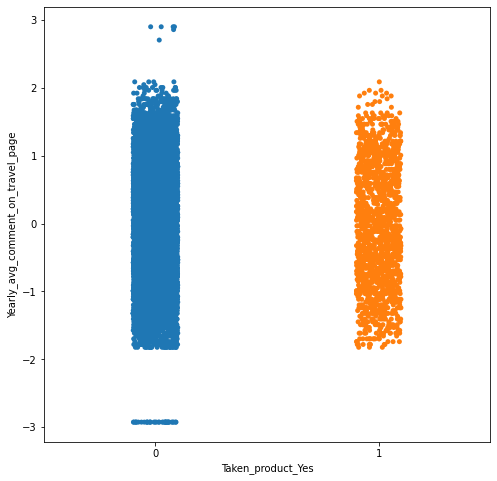

In [135]:
plt.figure(figsize=(8,8))
sns.stripplot(Mobile["Taken_product_Yes"], Mobile['Yearly_avg_comment_on_travel_page'], jitter=True) 
plt.show()

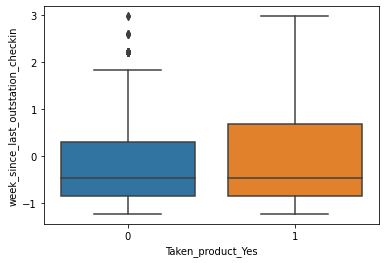

In [136]:
sns.boxplot(Laptop["Taken_product_Yes"], Laptop['week_since_last_outstation_checkin'])

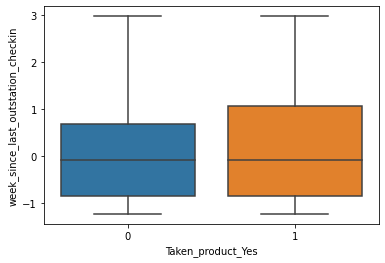

In [137]:
sns.boxplot(Mobile["Taken_product_Yes"], Mobile['week_since_last_outstation_checkin'])

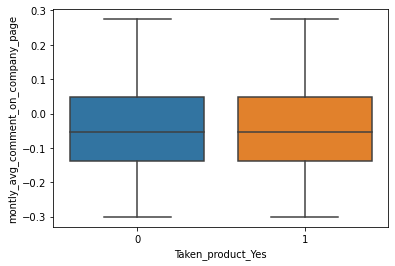

In [138]:
sns.boxplot(Laptop["Taken_product_Yes"], Laptop['montly_avg_comment_on_company_page'])

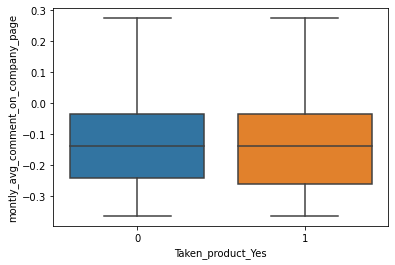

In [139]:
sns.boxplot(Mobile["Taken_product_Yes"], Mobile['montly_avg_comment_on_company_page'])

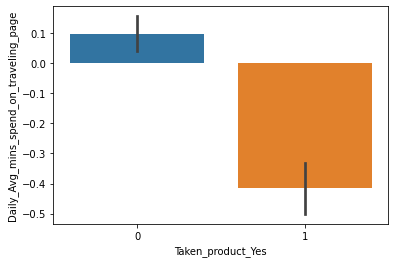

In [140]:
sns.barplot(data=Laptop,x= 'Taken_product_Yes',y='Daily_Avg_mins_spend_on_traveling_page')

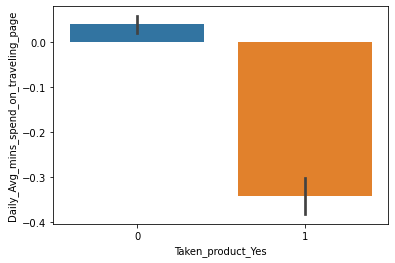

In [141]:
sns.barplot(data=Mobile,x= 'Taken_product_Yes',y='Daily_Avg_mins_spend_on_traveling_page')

#### Bivariate Analysis of Categorical Variables

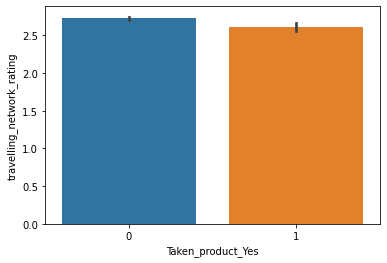

In [142]:
sns.barplot(Mobile['Taken_product_Yes'], Mobile['travelling_network_rating'])

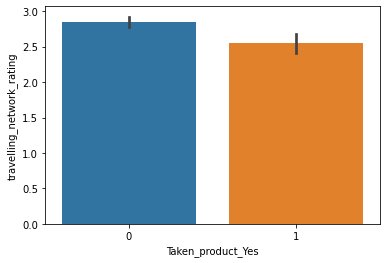

In [143]:
sns.barplot(Laptop['Taken_product_Yes'], Laptop['travelling_network_rating'])

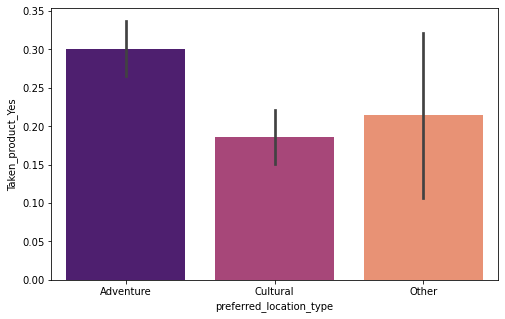

In [144]:
plt.figure(figsize=(8,5)) 
ax = sns.barplot(x='preferred_location_type', y='Taken_product_Yes', data=Laptop, palette='magma')

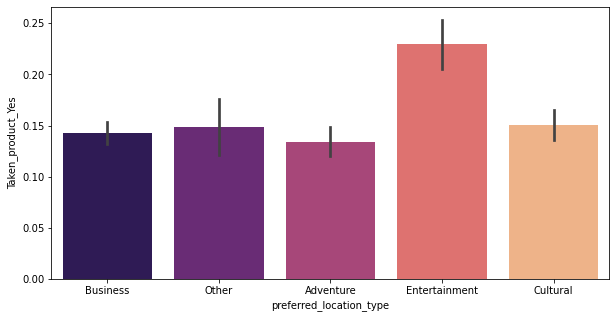

In [145]:
plt.figure(figsize=(10,5)) 
ax = sns.barplot(x='preferred_location_type', y='Taken_product_Yes', data=Mobile, palette='magma')

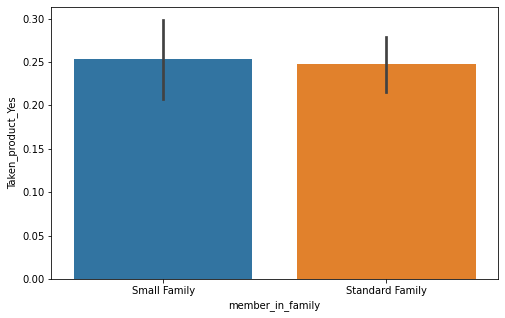

In [146]:
plt.figure(figsize=(8,5)) 
ax = sns.barplot(x='member_in_family', y='Taken_product_Yes', data=Laptop)

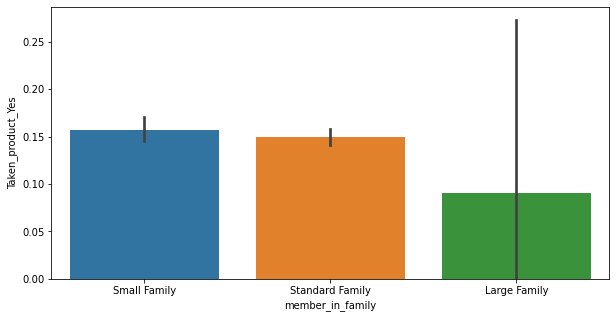

In [147]:
plt.figure(figsize=(10,5)) 
ax = sns.barplot(x='member_in_family', y='Taken_product_Yes', data=Mobile)

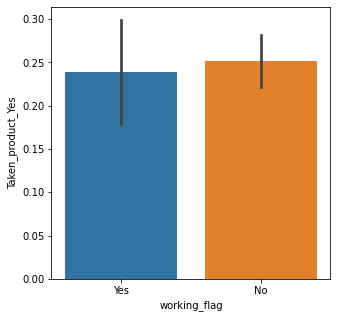

In [148]:
plt.figure(figsize=(5,5)) 
ax = sns.barplot(x='working_flag', y='Taken_product_Yes', data=Laptop)

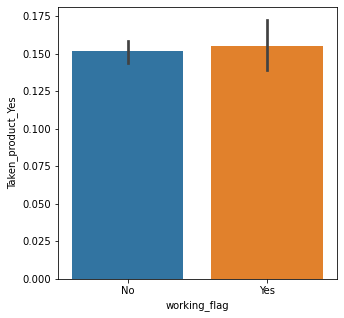

In [149]:
plt.figure(figsize=(5,5)) 
ax = sns.barplot(x='working_flag', y='Taken_product_Yes', data=Mobile)

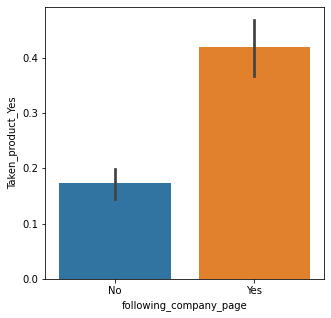

In [150]:
plt.figure(figsize=(5,5)) 
ax = sns.barplot(x='following_company_page', y='Taken_product_Yes', data=Laptop)

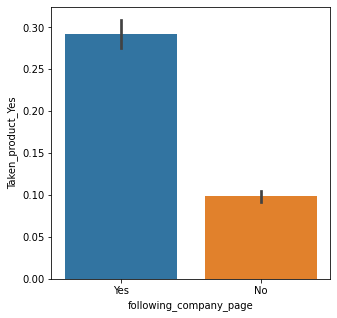

In [151]:
plt.figure(figsize=(5,5)) 
ax = sns.barplot(x='following_company_page', y='Taken_product_Yes', data=Mobile)

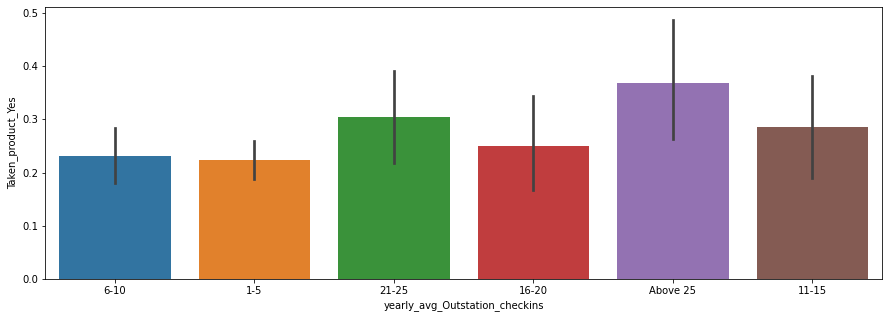

In [152]:
plt.figure(figsize=(15,5)) 
ax = sns.barplot(x='yearly_avg_Outstation_checkins', y='Taken_product_Yes', data=Laptop)

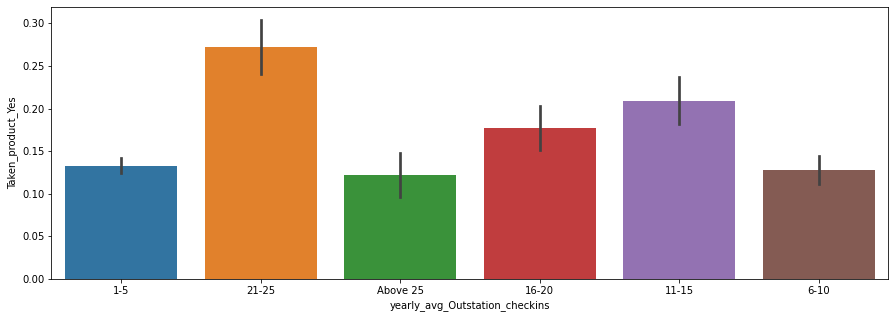

In [153]:
plt.figure(figsize=(15,5)) 
ax = sns.barplot(x='yearly_avg_Outstation_checkins', y='Taken_product_Yes', data=Mobile)

In [154]:
Laptop['travelling_network_rating'].value_counts()

3    364
4    348
1    200
2    196
Name: travelling_network_rating, dtype: int64

In [155]:
Laptop["travelling_network_rating"] = Laptop["travelling_network_rating"].replace({1:'4',
                                    2:'3',
                                     3 :'2',
                                      4:'1'})

In [156]:
Laptop['travelling_network_rating'].value_counts()

2    364
1    348
4    200
3    196
Name: travelling_network_rating, dtype: int64

In [157]:
Mobile['travelling_network_rating'].value_counts()

3    3308
4    3108
2    2228
1    2008
Name: travelling_network_rating, dtype: int64

In [158]:
Mobile["travelling_network_rating"] = Mobile["travelling_network_rating"].replace({1:'4',
                                    2:'3',
                                     3 :'2',
                                      4:'1'})

In [159]:
Mobile['travelling_network_rating'].value_counts()

2    3308
1    3108
3    2228
4    2008
Name: travelling_network_rating, dtype: int64

#### DATA ENCODING

In [160]:
Laptop.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,following_company_page,working_flag,travelling_network_rating,Adult_flag,Taken_product_Yes
5881,1.439855,-1.278780,-0.449105,-0.842262,0.089161,-0.420873,Laptop,6-10,Small Family,Adventure,No,Yes,1,1,0
5883,-0.378863,1.428945,-0.657217,-0.842262,-0.198559,-0.641374,Laptop,1-5,Standard Family,Adventure,Yes,No,2,0,0
5885,-0.452198,0.487578,0.383340,-1.224488,-0.116353,-0.641374,Laptop,1-5,Small Family,Adventure,No,No,2,0,0
5888,0.207820,-1.432001,-1.115061,-1.224488,0.089161,-0.420873,Laptop,21-25,Standard Family,Adventure,No,Yes,3,0,0
5906,-0.452198,0.779213,0.216851,-0.842262,0.089161,-0.420873,Laptop,16-20,Small Family,Adventure,Yes,Yes,3,0,1


In [161]:
Mobile.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,following_company_page,working_flag,travelling_network_rating,Adult_flag,Taken_product_Yes
0,0.383825,0.722972,0.799562,1.833319,-0.362970,-0.641374,Mobile,1-5,Small Family,Business,Yes,No,4,0,1
1,1.263850,-1.279545,-0.573972,-0.842262,-0.116353,-0.420873,Mobile,1-5,Small Family,Business,No,Yes,1,1,0
2,-0.056187,1.382367,0.716318,1.068868,-0.280765,-0.751624,Mobile,1-5,Small Family,Other,Yes,No,3,0,1
3,-0.496200,1.428598,-0.782083,-0.842262,-0.362970,-0.641374,Mobile,1-5,Standard Family,Business,Yes,No,2,0,0
4,-1.156218,-0.520389,-1.448039,2.215545,-0.342419,-0.861874,Mobile,1-5,Small Family,Business,No,No,1,1,0


In [162]:
Laptop =pd.get_dummies(Laptop, columns=['following_company_page'],drop_first=True)

In [163]:
Mobile =pd.get_dummies(Mobile, columns=['following_company_page'],drop_first=True)

In [164]:
Laptop.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,working_flag,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes
5881,1.439855,-1.278780,-0.449105,-0.842262,0.089161,-0.420873,Laptop,6-10,Small Family,Adventure,Yes,1,1,0,0
5883,-0.378863,1.428945,-0.657217,-0.842262,-0.198559,-0.641374,Laptop,1-5,Standard Family,Adventure,No,2,0,0,1
5885,-0.452198,0.487578,0.383340,-1.224488,-0.116353,-0.641374,Laptop,1-5,Small Family,Adventure,No,2,0,0,0
5888,0.207820,-1.432001,-1.115061,-1.224488,0.089161,-0.420873,Laptop,21-25,Standard Family,Adventure,Yes,3,0,0,0
5906,-0.452198,0.779213,0.216851,-0.842262,0.089161,-0.420873,Laptop,16-20,Small Family,Adventure,Yes,3,0,1,1


In [165]:
Mobile.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,working_flag,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes
0,0.383825,0.722972,0.799562,1.833319,-0.362970,-0.641374,Mobile,1-5,Small Family,Business,No,4,0,1,1
1,1.263850,-1.279545,-0.573972,-0.842262,-0.116353,-0.420873,Mobile,1-5,Small Family,Business,Yes,1,1,0,0
2,-0.056187,1.382367,0.716318,1.068868,-0.280765,-0.751624,Mobile,1-5,Small Family,Other,No,3,0,1,1
3,-0.496200,1.428598,-0.782083,-0.842262,-0.362970,-0.641374,Mobile,1-5,Standard Family,Business,No,2,0,0,1
4,-1.156218,-0.520389,-1.448039,2.215545,-0.342419,-0.861874,Mobile,1-5,Small Family,Business,No,1,1,0,0


In [166]:
Laptop =pd.get_dummies(Laptop, columns=['working_flag'],drop_first=True)

In [167]:
Mobile =pd.get_dummies(Mobile, columns=['working_flag'],drop_first=True)

In [168]:
Laptop.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes,working_flag_Yes
5881,1.439855,-1.278780,-0.449105,-0.842262,0.089161,-0.420873,Laptop,6-10,Small Family,Adventure,1,1,0,0,1
5883,-0.378863,1.428945,-0.657217,-0.842262,-0.198559,-0.641374,Laptop,1-5,Standard Family,Adventure,2,0,0,1,0
5885,-0.452198,0.487578,0.383340,-1.224488,-0.116353,-0.641374,Laptop,1-5,Small Family,Adventure,2,0,0,0,0
5888,0.207820,-1.432001,-1.115061,-1.224488,0.089161,-0.420873,Laptop,21-25,Standard Family,Adventure,3,0,0,0,1
5906,-0.452198,0.779213,0.216851,-0.842262,0.089161,-0.420873,Laptop,16-20,Small Family,Adventure,3,0,1,1,1


In [169]:
Mobile.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes,working_flag_Yes
0,0.383825,0.722972,0.799562,1.833319,-0.362970,-0.641374,Mobile,1-5,Small Family,Business,4,0,1,1,0
1,1.263850,-1.279545,-0.573972,-0.842262,-0.116353,-0.420873,Mobile,1-5,Small Family,Business,1,1,0,0,1
2,-0.056187,1.382367,0.716318,1.068868,-0.280765,-0.751624,Mobile,1-5,Small Family,Other,3,0,1,1,0
3,-0.496200,1.428598,-0.782083,-0.842262,-0.362970,-0.641374,Mobile,1-5,Standard Family,Business,2,0,0,1,0
4,-1.156218,-0.520389,-1.448039,2.215545,-0.342419,-0.861874,Mobile,1-5,Small Family,Business,1,1,0,0,0


In [170]:
Laptop= pd.get_dummies(Laptop, prefix='Preferred_location', columns=['preferred_location_type'])

In [171]:
Mobile= pd.get_dummies(Mobile, prefix='Preferred_location', columns=['preferred_location_type'])

In [172]:
Laptop.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes,working_flag_Yes,Preferred_location_Adventure,Preferred_location_Cultural,Preferred_location_Other
5881,1.439855,-1.278780,-0.449105,-0.842262,0.089161,-0.420873,Laptop,6-10,Small Family,1,1,0,0,1,1,0,0
5883,-0.378863,1.428945,-0.657217,-0.842262,-0.198559,-0.641374,Laptop,1-5,Standard Family,2,0,0,1,0,1,0,0
5885,-0.452198,0.487578,0.383340,-1.224488,-0.116353,-0.641374,Laptop,1-5,Small Family,2,0,0,0,0,1,0,0
5888,0.207820,-1.432001,-1.115061,-1.224488,0.089161,-0.420873,Laptop,21-25,Standard Family,3,0,0,0,1,1,0,0
5906,-0.452198,0.779213,0.216851,-0.842262,0.089161,-0.420873,Laptop,16-20,Small Family,3,0,1,1,1,1,0,0


In [173]:
Mobile.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes,working_flag_Yes,Preferred_location_Adventure,Preferred_location_Business,Preferred_location_Cultural,Preferred_location_Entertainment,Preferred_location_Other
0,0.383825,0.722972,0.799562,1.833319,-0.362970,-0.641374,Mobile,1-5,Small Family,4,0,1,1,0,0,1,0,0,0
1,1.263850,-1.279545,-0.573972,-0.842262,-0.116353,-0.420873,Mobile,1-5,Small Family,1,1,0,0,1,0,1,0,0,0
2,-0.056187,1.382367,0.716318,1.068868,-0.280765,-0.751624,Mobile,1-5,Small Family,3,0,1,1,0,0,0,0,0,1
3,-0.496200,1.428598,-0.782083,-0.842262,-0.362970,-0.641374,Mobile,1-5,Standard Family,2,0,0,1,0,0,1,0,0,0
4,-1.156218,-0.520389,-1.448039,2.215545,-0.342419,-0.861874,Mobile,1-5,Small Family,1,1,0,0,0,0,1,0,0,0


In [174]:
Laptop.shape

(1108, 17)

In [175]:
Mobile.shape

(10652, 19)

In [176]:
Laptop.columns

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'Yearly_avg_comment_on_travel_page',
       'week_since_last_outstation_checkin',
       'montly_avg_comment_on_company_page',
       'Daily_Avg_mins_spend_on_traveling_page', 'preferred_device',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'travelling_network_rating', 'Adult_flag', 'Taken_product_Yes',
       'following_company_page_Yes', 'working_flag_Yes',
       'Preferred_location_Adventure', 'Preferred_location_Cultural',
       'Preferred_location_Other'],
      dtype='object')

In [177]:
Mobile.columns

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'Yearly_avg_comment_on_travel_page',
       'week_since_last_outstation_checkin',
       'montly_avg_comment_on_company_page',
       'Daily_Avg_mins_spend_on_traveling_page', 'preferred_device',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'travelling_network_rating', 'Adult_flag', 'Taken_product_Yes',
       'following_company_page_Yes', 'working_flag_Yes',
       'Preferred_location_Adventure', 'Preferred_location_Business',
       'Preferred_location_Cultural', 'Preferred_location_Entertainment',
       'Preferred_location_Other'],
      dtype='object')

In [178]:
import category_encoders as ce

In [179]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['member_in_family'],return_df=True,
                           mapping=[{'col':'member_in_family',
'mapping':{'None':0,'Small Family':1,'Standard Family':2,'Large Family':3}}])

In [180]:
Laptop = encoder.fit_transform(Laptop)

In [181]:
Laptop.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes,working_flag_Yes,Preferred_location_Adventure,Preferred_location_Cultural,Preferred_location_Other
5881,1.439855,-1.278780,-0.449105,-0.842262,0.089161,-0.420873,Laptop,6-10,1,1,1,0,0,1,1,0,0
5883,-0.378863,1.428945,-0.657217,-0.842262,-0.198559,-0.641374,Laptop,1-5,2,2,0,0,1,0,1,0,0
5885,-0.452198,0.487578,0.383340,-1.224488,-0.116353,-0.641374,Laptop,1-5,1,2,0,0,0,0,1,0,0
5888,0.207820,-1.432001,-1.115061,-1.224488,0.089161,-0.420873,Laptop,21-25,2,3,0,0,0,1,1,0,0
5906,-0.452198,0.779213,0.216851,-0.842262,0.089161,-0.420873,Laptop,16-20,1,3,0,1,1,1,1,0,0


In [182]:
Mobile = encoder.fit_transform(Mobile)

In [183]:
Mobile.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes,working_flag_Yes,Preferred_location_Adventure,Preferred_location_Business,Preferred_location_Cultural,Preferred_location_Entertainment,Preferred_location_Other
0,0.383825,0.722972,0.799562,1.833319,-0.362970,-0.641374,Mobile,1-5,1,4,0,1,1,0,0,1,0,0,0
1,1.263850,-1.279545,-0.573972,-0.842262,-0.116353,-0.420873,Mobile,1-5,1,1,1,0,0,1,0,1,0,0,0
2,-0.056187,1.382367,0.716318,1.068868,-0.280765,-0.751624,Mobile,1-5,1,3,0,1,1,0,0,0,0,0,1
3,-0.496200,1.428598,-0.782083,-0.842262,-0.362970,-0.641374,Mobile,1-5,2,2,0,0,1,0,0,1,0,0,0
4,-1.156218,-0.520389,-1.448039,2.215545,-0.342419,-0.861874,Mobile,1-5,1,1,1,0,0,0,0,1,0,0,0


In [184]:
encoder1= ce.OrdinalEncoder(cols=['yearly_avg_Outstation_checkins'],return_df=True,
                           mapping=[{'col':'yearly_avg_Outstation_checkins',
'mapping':{'None':0,'1-5':1,'6-10':2,'11-15':3,'16-20':4,'21-25':5,'Above 25':6}}])

In [185]:
Laptop = encoder1.fit_transform(Laptop)

In [186]:
Laptop.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes,working_flag_Yes,Preferred_location_Adventure,Preferred_location_Cultural,Preferred_location_Other
5881,1.439855,-1.278780,-0.449105,-0.842262,0.089161,-0.420873,Laptop,2,1,1,1,0,0,1,1,0,0
5883,-0.378863,1.428945,-0.657217,-0.842262,-0.198559,-0.641374,Laptop,1,2,2,0,0,1,0,1,0,0
5885,-0.452198,0.487578,0.383340,-1.224488,-0.116353,-0.641374,Laptop,1,1,2,0,0,0,0,1,0,0
5888,0.207820,-1.432001,-1.115061,-1.224488,0.089161,-0.420873,Laptop,5,2,3,0,0,0,1,1,0,0
5906,-0.452198,0.779213,0.216851,-0.842262,0.089161,-0.420873,Laptop,4,1,3,0,1,1,1,1,0,0


In [187]:
Mobile = encoder1.fit_transform(Mobile)

In [188]:
Mobile.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes,working_flag_Yes,Preferred_location_Adventure,Preferred_location_Business,Preferred_location_Cultural,Preferred_location_Entertainment,Preferred_location_Other
0,0.383825,0.722972,0.799562,1.833319,-0.362970,-0.641374,Mobile,1,1,4,0,1,1,0,0,1,0,0,0
1,1.263850,-1.279545,-0.573972,-0.842262,-0.116353,-0.420873,Mobile,1,1,1,1,0,0,1,0,1,0,0,0
2,-0.056187,1.382367,0.716318,1.068868,-0.280765,-0.751624,Mobile,1,1,3,0,1,1,0,0,0,0,0,1
3,-0.496200,1.428598,-0.782083,-0.842262,-0.362970,-0.641374,Mobile,1,2,2,0,0,1,0,0,1,0,0,0
4,-1.156218,-0.520389,-1.448039,2.215545,-0.342419,-0.861874,Mobile,1,1,1,1,0,0,0,0,1,0,0,0


In [189]:
Laptop['preferred_device'] = Laptop['preferred_device'].replace("Laptop","0")

In [190]:
Mobile['preferred_device'] = Mobile['preferred_device'].replace("Mobile","0")

In [191]:
Laptop.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes,working_flag_Yes,Preferred_location_Adventure,Preferred_location_Cultural,Preferred_location_Other
5881,1.439855,-1.278780,-0.449105,-0.842262,0.089161,-0.420873,0,2,1,1,1,0,0,1,1,0,0
5883,-0.378863,1.428945,-0.657217,-0.842262,-0.198559,-0.641374,0,1,2,2,0,0,1,0,1,0,0
5885,-0.452198,0.487578,0.383340,-1.224488,-0.116353,-0.641374,0,1,1,2,0,0,0,0,1,0,0
5888,0.207820,-1.432001,-1.115061,-1.224488,0.089161,-0.420873,0,5,2,3,0,0,0,1,1,0,0
5906,-0.452198,0.779213,0.216851,-0.842262,0.089161,-0.420873,0,4,1,3,0,1,1,1,1,0,0


In [192]:
Mobile.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,travelling_network_rating,Adult_flag,Taken_product_Yes,following_company_page_Yes,working_flag_Yes,Preferred_location_Adventure,Preferred_location_Business,Preferred_location_Cultural,Preferred_location_Entertainment,Preferred_location_Other
0,0.383825,0.722972,0.799562,1.833319,-0.362970,-0.641374,0,1,1,4,0,1,1,0,0,1,0,0,0
1,1.263850,-1.279545,-0.573972,-0.842262,-0.116353,-0.420873,0,1,1,1,1,0,0,1,0,1,0,0,0
2,-0.056187,1.382367,0.716318,1.068868,-0.280765,-0.751624,0,1,1,3,0,1,1,0,0,0,0,0,1
3,-0.496200,1.428598,-0.782083,-0.842262,-0.362970,-0.641374,0,1,2,2,0,0,1,0,0,1,0,0,0
4,-1.156218,-0.520389,-1.448039,2.215545,-0.342419,-0.861874,0,1,1,1,1,0,0,0,0,1,0,0,0


## Project Notes - 2

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
Lap_X = Laptop.drop("Taken_product_Yes", axis = 1)
Lap_y = Laptop["Taken_product_Yes"]
Lap_X.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,travelling_network_rating,Adult_flag,following_company_page_Yes,working_flag_Yes,Preferred_location_Adventure,Preferred_location_Cultural,Preferred_location_Other
5881,1.439855,-1.278780,-0.449105,-0.842262,0.089161,-0.420873,0,2,1,1,1,0,1,1,0,0
5883,-0.378863,1.428945,-0.657217,-0.842262,-0.198559,-0.641374,0,1,2,2,0,1,0,1,0,0
5885,-0.452198,0.487578,0.383340,-1.224488,-0.116353,-0.641374,0,1,1,2,0,0,0,1,0,0
5888,0.207820,-1.432001,-1.115061,-1.224488,0.089161,-0.420873,0,5,2,3,0,0,1,1,0,0
5906,-0.452198,0.779213,0.216851,-0.842262,0.089161,-0.420873,0,4,1,3,0,1,1,1,0,0


In [195]:
#Split the Data into train & test dataset(70:30)
L_X_train, L_X_test, L_y_train, L_y_test = train_test_split(Lap_X, Lap_y, test_size=0.30, random_state=1)

In [196]:
print(L_X_train.shape)
print(L_X_test.shape)
print(L_y_train.shape)
print(L_y_test.shape)

(775, 16)
(333, 16)
(775,)
(333,)


In [197]:
Mob_X = Mobile.drop("Taken_product_Yes", axis = 1)
Mob_y = Mobile["Taken_product_Yes"]
Mob_X.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,Daily_Avg_mins_spend_on_traveling_page,preferred_device,yearly_avg_Outstation_checkins,member_in_family,travelling_network_rating,Adult_flag,following_company_page_Yes,working_flag_Yes,Preferred_location_Adventure,Preferred_location_Business,Preferred_location_Cultural,Preferred_location_Entertainment,Preferred_location_Other
0,0.383825,0.722972,0.799562,1.833319,-0.362970,-0.641374,0,1,1,4,0,1,0,0,1,0,0,0
1,1.263850,-1.279545,-0.573972,-0.842262,-0.116353,-0.420873,0,1,1,1,1,0,1,0,1,0,0,0
2,-0.056187,1.382367,0.716318,1.068868,-0.280765,-0.751624,0,1,1,3,0,1,0,0,0,0,0,1
3,-0.496200,1.428598,-0.782083,-0.842262,-0.362970,-0.641374,0,1,2,2,0,1,0,0,1,0,0,0
4,-1.156218,-0.520389,-1.448039,2.215545,-0.342419,-0.861874,0,1,1,1,1,0,0,0,1,0,0,0


In [198]:
#Split the Data into train & test dataset(70:30)
M_X_train, M_X_test, M_y_train, M_y_test = train_test_split(Mob_X, Mob_y, test_size=0.30, random_state=1)

In [199]:
print(M_X_train.shape)
print(M_X_test.shape)
print(M_y_train.shape)
print(M_y_test.shape)

(7456, 18)
(3196, 18)
(7456,)
(3196,)


### Model Building on Mobile Dataset

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#### Logistic Regression Model on Mobile Dataset

In [201]:
MLR_model = LogisticRegression()
MLR_model.fit(M_X_train, M_y_train)

LogisticRegression()

In [202]:
ytrain_pred = MLR_model.predict(M_X_train)
ytest_pred = MLR_model.predict(M_X_test)

In [203]:
ytrain_proba = MLR_model.predict_proba(M_X_train)
ytest_proba = MLR_model.predict_proba(M_X_test)
pd.DataFrame(ytest_proba).head()

,0,1
0,0.919787,0.080213
1,0.946818,0.053182
2,0.813777,0.186223
3,0.913489,0.086511
4,0.922730,0.077270


In [204]:
#Accuracy on Training Dataset
MLR_train_score = MLR_model.score(M_X_train, M_y_train)
print('Accuracy Score is ',MLR_train_score)

Accuracy Score is  0.8672210300429185


In [205]:
# Accuracy - Test Data
MLR_test_score = MLR_model.score(M_X_test, M_y_test)
print('Accuracy Score is ',MLR_test_score)

Accuracy Score is  0.8682728410513142


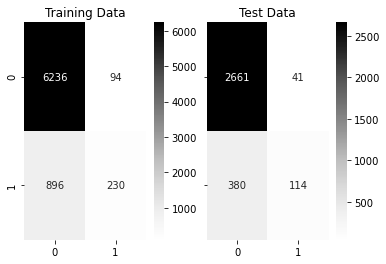

In [206]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(M_y_train,ytrain_pred)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(M_y_test,ytest_pred)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [207]:
print('Classification Report of the training data:\n\n',classification_report(M_y_train, ytrain_pred), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      6330
           1       0.71      0.20      0.32      1126

    accuracy                           0.87      7456
   macro avg       0.79      0.59      0.62      7456
weighted avg       0.85      0.87      0.83      7456
 



In [208]:
print('Classification Report of the test data:\n\n',classification_report(M_y_test,ytest_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2702
           1       0.74      0.23      0.35       494

    accuracy                           0.87      3196
   macro avg       0.81      0.61      0.64      3196
weighted avg       0.85      0.87      0.84      3196
 



AUC for the Training Data: 0.784
AUC for the Test Data: 0.794


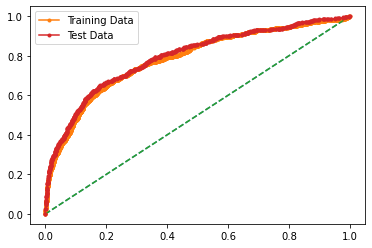

In [209]:
# AUC and ROC for the training data
# calculate AUC
MLR_train_auc = metrics.roc_auc_score(M_y_train,ytrain_proba[:,1])
print('AUC for the Training Data: %.3f' % MLR_train_auc)

#  calculate roc curve
MLR_fpr_train, MLR_tpr_train, thresholds = metrics.roc_curve(M_y_train,ytrain_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(MLR_fpr_train, MLR_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
MLR_test_auc = metrics.roc_auc_score(M_y_test,ytest_proba[:,1])
print('AUC for the Test Data: %.3f' % MLR_test_auc)

#  calculate roc curve
MLR_fpr_test, MLR_tpr_test, thresholds = metrics.roc_curve(M_y_test,ytest_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(MLR_fpr_test, MLR_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [210]:
MLR_metrics=classification_report(M_y_train,ytrain_pred,output_dict=True)
dfm=pd.DataFrame(MLR_metrics).transpose()
MLR_train_f1=round(dfm.loc["1"][2],2)
MLR_train_recall=round(dfm.loc["1"][1],2)
MLR_train_precision=round(dfm.loc["1"][0],2)
print ('MLR_train_precision ',MLR_train_precision)
print ('MLR_train_recall ',MLR_train_recall)
print ('MLR_train_f1 ',MLR_train_f1)

MLR_train_precision  0.71
MLR_train_recall  0.2
MLR_train_f1  0.32


In [211]:
MLR_metrics=classification_report(M_y_test, ytest_pred,output_dict=True)
dfm=pd.DataFrame(MLR_metrics).transpose()
MLR_test_precision=round(dfm.loc["1"][0],2)
MLR_test_recall=round(dfm.loc["1"][1],2)
MLR_test_f1=round(dfm.loc["1"][2],2)
print ('MLR_test_precision ',MLR_test_precision)
print ('MLR_test_recall ',MLR_test_recall)
print ('MLR_test_f1 ',MLR_test_f1)

MLR_test_precision  0.74
MLR_test_recall  0.23
MLR_test_f1  0.35


#### Logistic Regression Model Tunning

In [212]:
param_grid_mlr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced']                                    
}

In [213]:
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1),
                             param_grid=param_grid_mlr, verbose=1, 
                             cv=3)
logModel_grid.fit(M_X_train, M_y_train)
print(logModel_grid.best_estimator_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=1)


In [214]:
logModel_grid.best_params_

{'class_weight': 'balanced', 'max_iter': 20, 'solver': 'lbfgs'}

In [215]:
print(logModel_grid.best_estimator_)

LogisticRegression(class_weight='balanced', max_iter=20, random_state=1)


In [216]:
TMLR_model = logModel_grid.best_estimator_

In [217]:
#Prediction on the Training Set & Test Data Set
TMLR_ytrain_predict = TMLR_model.predict(M_X_train)
TMLR_ytest_predict = TMLR_model.predict(M_X_test)

In [218]:
# Getting the probabilites on the test set
TMLR_ytest_prob=TMLR_model.predict_proba(M_X_test)
TMLR_ytrain_prob=TMLR_model.predict_proba(M_X_train)
pd.DataFrame(TMLR_ytest_prob).head()

,0,1
0,0.629240,0.370760
1,0.758925,0.241075
2,0.411472,0.588528
3,0.631365,0.368635
4,0.690632,0.309368


In [219]:
# Accuracy - Training Data
TMLR_train_score = TMLR_model.score(M_X_train, M_y_train)
print('Accuracy Score is ',TMLR_train_score)

Accuracy Score is  0.7131169527896996


In [220]:
# Accuracy - Test Data
TMLR_test_score = TMLR_model.score(M_X_test, M_y_test)
print('Accuracy Score is ',TMLR_test_score)

Accuracy Score is  0.7049436795994993


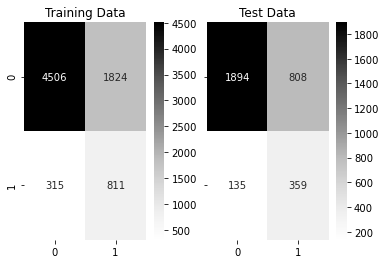

In [221]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(M_y_train,TMLR_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(M_y_test,TMLR_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [222]:
print('Classification Report of the training data:\n\n',classification_report(M_y_train, TMLR_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.93      0.71      0.81      6330
           1       0.31      0.72      0.43      1126

    accuracy                           0.71      7456
   macro avg       0.62      0.72      0.62      7456
weighted avg       0.84      0.71      0.75      7456
 



In [223]:
print('Classification Report of the test data:\n\n',classification_report(M_y_test,TMLR_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.93      0.70      0.80      2702
           1       0.31      0.73      0.43       494

    accuracy                           0.70      3196
   macro avg       0.62      0.71      0.62      3196
weighted avg       0.84      0.70      0.74      3196
 



In [224]:
TMLR_metrics=classification_report(M_y_train,TMLR_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(TMLR_metrics).transpose()
TMLR_train_f1=round(dfm.loc["1"][2],2)
TMLR_train_recall=round(dfm.loc["1"][1],2)
TMLR_train_precision=round(dfm.loc["1"][0],2)
print ('TMLR_train_precision ',TMLR_train_precision)
print ('TMLR_train_recall ',TMLR_train_recall)
print ('TMLR_train_f1 ',TMLR_train_f1)

TMLR_train_precision  0.31
TMLR_train_recall  0.72
TMLR_train_f1  0.43


In [225]:
TMLR_metrics=classification_report(M_y_test, TMLR_ytest_predict,output_dict=True)
dfm=pd.DataFrame(TMLR_metrics).transpose()
TMLR_test_precision=round(dfm.loc["1"][0],2)
TMLR_test_recall=round(dfm.loc["1"][1],2)
TMLR_test_f1=round(dfm.loc["1"][2],2)
print ('TMLR_test_precision ',TMLR_test_precision)
print ('TMLR_test_recall ',TMLR_test_recall)
print ('TMLR_test_f1 ',TMLR_test_f1)

TMLR_test_precision  0.31
TMLR_test_recall  0.73
TMLR_test_f1  0.43


AUC for the Training Data: 0.783
AUC for the Test Data: 0.792


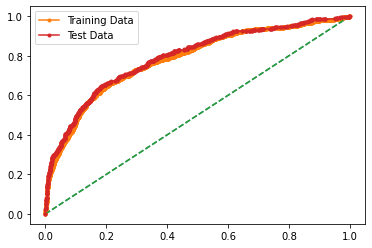

In [226]:
# AUC and ROC for the training data
# calculate AUC
TMLR_train_auc = metrics.roc_auc_score(M_y_train,TMLR_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % TMLR_train_auc)

#  calculate roc curve
TMLR_fpr_train, TMLR_tpr_train, thresholds = metrics.roc_curve(M_y_train,TMLR_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(TMLR_fpr_train, TMLR_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
TMLR_test_auc = metrics.roc_auc_score(M_y_test,TMLR_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % TMLR_test_auc)

#  calculate roc curve
TMLR_fpr_test, TMLR_tpr_test, thresholds = metrics.roc_curve(M_y_test,TMLR_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(TMLR_fpr_test, TMLR_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Linear Discriminant Analysis

In [227]:
MLDA = LinearDiscriminantAnalysis()
MLDA_model=MLDA.fit(M_X_train,M_y_train)

In [228]:
ytrain_pred_MLDA = MLDA_model.predict(M_X_train)
ytest_pred_MLDA = MLDA_model.predict(M_X_test)

In [229]:
ytrain_proba_MLDA = MLDA_model.predict_proba(M_X_train)
ytest_proba_MLDA = MLDA_model.predict_proba(M_X_test)

In [230]:
pd.DataFrame(ytest_proba_MLDA).head()

,0,1
0,0.914450,0.085550
1,0.930743,0.069257
2,0.823052,0.176948
3,0.923772,0.076228
4,0.927834,0.072166


In [231]:
# Accuracy - Training Data
MLDA_train_score = MLDA_model.score(M_X_train, M_y_train)
print('Accuracy Score is ',MLDA_train_score)

Accuracy Score is  0.8666845493562232


In [232]:
# Accuracy - Test Data
MLDA_test_score = MLDA_model.score(M_X_test, M_y_test)
print('Accuracy Score is ',MLDA_test_score)

Accuracy Score is  0.8679599499374218


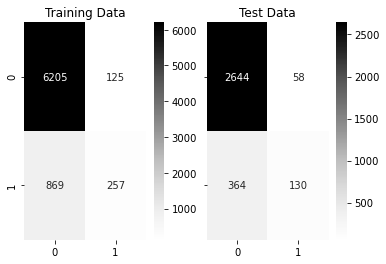

In [233]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(M_y_train,ytrain_pred_MLDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(M_y_test,ytest_pred_MLDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [234]:
print('Classification Report of the training data:\n\n',classification_report(M_y_train, ytrain_pred_MLDA), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.98      0.93      6330
           1       0.67      0.23      0.34      1126

    accuracy                           0.87      7456
   macro avg       0.77      0.60      0.63      7456
weighted avg       0.85      0.87      0.84      7456
 



In [235]:
print('Classification Report of the test data:\n\n',classification_report(M_y_test,ytest_pred_MLDA),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2702
           1       0.69      0.26      0.38       494

    accuracy                           0.87      3196
   macro avg       0.79      0.62      0.65      3196
weighted avg       0.85      0.87      0.84      3196
 



AUC for the Training Data: 0.781
AUC for the Test Data: 0.792


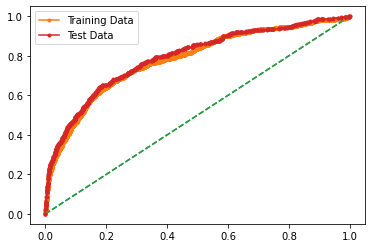

In [236]:
# AUC and ROC for the training data
# calculate AUC
MLDA_train_auc = metrics.roc_auc_score(M_y_train,ytrain_proba_MLDA[:,1])
print('AUC for the Training Data: %.3f' % MLDA_train_auc)

#  calculate roc curve
MLDA_fpr_train, MLDA_tpr_train, thresholds = metrics.roc_curve(M_y_train,ytrain_proba_MLDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(MLDA_fpr_train, MLDA_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
MLDA_test_auc = metrics.roc_auc_score(M_y_test,ytest_proba_MLDA[:,1])
print('AUC for the Test Data: %.3f' % MLDA_test_auc)

#  calculate roc curve
MLDA_fpr_test, MLDA_tpr_test, thresholds = metrics.roc_curve(M_y_test,ytest_proba_MLDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(MLDA_fpr_test, MLDA_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [237]:
MLDA_metrics=classification_report(M_y_train,ytrain_pred_MLDA,output_dict=True)
dfm=pd.DataFrame(MLDA_metrics).transpose()
MLDA_train_f1=round(dfm.loc["1"][2],2)
MLDA_train_recall=round(dfm.loc["1"][1],2)
MLDA_train_precision=round(dfm.loc["1"][0],2)
print ('MLDA_train_precision ',MLDA_train_precision)
print ('MLDA_train_recall ',MLDA_train_recall)
print ('MLDA_train_f1 ',MLDA_train_f1)

MLDA_train_precision  0.67
MLDA_train_recall  0.23
MLDA_train_f1  0.34


In [238]:
MLDA_metrics=classification_report(M_y_test, ytest_pred_MLDA,output_dict=True)
dfm=pd.DataFrame(MLDA_metrics).transpose()
MLDA_test_precision=round(dfm.loc["1"][0],2)
MLDA_test_recall=round(dfm.loc["1"][1],2)
MLDA_test_f1=round(dfm.loc["1"][2],2)
print ('MLDA_test_precision ',MLDA_test_precision)
print ('MLDA_test_recall ',MLDA_test_recall)
print ('MLDA_test_f1 ',MLDA_test_f1)

MLDA_test_precision  0.69
MLDA_test_recall  0.26
MLDA_test_f1  0.38


#### Gaussian Naïve Bayes Model

In [239]:
from sklearn.naive_bayes import GaussianNB

In [240]:
MNB_model = GaussianNB()
MNB_model.fit(M_X_train, M_y_train)

GaussianNB()

In [241]:
MNB_ytrain_predict = MNB_model.predict(M_X_train)
MNB_ytest_predict = MNB_model.predict(M_X_test)

In [242]:
MNB_train_score = MNB_model.score(M_X_train, M_y_train)
print('Accuracy Score is ',MNB_train_score)

Accuracy Score is  0.8515289699570815


In [243]:
MNB_test_score = MNB_model.score(M_X_test, M_y_test) 
print('Accuracy Score is ',MNB_test_score)

Accuracy Score is  0.8504380475594493


In [244]:
MNB_ytrain_proba = MNB_model.predict_proba(M_X_train)
MNB_ytest_proba = MNB_model.predict_proba(M_X_test)

In [245]:
pd.DataFrame(MNB_ytest_proba).head()

,0,1
0,0.947588,0.052412
1,0.987297,0.012703
2,0.774668,0.225332
3,0.915908,0.084092
4,0.895935,0.104065


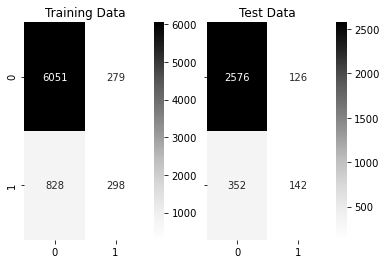

In [246]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(M_y_train,MNB_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(M_y_test,MNB_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [247]:
print('Classification Report of the training data:\n\n',classification_report(M_y_train, MNB_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.96      0.92      6330
           1       0.52      0.26      0.35      1126

    accuracy                           0.85      7456
   macro avg       0.70      0.61      0.63      7456
weighted avg       0.82      0.85      0.83      7456
 



In [248]:
print('Classification Report of the test data:\n\n',classification_report(M_y_test, MNB_ytest_predict), '\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      0.95      0.92      2702
           1       0.53      0.29      0.37       494

    accuracy                           0.85      3196
   macro avg       0.70      0.62      0.64      3196
weighted avg       0.83      0.85      0.83      3196
 



In [249]:
MNB_metrics=classification_report(M_y_train,MNB_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(MNB_metrics).transpose()
MNB_train_f1=round(dfm.loc["1"][2],2)
MNB_train_recall=round(dfm.loc["1"][1],2)
MNB_train_precision=round(dfm.loc["1"][0],2)
print ('MNB_train_precision ',MNB_train_precision)
print ('MNB_train_recall ',MNB_train_recall)
print ('MNB_train_f1 ',MNB_train_f1)

MNB_train_precision  0.52
MNB_train_recall  0.26
MNB_train_f1  0.35


In [250]:
MNB_metrics=classification_report(M_y_test, MNB_ytest_predict,output_dict=True)
dfm=pd.DataFrame(MNB_metrics).transpose()
MNB_test_precision=round(dfm.loc["1"][0],2)
MNB_test_recall=round(dfm.loc["1"][1],2)
MNB_test_f1=round(dfm.loc["1"][2],2)
print ('MNB_test_precision ',MNB_test_precision)
print ('MNB_test_recall ',MNB_test_recall)
print ('MNB_test_f1 ',MNB_test_f1)

MNB_test_precision  0.53
MNB_test_recall  0.29
MNB_test_f1  0.37


AUC for the Training Data: 0.758
AUC for the Test Data: 0.763


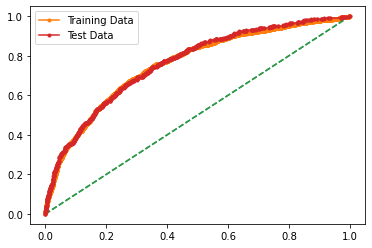

In [251]:
# AUC and ROC for the training data

# calculate AUC
MNB_train_auc = metrics.roc_auc_score(M_y_train,MNB_ytrain_proba[:,1])
print('AUC for the Training Data: %.3f' % MNB_train_auc)

#  calculate roc curve
MNB_fpr_train, MNB_tpr_train, thresholds = metrics.roc_curve(M_y_train,MNB_ytrain_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(MNB_fpr_train, MNB_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
MNB_test_auc = metrics.roc_auc_score(M_y_test,MNB_ytest_proba[:,1])
print('AUC for the Test Data: %.3f' % MNB_test_auc)

#  calculate roc curve
MNB_fpr_test, MNB_tpr_test, thresholds = metrics.roc_curve(M_y_test,MNB_ytest_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(MNB_fpr_test, MNB_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Decision Tree Classifier

In [252]:
from sklearn.tree import DecisionTreeClassifier

In [253]:
Mdt_model = DecisionTreeClassifier(criterion = 'gini' )

In [254]:
Mdt_model.fit(M_X_train, M_y_train)

DecisionTreeClassifier()

In [255]:
from sklearn import tree

M_CART_LABEL = ['No', 'Yes']
M_Tree_File = open('M_Tree_File.dot','w')
dot_data = tree.export_graphviz(Mdt_model, 
                                out_file=M_Tree_File, 
                                feature_names = list(M_X_train), 
                                class_names = list(M_CART_LABEL))

M_Tree_File.close()

In [256]:
print (pd.DataFrame(Mdt_model.feature_importances_, columns = ["Imp"], index = M_X_train.columns).sort_values('Imp',ascending=False))

                                              Imp
total_likes_on_outstation_checkin_given  0.249158
Yearly_avg_view_on_travel_page           0.179527
Yearly_avg_comment_on_travel_page        0.091698
week_since_last_outstation_checkin       0.073004
travelling_network_rating                0.070291
Daily_Avg_mins_spend_on_traveling_page   0.069955
yearly_avg_Outstation_checkins           0.054123
following_company_page_Yes               0.051728
Adult_flag                               0.045020
montly_avg_comment_on_company_page       0.037919
member_in_family                         0.019464
working_flag_Yes                         0.015548
Preferred_location_Other                 0.014520
Preferred_location_Entertainment         0.009822
Preferred_location_Business              0.007712
Preferred_location_Adventure             0.007260
Preferred_location_Cultural              0.003251
preferred_device                         0.000000


In [257]:
Mdtparam_grid = {
    'max_depth': [ 8, 9, 10],
    'min_samples_leaf': [10, 15, 20,],
    'min_samples_split': [30, 45, 60]
}

Mdt_model = DecisionTreeClassifier()

Mdt_grid_search = GridSearchCV(estimator = Mdt_model, param_grid = Mdtparam_grid, cv = 3)

In [258]:
Mdt_grid_search.fit(M_X_train, M_y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [30, 45, 60]})

In [259]:
Mdt_grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 30}

In [260]:
Mdt_best_grid = Mdt_grid_search.best_estimator_

In [261]:
Mreg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=30, random_state=1)
Mreg_dt_model.fit(M_X_train, M_y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=30,
                       random_state=1)

In [262]:
M_tree_regularized = open('M_tree_regularized.dot','w')
dot_data = tree.export_graphviz(Mreg_dt_model, out_file= M_tree_regularized , feature_names = list(M_X_train), class_names = list(M_CART_LABEL))

M_tree_regularized.close()

In [263]:
print (pd.DataFrame(Mreg_dt_model.feature_importances_, columns = ["Imp"], index = M_X_train.columns).sort_values('Imp',ascending=False))


                                              Imp
total_likes_on_outstation_checkin_given  0.267315
Yearly_avg_view_on_travel_page           0.193121
following_company_page_Yes               0.108616
Adult_flag                               0.094532
week_since_last_outstation_checkin       0.089971
Daily_Avg_mins_spend_on_traveling_page   0.078199
Yearly_avg_comment_on_travel_page        0.053747
yearly_avg_Outstation_checkins           0.052841
travelling_network_rating                0.032795
working_flag_Yes                         0.013218
montly_avg_comment_on_company_page       0.010498
Preferred_location_Entertainment         0.005001
Preferred_location_Business              0.000146
member_in_family                         0.000000
preferred_device                         0.000000
Preferred_location_Adventure             0.000000
Preferred_location_Cultural              0.000000
Preferred_location_Other                 0.000000


In [264]:
M_ytrain_predict = Mdt_best_grid.predict(M_X_train)
M_ytest_predict = Mdt_best_grid.predict(M_X_test)

In [265]:
Mdt_ytrain_proba = Mdt_best_grid.predict_proba(M_X_train)
Mdt_ytest_proba = Mdt_best_grid.predict_proba(M_X_test)

In [266]:
pd.DataFrame(Mdt_ytest_proba).head()

,0,1
0,0.938053,0.061947
1,0.932331,0.067669
2,0.823529,0.176471
3,0.938053,0.061947
4,0.954704,0.045296


In [267]:
Mdt_train_score = Mdt_best_grid.score(M_X_train, M_y_train)
print('Accuracy Score is ',Mdt_train_score)

Accuracy Score is  0.9110783261802575


In [268]:
Mdt_test_score = Mdt_best_grid.score(M_X_test, M_y_test) 
print('Accuracy Score is ',Mdt_test_score)

Accuracy Score is  0.8898623279098874


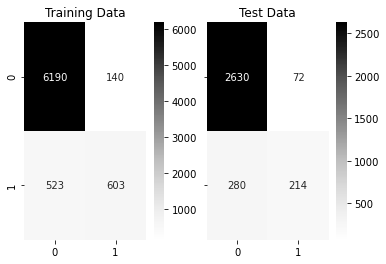

In [269]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(M_y_train,M_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(M_y_test,M_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [270]:
print('Classification Report of the training data:\n\n',classification_report(M_y_train, M_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.92      0.98      0.95      6330
           1       0.81      0.54      0.65      1126

    accuracy                           0.91      7456
   macro avg       0.87      0.76      0.80      7456
weighted avg       0.91      0.91      0.90      7456
 



In [271]:
print('Classification Report of the test data:\n\n',classification_report(M_y_test, M_ytest_predict), '\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.94      2702
           1       0.75      0.43      0.55       494

    accuracy                           0.89      3196
   macro avg       0.83      0.70      0.74      3196
weighted avg       0.88      0.89      0.88      3196
 



In [272]:
Mdt_metrics=classification_report(M_y_train,M_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(Mdt_metrics).transpose()
Mdt_train_f1=round(dfm.loc["1"][2],2)
Mdt_train_recall=round(dfm.loc["1"][1],2)
Mdt_train_precision=round(dfm.loc["1"][0],2)
print ('Mdt_train_precision ',Mdt_train_precision)
print ('Mdt_train_recall ',Mdt_train_recall)
print ('Mdt_train_f1 ',Mdt_train_f1)

Mdt_train_precision  0.81
Mdt_train_recall  0.54
Mdt_train_f1  0.65


In [273]:
Mdt_metrics=classification_report(M_y_test, M_ytest_predict,output_dict=True)
dfm=pd.DataFrame(Mdt_metrics).transpose()
Mdt_test_precision=round(dfm.loc["1"][0],2)
Mdt_test_recall=round(dfm.loc["1"][1],2)
Mdt_test_f1=round(dfm.loc["1"][2],2)
print ('Mdt_test_precision ',Mdt_test_precision)
print ('Mdt_test_recall ',Mdt_test_recall)
print ('Mdt_test_f1 ',Mdt_test_f1)

Mdt_test_precision  0.75
Mdt_test_recall  0.43
Mdt_test_f1  0.55


AUC for the Training Data: 0.914
AUC for the Test Data: 0.858


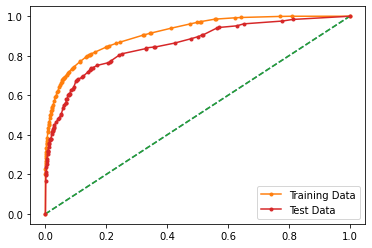

In [274]:
# AUC and ROC for the training data

# calculate AUC
Mdt_train_auc = metrics.roc_auc_score(M_y_train,Mdt_ytrain_proba[:,1])
print('AUC for the Training Data: %.3f' % Mdt_train_auc)

#  calculate roc curve
Mdt_fpr_train, Mdt_tpr_train, thresholds = metrics.roc_curve(M_y_train,Mdt_ytrain_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Mdt_fpr_train, Mdt_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
Mdt_test_auc = metrics.roc_auc_score(M_y_test,Mdt_ytest_proba[:,1])
print('AUC for the Test Data: %.3f' % Mdt_test_auc)

#  calculate roc curve
Mdt_fpr_test, Mdt_tpr_test, thresholds = metrics.roc_curve(M_y_test,Mdt_ytest_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Mdt_fpr_test, Mdt_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Random Forest Classifier

In [275]:
from sklearn.ensemble import RandomForestClassifier

In [276]:
rf_param_grid = {
    'max_depth': [8,9,10],
    'max_features': [10,15,20],
    'min_samples_leaf': [15,20,25],
    'min_samples_split': [20,30,40],
    'n_estimators': [100,150]
}

M_rfcl = RandomForestClassifier()

Mrf_grid_search = GridSearchCV(estimator = M_rfcl, param_grid = rf_param_grid, cv =3 )

In [277]:
Mrf_grid_search.fit(M_X_train, M_y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [10, 15, 20],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [100, 150]})

In [278]:
Mrf_grid_search.best_params_

{'max_depth': 10,
 'max_features': 15,
 'min_samples_leaf': 15,
 'min_samples_split': 30,
 'n_estimators': 100}

In [279]:
Mrf_best_grid = Mrf_grid_search.best_estimator_
Mrf_best_grid

RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=15,
                       min_samples_split=30)

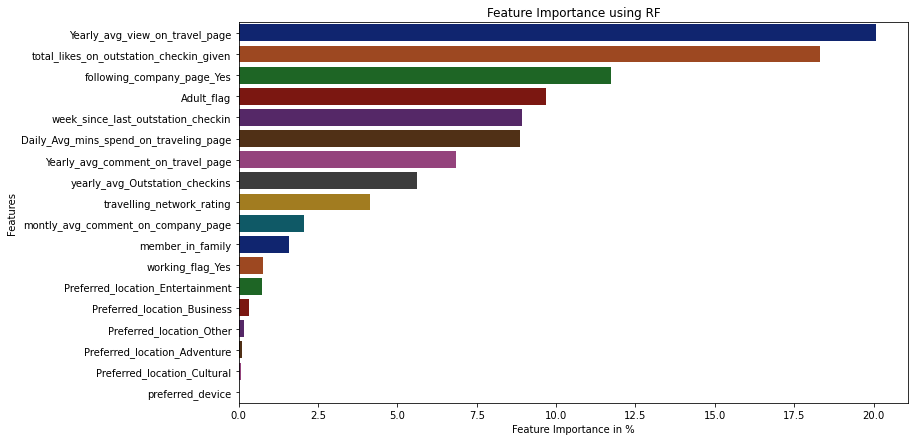

In [280]:
x=pd.DataFrame(Mrf_best_grid.feature_importances_*100,index=M_X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [281]:
Mrf_ytrain_predict = Mrf_best_grid.predict(M_X_train)
Mrf_ytest_predict = Mrf_best_grid.predict(M_X_test)

In [282]:
Mrf_ytrain_proba = Mrf_best_grid.predict_proba(M_X_train)
Mrf_ytest_proba = Mrf_best_grid.predict_proba(M_X_test)

In [283]:
pd.DataFrame(Mrf_ytest_proba).head()

,0,1
0,0.936751,0.063249
1,0.868988,0.131012
2,0.888125,0.111875
3,0.920567,0.079433
4,0.878692,0.121308


In [284]:
Mrf_ytest_proba = Mrf_ytest_proba[:, 1]

In [285]:
Mrf_ytrain_proba=Mrf_ytrain_proba[:, 1]

In [286]:
from numpy import argmax
from sklearn.metrics import precision_recall_curve

In [287]:
precision, recall, thresholds = precision_recall_curve(M_y_test, Mrf_ytest_proba)

In [288]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

In [289]:
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.269953, F-Score=0.685


In [290]:
threshold = 0.287274
preds = [1 if Mrf_ytest_proba[i]> threshold else 0 for i in range(len(Mrf_ytest_proba))]

In [291]:
threshold = 0.287274
preds_train = [1 if Mrf_ytrain_proba[i]> threshold else 0 for i in range(len(Mrf_ytrain_proba))]

In [292]:
Mrf_train_score = Mrf_best_grid.score(M_X_train, M_y_train)
print('Accuracy Score is ',Mrf_train_score)

Accuracy Score is  0.9081276824034334


In [293]:
Mrf_test_score = Mrf_best_grid.score(M_X_test, M_y_test) 
print('Accuracy Score is ',Mrf_test_score)

Accuracy Score is  0.8936170212765957


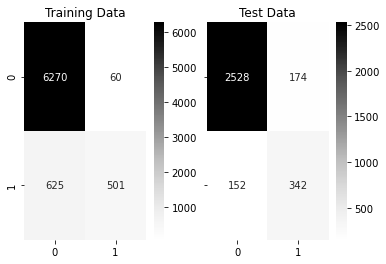

In [294]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(M_y_train,Mrf_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(M_y_test,preds)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [295]:
print('Classification Report of the training data:\n\n',classification_report(M_y_train, preds_train), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.96      0.95      0.96      6330
           1       0.73      0.79      0.76      1126

    accuracy                           0.92      7456
   macro avg       0.85      0.87      0.86      7456
weighted avg       0.93      0.92      0.93      7456
 



In [296]:
print('Classification Report of the test data:\n\n',classification_report(M_y_test, preds), '\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2702
           1       0.66      0.69      0.68       494

    accuracy                           0.90      3196
   macro avg       0.80      0.81      0.81      3196
weighted avg       0.90      0.90      0.90      3196
 



In [297]:
Mrf_metrics=classification_report(M_y_train,preds_train,output_dict=True)
dfm=pd.DataFrame(Mrf_metrics).transpose()
Mrf_train_f1=round(dfm.loc["1"][2],2)
Mrf_train_recall=round(dfm.loc["1"][1],2)
Mrf_train_precision=round(dfm.loc["1"][0],2)
print ('Mrf_train_precision ',Mrf_train_precision)
print ('Mrf_train_recall ',Mrf_train_recall)
print ('Mrf_train_f1 ',Mrf_train_f1)

Mrf_train_precision  0.73
Mrf_train_recall  0.79
Mrf_train_f1  0.76


In [298]:
Mrf_metrics=classification_report(M_y_test, preds,output_dict=True)
dfm=pd.DataFrame(Mrf_metrics).transpose()
Mrf_test_precision=round(dfm.loc["1"][0],2)
Mrf_test_recall=round(dfm.loc["1"][1],2)
Mrf_test_f1=round(dfm.loc["1"][2],2)
print ('Mrf_test_precision ',Mrf_test_precision)
print ('Mrf_test_recall ',Mrf_test_recall)
print ('Mrf_test_f1 ',Mrf_test_f1)

Mrf_test_precision  0.66
Mrf_test_recall  0.69
Mrf_test_f1  0.68


AUC for the Training Data: 0.868
AUC for the Test Data: 0.814


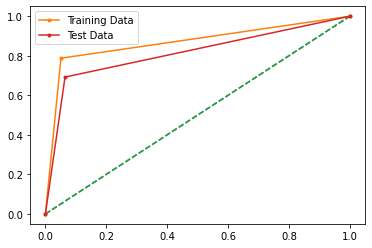

In [299]:
# AUC and ROC for the training data

# calculate AUC
Mrf_train_auc = metrics.roc_auc_score(M_y_train,preds_train)
print('AUC for the Training Data: %.3f' % Mrf_train_auc)

#  calculate roc curve
Mrf_fpr_train, Mrf_tpr_train, thresholds = metrics.roc_curve(M_y_train,preds_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Mrf_fpr_train, Mrf_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
Mrf_test_auc = metrics.roc_auc_score(M_y_test,preds)
print('AUC for the Test Data: %.3f' % Mrf_test_auc)

#  calculate roc curve
Mrf_fpr_test, Mrf_tpr_test, thresholds = metrics.roc_curve(M_y_test,preds)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Mrf_fpr_test, Mrf_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Random Classifier Base Model

In [300]:
rfcl = RandomForestClassifier()

In [301]:
rfcl.fit(M_X_train, M_y_train)

RandomForestClassifier()

In [302]:
Mrfcl_ytrain_predict = rfcl.predict(M_X_train)
Mrfcl_ytest_predict = rfcl.predict(M_X_test)

In [303]:
Mrfcl_ytrain_proba = rfcl.predict_proba(M_X_train)
Mrfcl_ytest_proba = rfcl.predict_proba(M_X_test)

In [304]:
pd.DataFrame(Mrfcl_ytest_proba).head()

,0,1
0,0.96,0.04
1,0.90,0.10
2,0.92,0.08
3,0.97,0.03
4,0.98,0.02


In [305]:
Mrfcl_ytest_proba = Mrfcl_ytest_proba[:, 1]

In [306]:
Mrfcl_ytrain_proba = Mrfcl_ytrain_proba[:, 1]

In [307]:
precision, recall, thresholds = precision_recall_curve(M_y_test, Mrfcl_ytest_proba)

In [308]:
fscore = (2 * precision * recall) / (precision + recall)

In [309]:
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.300000, F-Score=0.912


In [310]:
threshold = 0.310000
rfcl_preds = [1 if Mrfcl_ytest_proba[i]> threshold else 0 for i in range(len(Mrfcl_ytest_proba))]

In [311]:
threshold = 0.310000
rfcl_preds_train = [1 if Mrfcl_ytrain_proba[i]> threshold else 0 for i in range(len(Mrfcl_ytrain_proba))]

In [312]:
Mrfcl_train_score = rfcl.score(M_X_train, M_y_train)
print('Accuracy Score is ',Mrfcl_train_score)

Accuracy Score is  1.0


In [313]:
Mrfcl_test_score = rfcl.score(M_X_test, M_y_test) 
print('Accuracy Score is ',Mrfcl_test_score)

Accuracy Score is  0.954630788485607


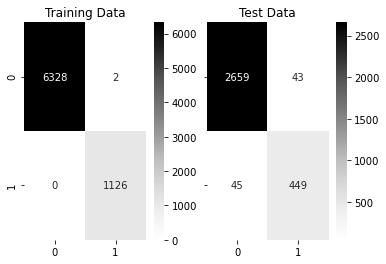

In [314]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(M_y_train,rfcl_preds_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(M_y_test,rfcl_preds)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [315]:
print('Classification Report of the training data:\n\n',classification_report(M_y_train, rfcl_preds_train), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456
 



In [316]:
print('Classification Report of the test data:\n\n',classification_report(M_y_test, rfcl_preds), '\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2702
           1       0.91      0.91      0.91       494

    accuracy                           0.97      3196
   macro avg       0.95      0.95      0.95      3196
weighted avg       0.97      0.97      0.97      3196
 



In [317]:
Mrfcl_metrics=classification_report(M_y_train,rfcl_preds_train,output_dict=True)
dfm=pd.DataFrame(Mrfcl_metrics).transpose()
Mrfcl_train_f1=round(dfm.loc["1"][2],2)
Mrfcl_train_recall=round(dfm.loc["1"][1],2)
Mrfcl_train_precision=round(dfm.loc["1"][0],2)
print ('Mrfcl_train_precision ',Mrfcl_train_precision)
print ('Mrfcl_train_recall ',Mrfcl_train_recall)
print ('Mrfcl_train_f1 ',Mrfcl_train_f1)

Mrfcl_train_precision  1.0
Mrfcl_train_recall  1.0
Mrfcl_train_f1  1.0


In [318]:
Mrfcl_metrics=classification_report(M_y_test, rfcl_preds,output_dict=True)
dfm=pd.DataFrame(Mrfcl_metrics).transpose()
Mrfcl_test_precision=round(dfm.loc["1"][0],2)
Mrfcl_test_recall=round(dfm.loc["1"][1],2)
Mrfcl_test_f1=round(dfm.loc["1"][2],2)
print ('Mrfcl_test_precision ',Mrfcl_test_precision)
print ('Mrfcl_test_recall ',Mrfcl_test_recall)
print ('Mrfcl_test_f1 ',Mrfcl_test_f1)

Mrfcl_test_precision  0.91
Mrfcl_test_recall  0.91
Mrfcl_test_f1  0.91


AUC for the Training Data: 1.000
AUC for the Test Data: 0.946


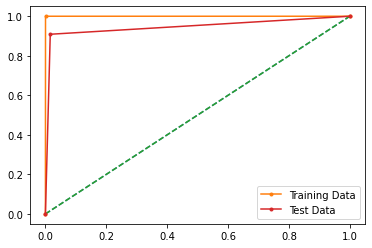

In [319]:
# AUC and ROC for the training data

# calculate AUC
Mrfcl_train_auc = metrics.roc_auc_score(M_y_train,rfcl_preds_train)
print('AUC for the Training Data: %.3f' % Mrfcl_train_auc)

#  calculate roc curve
Mrfcl_fpr_train, Mrfcl_tpr_train, thresholds = metrics.roc_curve(M_y_train,rfcl_preds_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Mrfcl_fpr_train, Mrfcl_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
Mrfcl_test_auc = metrics.roc_auc_score(M_y_test,rfcl_preds)
print('AUC for the Test Data: %.3f' % Mrfcl_test_auc)

#  calculate roc curve
Mrfcl_fpr_test, Mrfcl_tpr_test, thresholds = metrics.roc_curve(M_y_test,rfcl_preds)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Mrfcl_fpr_test, Mrfcl_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

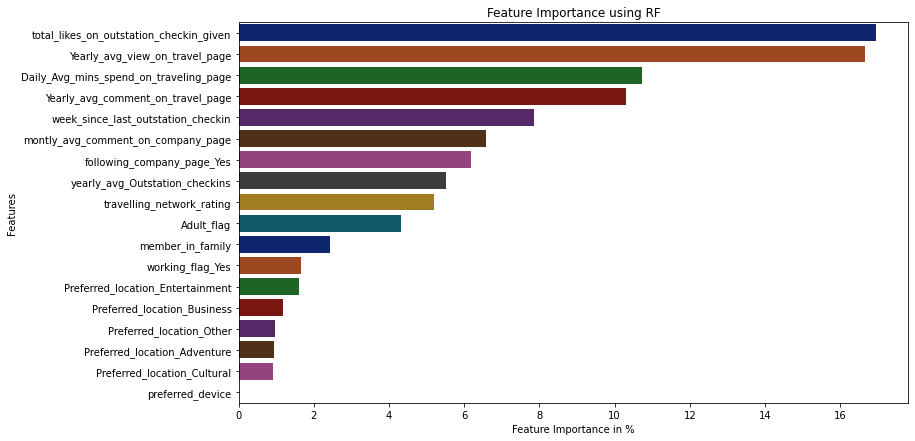

In [320]:
x=pd.DataFrame(rfcl.feature_importances_*100,index=M_X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

#### MLP Classifier (Artificial Neural Network)

In [321]:
from sklearn.neural_network import MLPClassifier

#### ANN Base Model

In [322]:
clf=MLPClassifier()

In [323]:
clf.fit(M_X_train, M_y_train)

MLPClassifier()

In [324]:
clf_ytrain_pred = clf.predict(M_X_train)
clf_ytest_pred = clf.predict(M_X_test)

In [325]:
clf_ytrain_proba = clf.predict_proba(M_X_train)
clf_ytest_proba = clf.predict_proba(M_X_test)

In [326]:
pd.DataFrame(clf_ytest_proba).head()

,0,1
0,0.965569,0.034431
1,0.999999,0.000001
2,0.769886,0.230114
3,0.936493,0.063507
4,0.996626,0.003374


In [327]:
clf_ytest_proba = clf_ytest_proba[:, 1]

In [328]:
clf_ytrain_proba = clf_ytrain_proba[:, 1]

In [329]:
precision, recall, thresholds = precision_recall_curve(M_y_test, clf_ytest_proba)

In [330]:
fscore = (2 * precision * recall) / (precision + recall)

In [331]:
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.376048, F-Score=0.703


In [332]:
threshold = 0.342371
clf_preds = [1 if clf_ytest_proba[i]> threshold else 0 for i in range(len(clf_ytest_proba))]

In [333]:
threshold = 0.342371
clf_preds_train = [1 if clf_ytrain_proba[i]> threshold else 0 for i in range(len(clf_ytrain_proba))]

In [334]:
clf_train_score = clf.score(M_X_train, M_y_train)
print('Accuracy Score is ',clf_train_score)

Accuracy Score is  0.9428648068669528


In [335]:
clf_test_score = clf.score(M_X_test, M_y_test) 
print('Accuracy Score is ',clf_test_score)

Accuracy Score is  0.9105131414267835


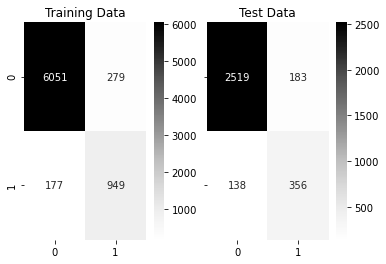

In [336]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(M_y_train,clf_preds_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(M_y_test,clf_preds)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [337]:
print('Classification Report of the training data:\n\n',classification_report(M_y_train, clf_preds_train), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.97      0.96      0.96      6330
           1       0.77      0.84      0.81      1126

    accuracy                           0.94      7456
   macro avg       0.87      0.90      0.88      7456
weighted avg       0.94      0.94      0.94      7456
 



In [338]:
print('Classification Report of the test data:\n\n',classification_report(M_y_test, clf_preds), '\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2702
           1       0.66      0.72      0.69       494

    accuracy                           0.90      3196
   macro avg       0.80      0.83      0.81      3196
weighted avg       0.90      0.90      0.90      3196
 



In [339]:
clf_metrics=classification_report(M_y_train,clf_preds_train,output_dict=True)
dfm=pd.DataFrame(clf_metrics).transpose()
clf_train_f1=round(dfm.loc["1"][2],2)
clf_train_recall=round(dfm.loc["1"][1],2)
clf_train_precision=round(dfm.loc["1"][0],2)
print ('clf_train_precision ',clf_train_precision)
print ('clf_train_recall ',clf_train_recall)
print ('clf_train_f1 ',clf_train_f1)

clf_train_precision  0.77
clf_train_recall  0.84
clf_train_f1  0.81


In [340]:
clf_metrics=classification_report(M_y_test, clf_preds,output_dict=True)
dfm=pd.DataFrame(clf_metrics).transpose()
clf_test_precision=round(dfm.loc["1"][0],2)
clf_test_recall=round(dfm.loc["1"][1],2)
clf_test_f1=round(dfm.loc["1"][2],2)
print ('clf_test_precision ',clf_test_precision)
print ('clf_test_recall ',clf_test_recall)
print ('clf_test_f1 ',clf_test_f1)

clf_test_precision  0.66
clf_test_recall  0.72
clf_test_f1  0.69


AUC for the Training Data: 0.899
AUC for the Test Data: 0.826


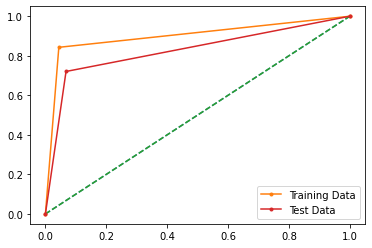

In [341]:
# AUC and ROC for the training data

# calculate AUC
clf_train_auc = metrics.roc_auc_score(M_y_train,clf_preds_train)
print('AUC for the Training Data: %.3f' % clf_train_auc)

#  calculate roc curve
clf_fpr_train, clf_tpr_train, thresholds = metrics.roc_curve(M_y_train,clf_preds_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(clf_fpr_train, clf_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
clf_test_auc = metrics.roc_auc_score(M_y_test,clf_preds)
print('AUC for the Test Data: %.3f' % clf_test_auc)

#  calculate roc curve
clf_fpr_test, clf_tpr_test, thresholds = metrics.roc_curve(M_y_test,clf_preds)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(clf_fpr_test, clf_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Support Vector Machine Model

In [342]:
from sklearn.svm import SVR

In [343]:
svm =SVR(kernel='rbf')

In [344]:
svm_param_grid = {'C': [ 1, 10, 100],
              'gamma': [1, 0.1, 0.01]}

M_grid = GridSearchCV(estimator = svm, param_grid=svm_param_grid, refit = True, verbose = 3)

In [345]:
M_grid.fit(M_X_train, M_y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...................................C=1, gamma=1; total time=   4.2s
[CV 2/5] END ...................................C=1, gamma=1; total time=   4.1s
[CV 3/5] END ...................................C=1, gamma=1; total time=   4.1s
[CV 4/5] END ...................................C=1, gamma=1; total time=   4.0s
[CV 5/5] END ...................................C=1, gamma=1; total time=   4.0s
[CV 1/5] END .................................C=1, gamma=0.1; total time=   2.3s
[CV 2/5] END .................................C=1, gamma=0.1; total time=   2.3s
[CV 3/5] END .................................C=1, gamma=0.1; total time=   2.4s
[CV 4/5] END .................................C=1, gamma=0.1; total time=   2.3s
[CV 5/5] END .................................C=1, gamma=0.1; total time=   2.3s
[CV 1/5] END ................................C=1, gamma=0.01; total time=   1.9s
[CV 2/5] END ................................C=1,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01]},
             verbose=3)

In [346]:
M_grid.best_params_

{'C': 10, 'gamma': 1}

In [347]:
Msvm_best_grid = M_grid.best_estimator_
Msvm_best_grid

SVR(C=10, gamma=1)

In [348]:
svm_ytrain_pred = Msvm_best_grid.predict(M_X_train)
svm_ytest_pred = Msvm_best_grid.predict(M_X_test)

In [349]:
svm_train_score = Msvm_best_grid.score(M_X_train, M_y_train)
print('Accuracy Score is ',svm_train_score)

Accuracy Score is  0.9292375791279323


In [350]:
svm_test_score = Msvm_best_grid.score(M_X_test, M_y_test) 
print('Accuracy Score is ',svm_test_score)

Accuracy Score is  0.7327040362644455


#### Bagging (RandomForest as base estimator)

In [351]:
from sklearn.ensemble import BaggingClassifier

In [352]:
M_bgcl = BaggingClassifier(base_estimator=Mrf_best_grid, n_estimators=150,random_state=1)

M_bgcl = M_bgcl.fit(M_X_train, M_y_train)

In [353]:
Mbgcl_ytrain_predict = M_bgcl.predict(M_X_train)
Mbgcl_ytest_predict = M_bgcl.predict(M_X_test)

In [354]:
Mbgcl_ytest_prob=M_bgcl.predict_proba(M_X_test)
Mbgcl_ytrain_prob=M_bgcl.predict_proba(M_X_train)
pd.DataFrame(Mbgcl_ytest_prob).head()

,0,1
0,0.949307,0.050693
1,0.858368,0.141632
2,0.879708,0.120292
3,0.905901,0.094099
4,0.893308,0.106692


In [355]:
Mbgcl_train_score = M_bgcl.score(M_X_train, M_y_train)
print('Accuracy Score is ',Mbgcl_train_score)

Accuracy Score is  0.895788626609442


In [356]:
Mbgcl_test_score = M_bgcl.score(M_X_test, M_y_test)
print('Accuracy Score is ',Mbgcl_test_score)

Accuracy Score is  0.8807884856070087


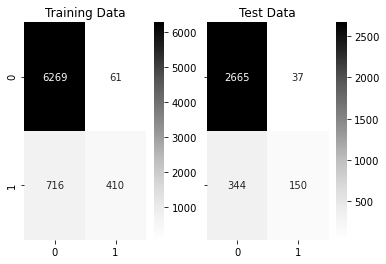

In [357]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(M_y_train,Mbgcl_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(M_y_test,Mbgcl_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [358]:
print('Classification Report of the training data:\n\n',classification_report(M_y_train, Mbgcl_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.99      0.94      6330
           1       0.87      0.36      0.51      1126

    accuracy                           0.90      7456
   macro avg       0.88      0.68      0.73      7456
weighted avg       0.89      0.90      0.88      7456
 



In [359]:
print('Classification Report of the test data:\n\n',classification_report(M_y_test,Mbgcl_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.99      0.93      2702
           1       0.80      0.30      0.44       494

    accuracy                           0.88      3196
   macro avg       0.84      0.64      0.69      3196
weighted avg       0.87      0.88      0.86      3196
 



In [360]:
Mbgcl_metrics=classification_report(M_y_train,Mbgcl_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(Mbgcl_metrics).transpose()
Mbgcl_train_f1=round(dfm.loc["1"][2],2)
Mbgcl_train_recall=round(dfm.loc["1"][1],2)
Mbgcl_train_precision=round(dfm.loc["1"][0],2)
print ('Mbgcl_train_precision ',Mbgcl_train_precision)
print ('Mbgcl_train_recall ',Mbgcl_train_recall)
print ('Mbgcl_train_f1 ',Mbgcl_train_f1)

Mbgcl_train_precision  0.87
Mbgcl_train_recall  0.36
Mbgcl_train_f1  0.51


In [361]:
Mbgcl_metrics=classification_report(M_y_test, Mbgcl_ytest_predict,output_dict=True)
dfm=pd.DataFrame(Mbgcl_metrics).transpose()
Mbgcl_test_precision=round(dfm.loc["1"][0],2)
Mbgcl_test_recall=round(dfm.loc["1"][1],2)
Mbgcl_test_f1=round(dfm.loc["1"][2],2)
print ('Mbgcl_test_precision ',Mbgcl_test_precision)
print ('Mbgcl_test_recall ',Mbgcl_test_recall)
print ('Mbgcl_test_f1 ',Mbgcl_test_f1)

Mbgcl_test_precision  0.8
Mbgcl_test_recall  0.3
Mbgcl_test_f1  0.44


AUC for the Training Data: 0.946
AUC for the Test Data: 0.913


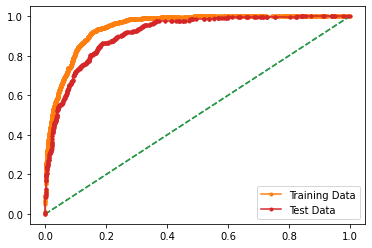

In [362]:
# AUC and ROC for the training data

# calculate AUC
Mbgcl_train_auc = metrics.roc_auc_score(M_y_train,Mbgcl_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % Mbgcl_train_auc)

#  calculate roc curve
Mbgcl_fpr_train, Mbgcl_tpr_train, thresholds = metrics.roc_curve(M_y_train,Mbgcl_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Mbgcl_fpr_train, Mbgcl_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
Mbgcl_test_auc = metrics.roc_auc_score(M_y_test,Mbgcl_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % Mbgcl_test_auc)

#  calculate roc curve
Mbgcl_fpr_test, Mbgcl_tpr_test, thresholds = metrics.roc_curve(M_y_test,Mbgcl_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Mbgcl_fpr_test, Mbgcl_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Ada Boost

In [363]:
from sklearn.ensemble import AdaBoostClassifier

In [364]:
M_ADB_model = AdaBoostClassifier(n_estimators=150,random_state=1)
M_ADB_model.fit(M_X_train, M_y_train)

AdaBoostClassifier(n_estimators=150, random_state=1)

In [365]:
MADB_ytrain_predict = M_ADB_model.predict(M_X_train)
MADB_ytest_predict = M_ADB_model.predict(M_X_test)

In [366]:
MADB_ytest_prob=M_ADB_model.predict_proba(M_X_test)
MADB_ytrain_prob=M_ADB_model.predict_proba(M_X_train)
pd.DataFrame(MADB_ytest_prob).head()

,0,1
0,0.504529,0.495471
1,0.502840,0.497160
2,0.504396,0.495604
3,0.504406,0.495594
4,0.503917,0.496083


In [367]:
MADB_train_score = M_ADB_model.score(M_X_train, M_y_train)
print('Accuracy Score for Training is ',MADB_train_score)

Accuracy Score for Training is  0.876475321888412


In [368]:
MADB_test_score = M_ADB_model.score(M_X_test, M_y_test)
print('Accuracy Score for Test Data is ',MADB_test_score)

Accuracy Score for Test Data is  0.8695244055068836


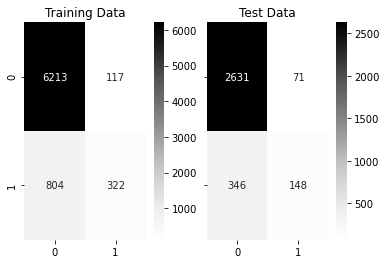

In [369]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(M_y_train,MADB_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(M_y_test,MADB_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [370]:
print('Classification Report of the training data:\n\n',classification_report(M_y_train, MADB_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.98      0.93      6330
           1       0.73      0.29      0.41      1126

    accuracy                           0.88      7456
   macro avg       0.81      0.63      0.67      7456
weighted avg       0.86      0.88      0.85      7456
 



In [371]:
print('Classification Report of the test data:\n\n',classification_report(M_y_test,MADB_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2702
           1       0.68      0.30      0.42       494

    accuracy                           0.87      3196
   macro avg       0.78      0.64      0.67      3196
weighted avg       0.85      0.87      0.85      3196
 



In [372]:
MADB_metrics=classification_report(M_y_train,MADB_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(MADB_metrics).transpose()
MADB_train_f1=round(dfm.loc["1"][2],2)
MADB_train_recall=round(dfm.loc["1"][1],2)
MADB_train_precision=round(dfm.loc["1"][0],2)
print ('MADB_train_precision ',MADB_train_precision)
print ('MADB_train_recall ',MADB_train_recall)
print ('MADB_train_f1 ',MADB_train_f1)

MADB_train_precision  0.73
MADB_train_recall  0.29
MADB_train_f1  0.41


In [373]:
MADB_metrics=classification_report(M_y_test, MADB_ytest_predict,output_dict=True)
dfm=pd.DataFrame(MADB_metrics).transpose()
MADB_test_precision=round(dfm.loc["1"][0],2)
MADB_test_recall=round(dfm.loc["1"][1],2)
MADB_test_f1=round(dfm.loc["1"][2],2)
print ('MADB_test_precision ',MADB_test_precision)
print ('MADB_test_recall ',MADB_test_recall)
print ('MADB_test_f1 ',MADB_test_f1)

MADB_test_precision  0.68
MADB_test_recall  0.3
MADB_test_f1  0.42


AUC for the Training Data: 0.851
AUC for the Test Data: 0.832


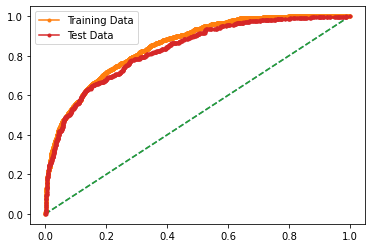

In [374]:
# AUC and ROC for the training data

# calculate AUC
MADB_train_auc = metrics.roc_auc_score(M_y_train,MADB_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % MADB_train_auc)

#  calculate roc curve
MADB_fpr_train, MADB_tpr_train, thresholds = metrics.roc_curve(M_y_train,MADB_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(MADB_fpr_train, MADB_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
MADB_test_auc = metrics.roc_auc_score(M_y_test,MADB_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % MADB_test_auc)

#  calculate roc curve
MADB_fpr_test, MADB_tpr_test, thresholds = metrics.roc_curve(M_y_test,MADB_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(MADB_fpr_test, MADB_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Gradient Boosting

In [375]:
from sklearn.ensemble import GradientBoostingClassifier
M_gbcl = GradientBoostingClassifier(n_estimators = 100,random_state=1)
M_gbcl = M_gbcl.fit(M_X_train, M_y_train)

In [376]:
Mgbcl_ytrain_predict = M_gbcl.predict(M_X_train)
Mgbcl_ytest_predict = M_gbcl.predict(M_X_test)

In [377]:
Mgbcl_ytest_prob=M_gbcl.predict_proba(M_X_test)
Mgbcl_ytrain_prob=M_gbcl.predict_proba(M_X_train)
pd.DataFrame(Mgbcl_ytest_prob).head()

,0,1
0,0.927696,0.072304
1,0.904895,0.095105
2,0.932555,0.067445
3,0.933338,0.066662
4,0.934872,0.065128


In [378]:
Mgbcl_train_score = M_gbcl.score(M_X_train, M_y_train)
print('Accuracy Score is ',Mgbcl_train_score)

Accuracy Score is  0.9031652360515021


In [379]:
Mgbcl_test_score = M_gbcl.score(M_X_test, M_y_test)
print('Accuracy Score is ',Mgbcl_test_score)

Accuracy Score is  0.890488110137672


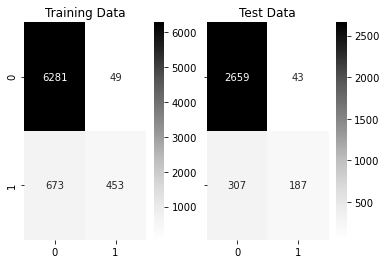

In [380]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(M_y_train,Mgbcl_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(M_y_test,Mgbcl_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [381]:
print('Classification Report of the training data:\n\n',classification_report(M_y_train, Mgbcl_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.99      0.95      6330
           1       0.90      0.40      0.56      1126

    accuracy                           0.90      7456
   macro avg       0.90      0.70      0.75      7456
weighted avg       0.90      0.90      0.89      7456
 



In [382]:
print('Classification Report of the test data:\n\n',classification_report(M_y_test,Mgbcl_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2702
           1       0.81      0.38      0.52       494

    accuracy                           0.89      3196
   macro avg       0.85      0.68      0.73      3196
weighted avg       0.88      0.89      0.87      3196
 



In [383]:
Mgbcl_metrics=classification_report(M_y_train,Mgbcl_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(Mgbcl_metrics).transpose()
Mgbcl_train_f1=round(dfm.loc["1"][2],2)
Mgbcl_train_recall=round(dfm.loc["1"][1],2)
Mgbcl_train_precision=round(dfm.loc["1"][0],2)
print ('Mgbcl_train_precision ',Mgbcl_train_precision)
print ('Mgbcl_train_recall ',Mgbcl_train_recall)
print ('Mgbcl_train_f1 ',Mgbcl_train_f1)

Mgbcl_train_precision  0.9
Mgbcl_train_recall  0.4
Mgbcl_train_f1  0.56


In [384]:
Mgbcl_metrics=classification_report(M_y_test, Mgbcl_ytest_predict,output_dict=True)
dfm=pd.DataFrame(Mgbcl_metrics).transpose()
Mgbcl_test_precision=round(dfm.loc["1"][0],2)
Mgbcl_test_recall=round(dfm.loc["1"][1],2)
Mgbcl_test_f1=round(dfm.loc["1"][2],2)
print ('Mgbcl_test_precision ',Mgbcl_test_precision)
print ('Mgbcl_test_recall ',Mgbcl_test_recall)
print ('Mgbcl_test_f1 ',Mgbcl_test_f1)

Mgbcl_test_precision  0.81
Mgbcl_test_recall  0.38
Mgbcl_test_f1  0.52


AUC for the Training Data: 0.902
AUC for the Test Data: 0.876


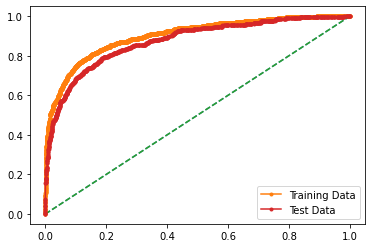

In [385]:
# AUC and ROC for the training data

# calculate AUC
Mgbcl_train_auc = metrics.roc_auc_score(M_y_train,Mgbcl_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % Mgbcl_train_auc)

#  calculate roc curve
Mgbcl_fpr_train, Mgbcl_tpr_train, thresholds = metrics.roc_curve(M_y_train,Mgbcl_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Mgbcl_fpr_train, Mgbcl_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
Mgbcl_test_auc = metrics.roc_auc_score(M_y_test,Mgbcl_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % Mgbcl_test_auc)

#  calculate roc curve
Mgbcl_fpr_test, Mgbcl_tpr_test, thresholds = metrics.roc_curve(M_y_test,Mgbcl_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Mgbcl_fpr_test, Mgbcl_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Model Comparison

In [386]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[MLR_train_score,MLR_train_auc,MLR_train_recall,MLR_train_precision,MLR_train_f1],
        'LR Test':[MLR_test_score,MLR_test_auc,MLR_test_recall,MLR_test_precision,MLR_test_f1],
          'TLR Train':[TMLR_train_score,TMLR_train_auc,TMLR_train_recall,TMLR_train_precision,TMLR_train_f1],
        'TLR Test':[TMLR_test_score,TMLR_test_auc,TMLR_test_recall,TMLR_test_precision,TMLR_test_f1],           
       'LDA Train':[MLDA_train_score,MLDA_train_auc,MLDA_train_recall,MLDA_train_precision,MLDA_train_f1],
        'LDA Test':[MLDA_test_score,MLDA_test_auc,MLDA_test_recall,MLDA_test_precision,MLDA_test_f1],
       'DT Train':[Mdt_train_score,Mdt_train_auc,Mdt_train_recall,Mdt_train_precision,Mdt_train_f1],
        'DT Test':[Mdt_test_score,Mdt_test_auc,Mdt_test_recall,Mdt_test_precision,Mdt_test_f1],
         'NB Train':[MNB_train_score,MNB_train_auc,MNB_train_recall,MNB_train_precision,MNB_train_f1],
        'NB Test':[MNB_test_score,MNB_test_auc,MNB_test_recall,MNB_test_precision,MNB_test_f1],
          'ANN Train':[clf_train_score,clf_train_auc,clf_train_recall,clf_train_precision,clf_train_f1],
        'ANN Test':[clf_test_score,clf_test_auc,clf_test_recall,clf_test_precision,clf_test_f1],           
         'RF Train':[Mrfcl_train_score,Mrfcl_train_auc,Mrfcl_train_recall,Mrfcl_train_precision,Mrfcl_train_f1],
        'RF Test':[Mrfcl_test_score,Mrfcl_test_auc,Mrfcl_test_recall,Mrfcl_test_precision,Mrfcl_test_f1],
        'TRF Train':[Mrf_train_score,Mrf_train_auc,Mrf_train_recall,Mrf_train_precision,Mrf_train_f1],
        'TRF Test':[Mrf_test_score,Mrf_test_auc,Mrf_test_recall,Mrf_test_precision,Mrf_test_f1],
        'BAGGIBG Train':[Mbgcl_train_score,Mbgcl_train_auc,Mbgcl_train_recall,Mbgcl_train_precision,Mbgcl_train_f1],
        'BAGGIBG Test':[Mbgcl_test_score,Mbgcl_test_auc,Mbgcl_test_recall,Mbgcl_test_precision,Mbgcl_test_f1],
         'ADA Train':[MADB_train_score,MADB_train_auc,MADB_train_recall,MADB_train_precision,MADB_train_f1],
        'ADA Test':[MADB_test_score,MADB_test_auc,MADB_test_recall,MADB_test_precision,MADB_test_f1],
         'GB Train':[Mgbcl_train_score,Mgbcl_train_auc,Mgbcl_train_recall,Mgbcl_train_precision,Mgbcl_train_f1],
        'GB Test':[Mgbcl_test_score,Mgbcl_test_auc,Mgbcl_test_recall,Mgbcl_test_precision,Mgbcl_test_f1],
                    },index=index)
pd.set_option('display.max_columns', None)
round(data,2)


,LR Train,LR Test,TLR Train,TLR Test,LDA Train,LDA Test,DT Train,DT Test,NB Train,NB Test,ANN Train,ANN Test,RF Train,RF Test,TRF Train,TRF Test,BAGGIBG Train,BAGGIBG Test,ADA Train,ADA Test,GB Train,GB Test
Accuracy,0.87,0.87,0.71,0.70,0.87,0.87,0.91,0.89,0.85,0.85,0.94,0.91,1.0,0.95,0.91,0.89,0.90,0.88,0.88,0.87,0.90,0.89
AUC,0.78,0.79,0.78,0.79,0.78,0.79,0.91,0.86,0.76,0.76,0.90,0.83,1.0,0.95,0.87,0.81,0.95,0.91,0.85,0.83,0.90,0.88
Recall,0.20,0.23,0.72,0.73,0.23,0.26,0.54,0.43,0.26,0.29,0.84,0.72,1.0,0.91,0.79,0.69,0.36,0.30,0.29,0.30,0.40,0.38
Precision,0.71,0.74,0.31,0.31,0.67,0.69,0.81,0.75,0.52,0.53,0.77,0.66,1.0,0.91,0.73,0.66,0.87,0.80,0.73,0.68,0.90,0.81
F1 Score,0.32,0.35,0.43,0.43,0.34,0.38,0.65,0.55,0.35,0.37,0.81,0.69,1.0,0.91,0.76,0.68,0.51,0.44,0.41,0.42,0.56,0.52


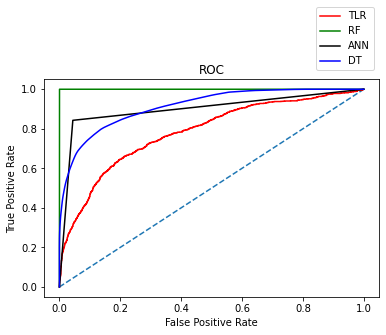

In [387]:
#ROC Curve for the 4 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(TMLR_fpr_train, TMLR_tpr_train,color='red',label="TLR")
plt.plot(Mrfcl_fpr_train,Mrfcl_tpr_train,color='green',label="RF")
plt.plot(clf_fpr_train,clf_tpr_train,color='black',label="ANN")
plt.plot(Mdt_fpr_train,Mdt_tpr_train,color='blue',label="DT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

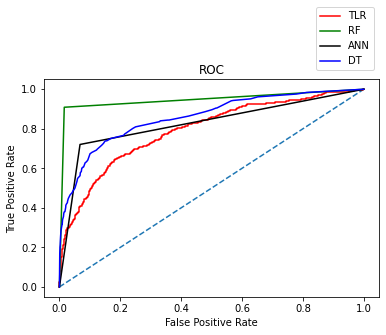

In [388]:
#ROC Curve for the 4 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(TMLR_fpr_test, TMLR_tpr_test,color='red',label="TLR")
plt.plot(Mrfcl_fpr_test,Mrfcl_tpr_test,color='green',label="RF")
plt.plot(clf_fpr_test,clf_tpr_test,color='black',label="ANN")
plt.plot(Mdt_fpr_test,Mdt_tpr_test,color='blue',label="DT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Model Building on Laptop Dataset

#### Logistic Regression Model on Laptop Dataset

In [389]:
LR_model = LogisticRegression()
LR_model.fit(L_X_train, L_y_train)

LogisticRegression()

In [390]:
L_ytrain_pred = LR_model.predict(L_X_train)
L_ytest_pred = LR_model.predict(L_X_test)

In [391]:
L_ytrain_proba = LR_model.predict_proba(L_X_train)
L_ytest_proba = LR_model.predict_proba(L_X_test)
pd.DataFrame(L_ytest_proba).head()

,0,1
0,0.978749,0.021251
1,0.933470,0.066530
2,0.862383,0.137617
3,0.927910,0.072090
4,0.701603,0.298397


In [392]:
#Accuracy on Training Dataset
LR_train_score = LR_model.score(L_X_train, L_y_train)
print('Accuracy Score is ',LR_train_score)

Accuracy Score is  0.8374193548387097


In [393]:
# Accuracy - Test Data
LR_test_score = LR_model.score(L_X_test, L_y_test)
print('Accuracy Score is ',LR_test_score)

Accuracy Score is  0.8198198198198198


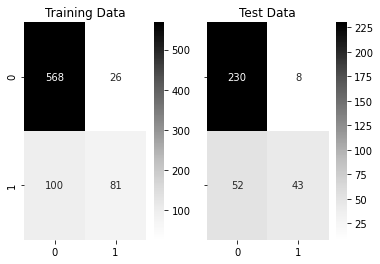

In [394]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(L_y_train,L_ytrain_pred)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(L_y_test,L_ytest_pred)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [395]:
print('Classification Report of the training data:\n\n',classification_report(L_y_train, L_ytrain_pred), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.96      0.90       594
           1       0.76      0.45      0.56       181

    accuracy                           0.84       775
   macro avg       0.80      0.70      0.73       775
weighted avg       0.83      0.84      0.82       775
 



In [396]:
print('Classification Report of the test data:\n\n',classification_report(L_y_test,L_ytest_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.82      0.97      0.88       238
           1       0.84      0.45      0.59        95

    accuracy                           0.82       333
   macro avg       0.83      0.71      0.74       333
weighted avg       0.82      0.82      0.80       333
 



AUC for the Training Data: 0.811
AUC for the Test Data: 0.864


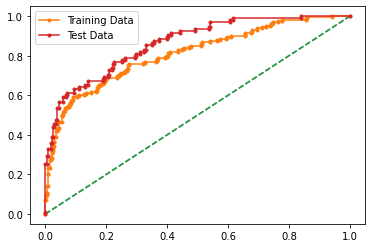

In [397]:
# AUC and ROC for the training data
# calculate AUC
LR_train_auc = metrics.roc_auc_score(L_y_train,L_ytrain_proba[:,1])
print('AUC for the Training Data: %.3f' % LR_train_auc)

#  calculate roc curve
LR_fpr_train, LR_tpr_train, thresholds = metrics.roc_curve(L_y_train,L_ytrain_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_fpr_train, LR_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
LR_test_auc = metrics.roc_auc_score(L_y_test,L_ytest_proba[:,1])
print('AUC for the Test Data: %.3f' % LR_test_auc)

#  calculate roc curve
LR_fpr_test, LR_tpr_test, thresholds = metrics.roc_curve(L_y_test,L_ytest_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_fpr_test, LR_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [398]:
LR_metrics=classification_report(L_y_train,L_ytrain_pred,output_dict=True)
dfm=pd.DataFrame(LR_metrics).transpose()
LR_train_f1=round(dfm.loc["1"][2],2)
LR_train_recall=round(dfm.loc["1"][1],2)
LR_train_precision=round(dfm.loc["1"][0],2)
print ('LR_train_precision ',LR_train_precision)
print ('LR_train_recall ',LR_train_recall)
print ('LR_train_f1 ',LR_train_f1)

LR_train_precision  0.76
LR_train_recall  0.45
LR_train_f1  0.56


In [399]:
LR_metrics=classification_report(L_y_test, L_ytest_pred,output_dict=True)
dfm=pd.DataFrame(LR_metrics).transpose()
LR_test_precision=round(dfm.loc["1"][0],2)
LR_test_recall=round(dfm.loc["1"][1],2)
LR_test_f1=round(dfm.loc["1"][2],2)
print ('LR_test_precision ',LR_test_precision)
print ('LR_test_recall ',LR_test_recall)
print ('LR_test_f1 ',LR_test_f1)

LR_test_precision  0.84
LR_test_recall  0.45
LR_test_f1  0.59


#### Logistic Regression Model Tunning

In [400]:
lr_param_grid = {
    'max_iter': [20, 50, 100, 200, 500],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced']                                    
}

In [401]:
L_logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1),
                             param_grid=lr_param_grid, verbose=1, 
                             cv=3, 
                             n_jobs=1)
L_logModel_grid.fit(L_X_train, L_y_train)
print(L_logModel_grid.best_estimator_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=1,
                   solver='newton-cg')


In [402]:
TLR_model = L_logModel_grid.best_estimator_

In [403]:
#Prediction on the Training Set & Test Data Set
TLR_ytrain_predict = TLR_model.predict(L_X_train)
TLR_ytest_predict = TLR_model.predict(L_X_test)

In [404]:
# Getting the probabilites on the test set
TLR_ytest_prob=TLR_model.predict_proba(L_X_test)
TLR_ytrain_prob=TLR_model.predict_proba(L_X_train)
pd.DataFrame(TLR_ytest_prob).head()

,0,1
0,0.934918,0.065082
1,0.791837,0.208163
2,0.663911,0.336089
3,0.788104,0.211896
4,0.486443,0.513557


In [405]:
# Accuracy - Training Data
TLR_train_score = TLR_model.score(L_X_train, L_y_train)
print('Accuracy Score is ',TLR_train_score)

Accuracy Score is  0.7225806451612903


In [406]:
# Accuracy - Test Data
TLR_test_score = TLR_model.score(L_X_test, L_y_test)
print('Accuracy Score is ',TLR_test_score)

Accuracy Score is  0.7537537537537538


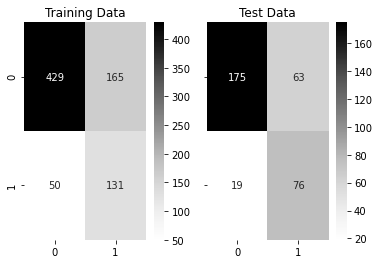

In [407]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(L_y_train,TLR_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(L_y_test,TLR_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [408]:
print('Classification Report of the training data:\n\n',classification_report(L_y_train, TLR_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.72      0.80       594
           1       0.44      0.72      0.55       181

    accuracy                           0.72       775
   macro avg       0.67      0.72      0.67       775
weighted avg       0.79      0.72      0.74       775
 



In [409]:
print('Classification Report of the test data:\n\n',classification_report(L_y_test,TLR_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.74      0.81       238
           1       0.55      0.80      0.65        95

    accuracy                           0.75       333
   macro avg       0.72      0.77      0.73       333
weighted avg       0.80      0.75      0.76       333
 



In [410]:
TLR_metrics=classification_report(L_y_train,TLR_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(TLR_metrics).transpose()
TLR_train_f1=round(dfm.loc["1"][2],2)
TLR_train_recall=round(dfm.loc["1"][1],2)
TLR_train_precision=round(dfm.loc["1"][0],2)
print ('TLR_train_precision ',TLR_train_precision)
print ('TLR_train_recall ',TLR_train_recall)
print ('TLR_train_f1 ',TLR_train_f1)

TLR_train_precision  0.44
TLR_train_recall  0.72
TLR_train_f1  0.55


In [411]:
TLR_metrics=classification_report(L_y_test, TLR_ytest_predict,output_dict=True)
dfm=pd.DataFrame(TLR_metrics).transpose()
TLR_test_precision=round(dfm.loc["1"][0],2)
TLR_test_recall=round(dfm.loc["1"][1],2)
TLR_test_f1=round(dfm.loc["1"][2],2)
print ('TLR_test_precision ',TLR_test_precision)
print ('TLR_test_recall ',TLR_test_recall)
print ('TLR_test_f1 ',TLR_test_f1)

TLR_test_precision  0.55
TLR_test_recall  0.8
TLR_test_f1  0.65


AUC for the Training Data: 0.812
AUC for the Test Data: 0.863


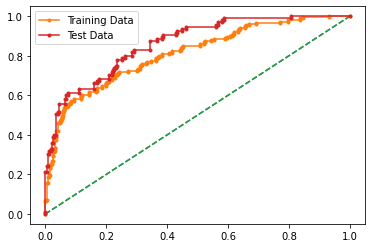

In [412]:
# AUC and ROC for the training data
# calculate AUC
TLR_train_auc = metrics.roc_auc_score(L_y_train,TLR_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % TLR_train_auc)

#  calculate roc curve
TLR_fpr_train, TLR_tpr_train, thresholds = metrics.roc_curve(L_y_train,TLR_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(TLR_fpr_train, TLR_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
TLR_test_auc = metrics.roc_auc_score(L_y_test,TLR_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % TLR_test_auc)

#  calculate roc curve
TLR_fpr_test, TLR_tpr_test, thresholds = metrics.roc_curve(L_y_test,TLR_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(TLR_fpr_test, TLR_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Linear Discriminant Analysis

In [413]:
LDA = LinearDiscriminantAnalysis()
LDA_model=LDA.fit(L_X_train,L_y_train)

In [414]:
ytrain_pred_LDA = LDA_model.predict(L_X_train)
ytest_pred_LDA = LDA_model.predict(L_X_test)

In [415]:
ytrain_proba_LDA = LDA_model.predict_proba(L_X_train)
ytest_proba_LDA = LDA_model.predict_proba(L_X_test)

In [416]:
pd.DataFrame(ytest_proba_LDA).head()

,0,1
0,0.983319,0.016681
1,0.945032,0.054968
2,0.864051,0.135949
3,0.926946,0.073054
4,0.716908,0.283092


In [417]:
LDA_train_score = LDA_model.score(L_X_train, L_y_train)
print('Accuracy Score is ',LDA_train_score)

Accuracy Score is  0.8374193548387097


In [418]:
LDA_test_score = LDA_model.score(L_X_test, L_y_test)
print('Accuracy Score is ',LDA_test_score)

Accuracy Score is  0.8228228228228228


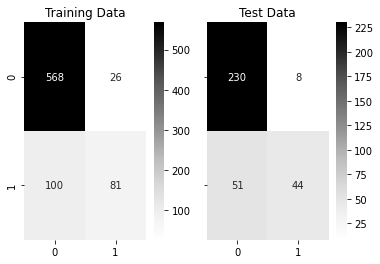

In [419]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(L_y_train,ytrain_pred_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(L_y_test,ytest_pred_LDA)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [420]:
print('Classification Report of the training data:\n\n',classification_report(L_y_train, ytrain_pred_LDA), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.96      0.90       594
           1       0.76      0.45      0.56       181

    accuracy                           0.84       775
   macro avg       0.80      0.70      0.73       775
weighted avg       0.83      0.84      0.82       775
 



In [421]:
print('Classification Report of the test data:\n\n',classification_report(L_y_test,ytest_pred_LDA),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.82      0.97      0.89       238
           1       0.85      0.46      0.60        95

    accuracy                           0.82       333
   macro avg       0.83      0.71      0.74       333
weighted avg       0.83      0.82      0.80       333
 



AUC for the Training Data: 0.812
AUC for the Test Data: 0.858


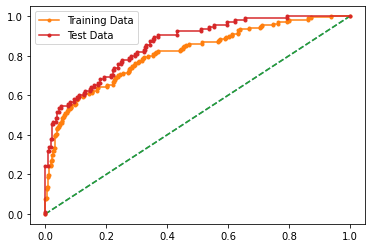

In [422]:
# AUC and ROC for the training data
# calculate AUC
LDA_train_auc = metrics.roc_auc_score(L_y_train,ytrain_proba_LDA[:,1])
print('AUC for the Training Data: %.3f' % LDA_train_auc)

#  calculate roc curve
LDA_fpr_train, LDA_tpr_train, thresholds = metrics.roc_curve(L_y_train,ytrain_proba_LDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_fpr_train, LDA_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
LDA_test_auc = metrics.roc_auc_score(L_y_test,ytest_proba_LDA[:,1])
print('AUC for the Test Data: %.3f' % LDA_test_auc)

#  calculate roc curve
LDA_fpr_test, LDA_tpr_test, thresholds = metrics.roc_curve(L_y_test,ytest_proba_LDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_fpr_test, LDA_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [423]:
LDA_metrics=classification_report(L_y_train,ytrain_pred_LDA,output_dict=True)
dfm=pd.DataFrame(LDA_metrics).transpose()
LDA_train_f1=round(dfm.loc["1"][2],2)
LDA_train_recall=round(dfm.loc["1"][1],2)
LDA_train_precision=round(dfm.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.76
LDA_train_recall  0.45
LDA_train_f1  0.56


In [424]:
LDA_metrics=classification_report(L_y_test, ytest_pred_LDA,output_dict=True)
dfm=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(dfm.loc["1"][0],2)
LDA_test_recall=round(dfm.loc["1"][1],2)
LDA_test_f1=round(dfm.loc["1"][2],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.85
LDA_test_recall  0.46
LDA_test_f1  0.6


#### Gaussian Naïve Bayes Model

In [425]:
NB_model = GaussianNB()
NB_model.fit(L_X_train, L_y_train)

GaussianNB()

In [426]:
NB_ytrain_predict = NB_model.predict(L_X_train)
NB_ytest_predict = NB_model.predict(L_X_test)

In [427]:
NB_ytrain_proba = NB_model.predict_proba(L_X_train)
NB_ytest_proba = NB_model.predict_proba(L_X_test)
pd.DataFrame(NB_ytest_proba).head()

,0,1
0,0.946137,0.053863
1,0.955428,0.044572
2,0.826147,0.173853
3,0.805710,0.194290
4,0.654696,0.345304


In [428]:
NB_train_score = NB_model.score(L_X_train, L_y_train)
print('Accuracy Score is ',NB_train_score)

Accuracy Score is  0.832258064516129


In [429]:
NB_test_score = NB_model.score(L_X_test, L_y_test) 
print('Accuracy Score is ',NB_test_score)

Accuracy Score is  0.8018018018018018


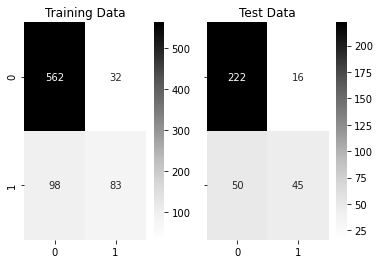

In [430]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(L_y_train,NB_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(L_y_test,NB_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [431]:
print('Classification Report of the training data:\n\n',classification_report(L_y_train, NB_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.95      0.90       594
           1       0.72      0.46      0.56       181

    accuracy                           0.83       775
   macro avg       0.79      0.70      0.73       775
weighted avg       0.82      0.83      0.82       775
 



In [432]:
print('Classification Report of the test data:\n\n',classification_report(L_y_test, NB_ytest_predict), '\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.82      0.93      0.87       238
           1       0.74      0.47      0.58        95

    accuracy                           0.80       333
   macro avg       0.78      0.70      0.72       333
weighted avg       0.79      0.80      0.79       333
 



In [433]:
NB_metrics=classification_report(L_y_train,NB_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(NB_metrics).transpose()
NB_train_f1=round(dfm.loc["1"][2],2)
NB_train_recall=round(dfm.loc["1"][1],2)
NB_train_precision=round(dfm.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.72
NB_train_recall  0.46
NB_train_f1  0.56


In [434]:
NB_metrics=classification_report(L_y_test, NB_ytest_predict,output_dict=True)
dfm=pd.DataFrame(NB_metrics).transpose()
NB_test_precision=round(dfm.loc["1"][0],2)
NB_test_recall=round(dfm.loc["1"][1],2)
NB_test_f1=round(dfm.loc["1"][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.74
NB_test_recall  0.47
NB_test_f1  0.58


AUC for the Training Data: 0.786
AUC for the Test Data: 0.847


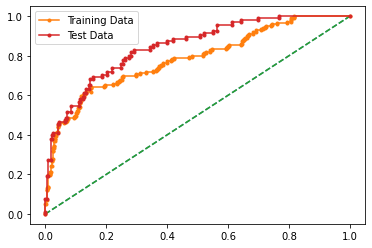

In [435]:
# AUC and ROC for the training data

# calculate AUC
NB_train_auc = metrics.roc_auc_score(L_y_train,NB_ytrain_proba[:,1])
print('AUC for the Training Data: %.3f' % NB_train_auc)

#  calculate roc curve
NB_fpr_train, NB_tpr_train, thresholds = metrics.roc_curve(L_y_train,NB_ytrain_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_fpr_train, NB_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
NB_test_auc = metrics.roc_auc_score(L_y_test,NB_ytest_proba[:,1])
print('AUC for the Test Data: %.3f' % NB_test_auc)

#  calculate roc curve
NB_fpr_test, NB_tpr_test, thresholds = metrics.roc_curve(L_y_test,NB_ytest_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_fpr_test, NB_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Decision Tree Classifier

In [436]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [437]:
dt_model.fit(L_X_train, L_y_train)

DecisionTreeClassifier()

In [438]:
from sklearn import tree

L_CART_LABEL = ['No', 'Yes']
L_Tree_File = open('L_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=L_Tree_File, 
                                feature_names = list(L_X_train), 
                                class_names = list(L_CART_LABEL))

L_Tree_File.close()

In [439]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = L_X_train.columns).sort_values('Imp',ascending=False))

                                              Imp
Yearly_avg_view_on_travel_page           0.324488
total_likes_on_outstation_checkin_given  0.160289
Yearly_avg_comment_on_travel_page        0.113872
yearly_avg_Outstation_checkins           0.102368
Daily_Avg_mins_spend_on_traveling_page   0.085652
following_company_page_Yes               0.048947
member_in_family                         0.043765
working_flag_Yes                         0.040853
Preferred_location_Cultural              0.024139
travelling_network_rating                0.018343
Adult_flag                               0.017575
Preferred_location_Adventure             0.010298
montly_avg_comment_on_company_page       0.008109
week_since_last_outstation_checkin       0.001303
preferred_device                         0.000000
Preferred_location_Other                 0.000000


In [440]:
dtparam_grid = {
    'max_depth': [ 5,6,7,8],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [30, 45, 60]
}

dt_model = DecisionTreeClassifier()

dt_grid_search = GridSearchCV(estimator = dt_model, param_grid = dtparam_grid, cv = 3)

In [441]:
dt_grid_search.fit(L_X_train, L_y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [30, 45, 60]})

In [442]:
dt_grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 45}

In [443]:
dt_best_grid = dt_grid_search.best_estimator_

In [444]:
Lreg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 6,min_samples_leaf=5,min_samples_split=45, random_state=1)
Lreg_dt_model.fit(L_X_train, L_y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=45,
                       random_state=1)

In [445]:
L_tree_regularized = open('L_tree_regularized.dot','w')
dot_data = tree.export_graphviz(Lreg_dt_model, out_file= L_tree_regularized , feature_names = list(L_X_train), class_names = list(L_CART_LABEL))

L_tree_regularized.close()

In [446]:
print (pd.DataFrame(Lreg_dt_model.feature_importances_, columns = ["Imp"], index = L_X_train.columns).sort_values('Imp',ascending=False))


                                              Imp
Yearly_avg_view_on_travel_page           0.398511
total_likes_on_outstation_checkin_given  0.167934
yearly_avg_Outstation_checkins           0.126866
following_company_page_Yes               0.097614
Daily_Avg_mins_spend_on_traveling_page   0.091388
member_in_family                         0.056726
Preferred_location_Adventure             0.037358
montly_avg_comment_on_company_page       0.014874
travelling_network_rating                0.008729
Yearly_avg_comment_on_travel_page        0.000000
week_since_last_outstation_checkin       0.000000
preferred_device                         0.000000
Adult_flag                               0.000000
working_flag_Yes                         0.000000
Preferred_location_Cultural              0.000000
Preferred_location_Other                 0.000000


In [447]:
L_ytrain_predict = dt_best_grid.predict(L_X_train)
L_ytest_predict = dt_best_grid.predict(L_X_test)

In [448]:
Ldt_ytrain_proba = dt_best_grid.predict_proba(L_X_train)
Ldt_ytest_proba = dt_best_grid.predict_proba(L_X_test)
pd.DataFrame(Ldt_ytest_proba).head()

,0,1
0,1.000000,0.000000
1,0.987069,0.012931
2,0.777778,0.222222
3,0.987069,0.012931
4,1.000000,0.000000


In [449]:
dt_train_score = dt_best_grid.score(L_X_train, L_y_train)
print('Accuracy Score is ',dt_train_score)

Accuracy Score is  0.8722580645161291


In [450]:
dt_test_score = dt_best_grid.score(L_X_test, L_y_test) 
print('Accuracy Score is ',dt_test_score)

Accuracy Score is  0.7897897897897898


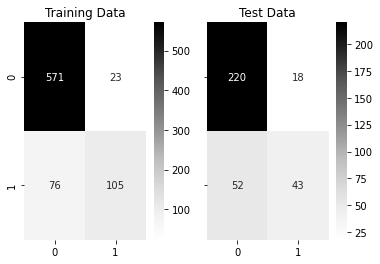

In [451]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(L_y_train,L_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(L_y_test,L_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [452]:
print('Classification Report of the training data:\n\n',classification_report(L_y_train, L_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.96      0.92       594
           1       0.82      0.58      0.68       181

    accuracy                           0.87       775
   macro avg       0.85      0.77      0.80       775
weighted avg       0.87      0.87      0.86       775
 



In [453]:
print('Classification Report of the test data:\n\n',classification_report(L_y_test, L_ytest_predict), '\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.81      0.92      0.86       238
           1       0.70      0.45      0.55        95

    accuracy                           0.79       333
   macro avg       0.76      0.69      0.71       333
weighted avg       0.78      0.79      0.77       333
 



In [454]:
dt_metrics=classification_report(L_y_train,L_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(dt_metrics).transpose()
dt_train_f1=round(dfm.loc["1"][2],2)
dt_train_recall=round(dfm.loc["1"][1],2)
dt_train_precision=round(dfm.loc["1"][0],2)
print ('dt_train_precision ',dt_train_precision)
print ('dt_train_recall ',dt_train_recall)
print ('dt_train_f1 ',dt_train_f1)

dt_train_precision  0.82
dt_train_recall  0.58
dt_train_f1  0.68


In [455]:
dt_metrics=classification_report(L_y_test, L_ytest_predict,output_dict=True)
dfm=pd.DataFrame(dt_metrics).transpose()
dt_test_precision=round(dfm.loc["1"][0],2)
dt_test_recall=round(dfm.loc["1"][1],2)
dt_test_f1=round(dfm.loc["1"][2],2)
print ('dt_test_precision ',dt_test_precision)
print ('dt_test_recall ',dt_test_recall)
print ('dt_test_f1 ',dt_test_f1)

dt_test_precision  0.7
dt_test_recall  0.45
dt_test_f1  0.55


AUC for the Training Data: 0.921
AUC for the Test Data: 0.846


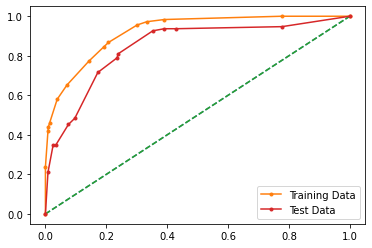

In [456]:
# AUC and ROC for the training data

# calculate AUC
dt_train_auc = metrics.roc_auc_score(L_y_train,Ldt_ytrain_proba[:,1])
print('AUC for the Training Data: %.3f' % dt_train_auc)

#  calculate roc curve
dt_fpr_train, dt_tpr_train, thresholds = metrics.roc_curve(L_y_train,Ldt_ytrain_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_fpr_train, dt_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
dt_test_auc = metrics.roc_auc_score(L_y_test,Ldt_ytest_proba[:,1])
print('AUC for the Test Data: %.3f' % dt_test_auc)

#  calculate roc curve
dt_fpr_test, dt_tpr_test, thresholds = metrics.roc_curve(L_y_test,Ldt_ytest_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_fpr_test, dt_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Random Classifier Base Model

In [457]:
lrf = RandomForestClassifier()

In [458]:
lrf.fit(L_X_train, L_y_train)

RandomForestClassifier()

In [459]:
Lrf_ytrain_predict = lrf.predict(L_X_train)
Lrf_ytest_predict = lrf.predict(L_X_test)

In [460]:
Lrf_ytrain_proba = lrf.predict_proba(L_X_train)
Lrf_ytest_proba = lrf.predict_proba(L_X_test)
pd.DataFrame(Lrf_ytest_proba).head()

,0,1
0,0.86,0.14
1,0.98,0.02
2,0.68,0.32
3,1.00,0.00
4,0.94,0.06


In [461]:
Lrf_ytest_proba = Lrf_ytest_proba[:, 1]

In [462]:
Lrf_ytrain_proba = Lrf_ytrain_proba[:, 1]

In [463]:
precision, recall, thresholds = precision_recall_curve(L_y_test, Lrf_ytest_proba)

In [464]:
fscore = (2 * precision * recall) / (precision + recall)

In [465]:
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.440000, F-Score=0.951


In [556]:
threshold = 0.440000
lrf_preds = [1 if Lrf_ytest_proba[i]> threshold else 0 for i in range(len(Lrf_ytest_proba))]

In [557]:
threshold = 0.440000
lrf_preds_train = [1 if Lrf_ytrain_proba[i]> threshold else 0 for i in range(len(Lrf_ytrain_proba))]

In [558]:
Lrf_train_score = lrf.score(L_X_train, L_y_train)
print('Accuracy Score is ',Lrf_train_score)

Accuracy Score is  1.0


In [559]:
Lrf_test_score = lrf.score(L_X_test, L_y_test) 
print('Accuracy Score is ',Lrf_test_score)

Accuracy Score is  0.948948948948949


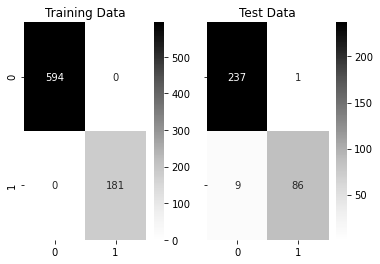

In [560]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(L_y_train,lrf_preds_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(L_y_test,lrf_preds)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [561]:
print('Classification Report of the training data:\n\n',classification_report(L_y_train, lrf_preds_train), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775
 



In [562]:
print('Classification Report of the test data:\n\n',classification_report(L_y_test, lrf_preds), '\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       238
           1       0.99      0.91      0.95        95

    accuracy                           0.97       333
   macro avg       0.98      0.95      0.96       333
weighted avg       0.97      0.97      0.97       333
 



In [563]:
rf_metrics=classification_report(L_y_train,lrf_preds_train,output_dict=True)
dfm=pd.DataFrame(rf_metrics).transpose()
Lrf_train_f1=round(dfm.loc["1"][2],2)
Lrf_train_recall=round(dfm.loc["1"][1],2)
Lrf_train_precision=round(dfm.loc["1"][0],2)
print ('Lrf_train_precision ',Lrf_train_precision)
print ('Lrf_train_recall ',Lrf_train_recall)
print ('Lrf_train_f1 ',Lrf_train_f1)

Lrf_train_precision  1.0
Lrf_train_recall  1.0
Lrf_train_f1  1.0


In [564]:
rf_metrics=classification_report(L_y_test, lrf_preds,output_dict=True)
dfm=pd.DataFrame(rf_metrics).transpose()
Lrf_test_precision=round(dfm.loc["1"][0],2)
Lrf_test_recall=round(dfm.loc["1"][1],2)
Lrf_test_f1=round(dfm.loc["1"][2],2)
print ('Lrf_test_precision ',Lrf_test_precision)
print ('Lrf_test_recall ',Lrf_test_recall)
print ('Lrf_test_f1 ',Lrf_test_f1)

Lrf_test_precision  0.99
Lrf_test_recall  0.91
Lrf_test_f1  0.95


AUC for the Training Data: 1.000
AUC for the Test Data: 0.951


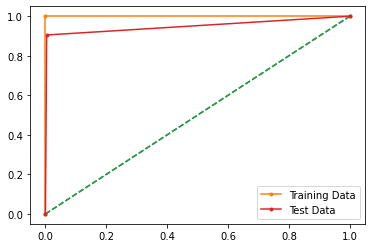

In [566]:
# AUC and ROC for the training data

# calculate AUC
Lrf_train_auc = metrics.roc_auc_score(L_y_train,lrf_preds_train)
print('AUC for the Training Data: %.3f' % Lrf_train_auc)

#  calculate roc curve
Lrf_fpr_train, Lrf_tpr_train, thresholds = metrics.roc_curve(L_y_train,lrf_preds_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Lrf_fpr_train, Lrf_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
Lrf_test_auc = metrics.roc_auc_score(L_y_test,lrf_preds)
print('AUC for the Test Data: %.3f' % Lrf_test_auc)

#  calculate roc curve
Lrf_fpr_test, Lrf_tpr_test, thresholds = metrics.roc_curve(L_y_test,lrf_preds)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Lrf_fpr_test, Lrf_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

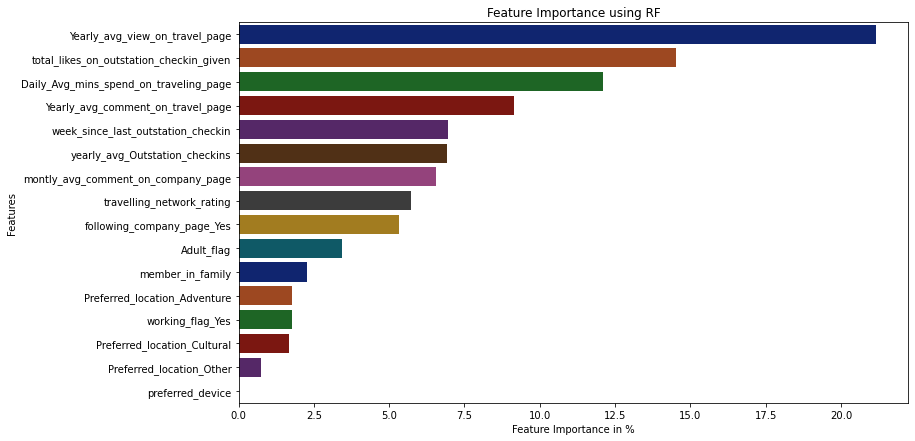

In [567]:
x=pd.DataFrame(lrf.feature_importances_*100,index=L_X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

#### Tunned Random Forest Classifier

In [477]:
rf_param_grid = {
    'max_depth': [10,12,15],
    'max_features': [10,15,20],
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [20,30,40],
    'n_estimators': [100,150]
}

L_rfcl = RandomForestClassifier()

rf_grid_search = GridSearchCV(estimator = L_rfcl, param_grid = rf_param_grid, cv =3 )

In [478]:
rf_grid_search.fit(L_X_train, L_y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12, 15],
                         'max_features': [10, 15, 20],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [100, 150]})

In [479]:
rf_grid_search.best_params_

{'max_depth': 12,
 'max_features': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 150}

In [480]:
rf_best_grid = rf_grid_search.best_estimator_
rf_best_grid

RandomForestClassifier(max_depth=12, max_features=15, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=150)

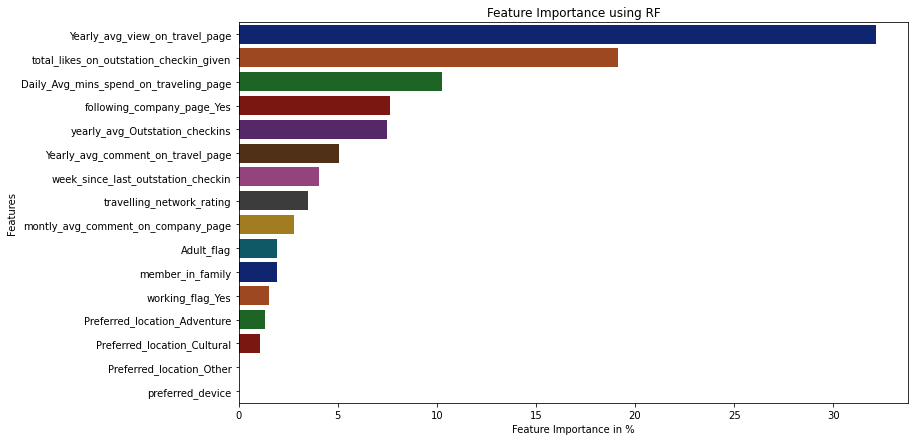

In [481]:
x=pd.DataFrame(rf_best_grid.feature_importances_*100,index=L_X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [482]:
rf_ytrain_predict = rf_best_grid.predict(L_X_train)
rf_ytest_predict = rf_best_grid.predict(L_X_test)

In [483]:
rf_ytrain_proba = rf_best_grid.predict_proba(L_X_train)
rf_ytest_proba = rf_best_grid.predict_proba(L_X_test)
pd.DataFrame(rf_ytest_proba).head()

,0,1
0,0.864585,0.135415
1,0.995665,0.004335
2,0.786960,0.213040
3,0.978920,0.021080
4,0.729291,0.270709


In [484]:
rf_train_score = rf_best_grid.score(L_X_train, L_y_train)
print('Accuracy Score is ',Mrf_train_score)

Accuracy Score is  0.9081276824034334


In [485]:
rf_test_score = rf_best_grid.score(L_X_test, L_y_test) 
print('Accuracy Score is ',rf_test_score)

Accuracy Score is  0.8588588588588588


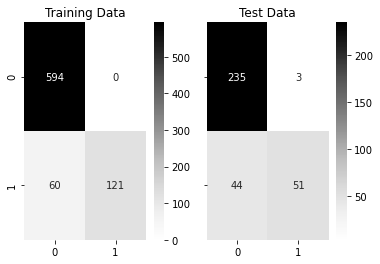

In [486]:
#confusion Matrix for Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(L_y_train,rf_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(L_y_test,rf_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [487]:
print('Classification Report of the training data:\n\n',classification_report(L_y_train, rf_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.91      1.00      0.95       594
           1       1.00      0.67      0.80       181

    accuracy                           0.92       775
   macro avg       0.95      0.83      0.88       775
weighted avg       0.93      0.92      0.92       775
 



In [488]:
print('Classification Report of the test data:\n\n',classification_report(L_y_test, rf_ytest_predict), '\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.84      0.99      0.91       238
           1       0.94      0.54      0.68        95

    accuracy                           0.86       333
   macro avg       0.89      0.76      0.80       333
weighted avg       0.87      0.86      0.85       333
 



In [489]:
Lrf_metrics=classification_report(L_y_train,rf_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(Lrf_metrics).transpose()
rf_train_f1=round(dfm.loc["1"][2],2)
rf_train_recall=round(dfm.loc["1"][1],2)
rf_train_precision=round(dfm.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  1.0
rf_train_recall  0.67
rf_train_f1  0.8


In [490]:
Lrf_metrics=classification_report(L_y_test, rf_ytest_predict,output_dict=True)
dfm=pd.DataFrame(Lrf_metrics).transpose()
rf_test_precision=round(dfm.loc["1"][0],2)
rf_test_recall=round(dfm.loc["1"][1],2)
rf_test_f1=round(dfm.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.94
rf_test_recall  0.54
rf_test_f1  0.68


AUC for the Training Data: 0.987
AUC for the Test Data: 0.954


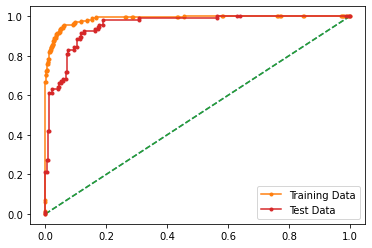

In [491]:
# AUC and ROC for the training data

# calculate AUC
rf_train_auc = metrics.roc_auc_score(L_y_train,rf_ytrain_proba[:,1])
print('AUC for the Training Data: %.3f' % rf_train_auc)

#  calculate roc curve
rf_fpr_train, rf_tpr_train, thresholds = metrics.roc_curve(L_y_train,rf_ytrain_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_fpr_train, rf_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
rf_test_auc = metrics.roc_auc_score(L_y_test,rf_ytest_proba[:,1])
print('AUC for the Test Data: %.3f' % rf_test_auc)

#  calculate roc curve
rf_fpr_test, rf_tpr_test, thresholds = metrics.roc_curve(L_y_test,rf_ytest_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_fpr_test, rf_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### MLP Classifier (Artificial Neural Network)

In [492]:
Lclf=MLPClassifier()

In [493]:
Lclf.fit(L_X_train, L_y_train)

MLPClassifier()

In [494]:
Lclf_ytrain_pred = Lclf.predict(L_X_train)
Lclf_ytest_pred = Lclf.predict(L_X_test)

In [495]:
Lclf_ytrain_proba = Lclf.predict_proba(L_X_train)
Lclf_ytest_proba = Lclf.predict_proba(L_X_test)

In [496]:
pd.DataFrame(Lclf_ytest_proba).head()

,0,1
0,0.970755,0.029245
1,0.951827,0.048173
2,0.402327,0.597673
3,0.977708,0.022292
4,0.717857,0.282143


In [497]:
Lclf_ytest_proba = Lclf_ytest_proba[:, 1]

In [498]:
Lclf_ytrain_proba = Lclf_ytrain_proba[:, 1]

In [499]:
precision, recall, thresholds = precision_recall_curve(L_y_test, Lclf_ytest_proba)

In [500]:
fscore = (2 * precision * recall) / (precision + recall)

In [501]:
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.374260, F-Score=0.827


In [568]:
threshold = 0.374260
lclf_preds = [1 if Lclf_ytest_proba[i]> threshold else 0 for i in range(len(Lclf_ytest_proba))]

In [569]:
threshold = 0.374260
lclf_preds_train = [1 if Lclf_ytrain_proba[i]> threshold else 0 for i in range(len(Lclf_ytrain_proba))]

In [570]:
Lclf_train_score = Lclf.score(L_X_train, L_y_train)
print('Accuracy Score is ',Lclf_train_score)

Accuracy Score is  0.9483870967741935


In [571]:
Lclf_test_score = Lclf.score(L_X_test, L_y_test) 
print('Accuracy Score is ',Lclf_test_score)

Accuracy Score is  0.8708708708708709


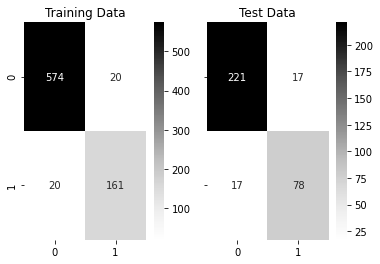

In [572]:
#confusion Matrix fro Training & Test Data
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(L_y_train,lclf_preds_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(L_y_test,lclf_preds)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [573]:
print('Classification Report of the training data:\n\n',classification_report(L_y_train, lclf_preds_train), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       594
           1       0.89      0.89      0.89       181

    accuracy                           0.95       775
   macro avg       0.93      0.93      0.93       775
weighted avg       0.95      0.95      0.95       775
 



In [574]:
print('Classification Report of the test data:\n\n',classification_report(L_y_test, lclf_preds), '\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.93      0.93      0.93       238
           1       0.82      0.82      0.82        95

    accuracy                           0.90       333
   macro avg       0.87      0.87      0.87       333
weighted avg       0.90      0.90      0.90       333
 



In [509]:
Lclf_metrics=classification_report(L_y_train,lclf_preds_train,output_dict=True)
dfm=pd.DataFrame(Lclf_metrics).transpose()
Lclf_train_f1=round(dfm.loc["1"][2],2)
Lclf_train_recall=round(dfm.loc["1"][1],2)
Lclf_train_precision=round(dfm.loc["1"][0],2)
print ('Lclf_train_precision ',Lclf_train_precision)
print ('Lclf_train_recall ',Lclf_train_recall)
print ('Lclf_train_f1 ',Lclf_train_f1)

Lclf_train_precision  0.89
Lclf_train_recall  0.9
Lclf_train_f1  0.89


In [510]:
Lclf_metrics=classification_report(L_y_test, lclf_preds,output_dict=True)
dfm=pd.DataFrame(Lclf_metrics).transpose()
Lclf_test_precision=round(dfm.loc["1"][0],2)
Lclf_test_recall=round(dfm.loc["1"][1],2)
Lclf_test_f1=round(dfm.loc["1"][2],2)
print ('Lclf_test_precision ',Lclf_test_precision)
print ('Lclf_test_recall ',Lclf_test_recall)
print ('Lclf_test_f1 ',Lclf_test_f1)

Lclf_test_precision  0.81
Lclf_test_recall  0.83
Lclf_test_f1  0.82


AUC for the Training Data: 0.928
AUC for the Test Data: 0.875


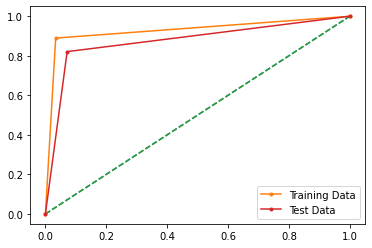

In [575]:
# AUC and ROC for the training data

# calculate AUC
Lclf_train_auc = metrics.roc_auc_score(L_y_train,lclf_preds_train)
print('AUC for the Training Data: %.3f' % Lclf_train_auc)

#  calculate roc curve
Lclf_fpr_train, Lclf_tpr_train, thresholds = metrics.roc_curve(L_y_train,lclf_preds_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Lclf_fpr_train, Lclf_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
Lclf_test_auc = metrics.roc_auc_score(L_y_test,lclf_preds)
print('AUC for the Test Data: %.3f' % Lclf_test_auc)

#  calculate roc curve
Lclf_fpr_test, Lclf_tpr_test, thresholds = metrics.roc_curve(L_y_test,lclf_preds)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Lclf_fpr_test, Lclf_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Support Vector Machine Model

In [512]:
svl =SVR(kernel='rbf')

In [513]:
svl_param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

L_grid = GridSearchCV(estimator = svl, param_grid=svl_param_grid, refit = True, verbose = 3)

In [514]:
L_grid.fit(L_X_train, L_y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.

[CV 3/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 4/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 5/5] END ................................C=1000, gamma=1; total time=   0.0s
[CV 1/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 2/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 3/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 4/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 5/5] END ..............................C=1000, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=1000, gamma=0.01; total time=   0.9s
[CV 2/5] END .............................C=1000, gamma=0.01; total time=   0.9s
[CV 3/5] END .............................C=1000, gamma=0.01; total time=   0.8s
[CV 4/5] END .............................C=1000, gamma=0.01; total time=   0.8s
[CV 5/5] END ...............

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [515]:
L_grid.best_params_

{'C': 100, 'gamma': 0.1}

In [516]:
Lsvm_best_grid = L_grid.best_estimator_
Lsvm_best_grid

SVR(C=100, gamma=0.1)

In [517]:
svl_ytrain_pred = Lsvm_best_grid.predict(L_X_train)
svl_ytest_pred = Lsvm_best_grid.predict(L_X_test)

In [518]:
svl_train_score = Lsvm_best_grid.score(L_X_train, L_y_train)
print('Accuracy Score is ',svl_train_score)

Accuracy Score is  0.9632512271656064


In [519]:
svl_test_score = Lsvm_best_grid.score(L_X_test, L_y_test) 
print('Accuracy Score is ',svl_test_score)

Accuracy Score is  0.8486758442681741


#### Bagging (RandomForest as base estimator)

In [520]:
bgcl = BaggingClassifier(base_estimator=rf_best_grid, n_estimators=150,random_state=1)

bgcl = bgcl.fit(L_X_train, L_y_train)

In [521]:
bgcl_ytrain_predict = bgcl.predict(L_X_train)
bgcl_ytest_predict = bgcl.predict(L_X_test)

In [522]:
bgcl_ytest_prob=bgcl.predict_proba(L_X_test)
bgcl_ytrain_prob=bgcl.predict_proba(L_X_train)
pd.DataFrame(bgcl_ytest_prob).head()

,0,1
0,0.862980,0.137020
1,0.982830,0.017170
2,0.696148,0.303852
3,0.973174,0.026826
4,0.637948,0.362052


In [523]:
bgcl_train_score = bgcl.score(L_X_train, L_y_train)
print('Accuracy Score is ',bgcl_train_score)

Accuracy Score is  0.8748387096774194


In [524]:
bgcl_test_score = bgcl.score(L_X_test, L_y_test)
print('Accuracy Score is ',bgcl_test_score)

Accuracy Score is  0.8078078078078078


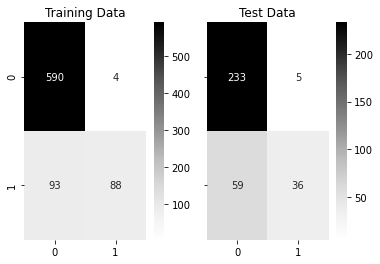

In [525]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(L_y_train,bgcl_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(L_y_test,bgcl_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [526]:
print('Classification Report of the training data:\n\n',classification_report(L_y_train, bgcl_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.99      0.92       594
           1       0.96      0.49      0.64       181

    accuracy                           0.87       775
   macro avg       0.91      0.74      0.78       775
weighted avg       0.89      0.87      0.86       775
 



In [527]:
print('Classification Report of the test data:\n\n',classification_report(L_y_test,bgcl_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.80      0.98      0.88       238
           1       0.88      0.38      0.53        95

    accuracy                           0.81       333
   macro avg       0.84      0.68      0.70       333
weighted avg       0.82      0.81      0.78       333
 



In [528]:
bgcl_metrics=classification_report(L_y_train,bgcl_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(bgcl_metrics).transpose()
bgcl_train_f1=round(dfm.loc["1"][2],2)
bgcl_train_recall=round(dfm.loc["1"][1],2)
bgcl_train_precision=round(dfm.loc["1"][0],2)
print ('bgcl_train_precision ',bgcl_train_precision)
print ('bgcl_train_recall ',bgcl_train_recall)
print ('bgcl_train_f1 ',bgcl_train_f1)

bgcl_train_precision  0.96
bgcl_train_recall  0.49
bgcl_train_f1  0.64


In [529]:
bgcl_metrics=classification_report(L_y_test, bgcl_ytest_predict,output_dict=True)
dfm=pd.DataFrame(bgcl_metrics).transpose()
bgcl_test_precision=round(dfm.loc["1"][0],2)
bgcl_test_recall=round(dfm.loc["1"][1],2)
bgcl_test_f1=round(dfm.loc["1"][2],2)
print ('bgcl_test_precision ',bgcl_test_precision)
print ('bgcl_test_recall ',bgcl_test_recall)
print ('bgcl_test_f1 ',bgcl_test_f1)

bgcl_test_precision  0.88
bgcl_test_recall  0.38
bgcl_test_f1  0.53


AUC for the Training Data: 0.965
AUC for the Test Data: 0.932


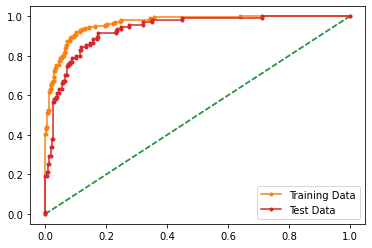

In [530]:
# AUC and ROC for the training data

# calculate AUC
bgcl_train_auc = metrics.roc_auc_score(L_y_train,bgcl_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % bgcl_train_auc)

#  calculate roc curve
bgcl_fpr_train, bgcl_tpr_train, thresholds = metrics.roc_curve(L_y_train,bgcl_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bgcl_fpr_train, bgcl_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
bgcl_test_auc = metrics.roc_auc_score(L_y_test,bgcl_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % bgcl_test_auc)

#  calculate roc curve
bgcl_fpr_test, bgcl_tpr_test, thresholds = metrics.roc_curve(L_y_test,bgcl_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bgcl_fpr_test, bgcl_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Ada Boost

In [531]:
ADB_model = AdaBoostClassifier(n_estimators=150,random_state=1)
ADB_model.fit(L_X_train, L_y_train)

AdaBoostClassifier(n_estimators=150, random_state=1)

In [532]:
ADB_ytrain_predict = ADB_model.predict(L_X_train)
ADB_ytest_predict = ADB_model.predict(L_X_test)

In [533]:
ADB_ytest_prob=ADB_model.predict_proba(L_X_test)
ADB_ytrain_prob=ADB_model.predict_proba(L_X_train)
pd.DataFrame(ADB_ytest_prob).head()

,0,1
0,0.508484,0.491516
1,0.515106,0.484894
2,0.506330,0.493670
3,0.510037,0.489963
4,0.507999,0.492001


In [534]:
ADB_train_score = ADB_model.score(L_X_train, L_y_train)
print('Accuracy Score for Training is ',ADB_train_score)

Accuracy Score for Training is  0.9135483870967742


In [535]:
ADB_test_score = ADB_model.score(L_X_test, L_y_test)
print('Accuracy Score for Test Data is ',ADB_test_score)

Accuracy Score for Test Data is  0.8618618618618619


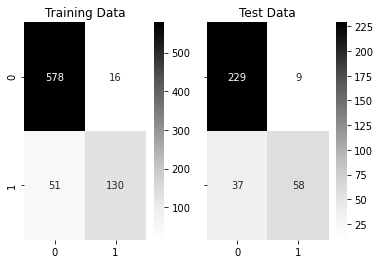

In [536]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(L_y_train,ADB_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(L_y_test,ADB_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [537]:
print('Classification Report of the training data:\n\n',classification_report(L_y_train, ADB_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.92      0.97      0.95       594
           1       0.89      0.72      0.80       181

    accuracy                           0.91       775
   macro avg       0.90      0.85      0.87       775
weighted avg       0.91      0.91      0.91       775
 



In [538]:
print('Classification Report of the test data:\n\n',classification_report(L_y_test,ADB_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.96      0.91       238
           1       0.87      0.61      0.72        95

    accuracy                           0.86       333
   macro avg       0.86      0.79      0.81       333
weighted avg       0.86      0.86      0.85       333
 



In [539]:
ADB_metrics=classification_report(L_y_train,ADB_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(ADB_metrics).transpose()
ADB_train_f1=round(dfm.loc["1"][2],2)
ADB_train_recall=round(dfm.loc["1"][1],2)
ADB_train_precision=round(dfm.loc["1"][0],2)
print ('ADB_train_precision ',ADB_train_precision)
print ('ADB_train_recall ',ADB_train_recall)
print ('ADB_train_f1 ',ADB_train_f1)

ADB_train_precision  0.89
ADB_train_recall  0.72
ADB_train_f1  0.8


In [540]:
ADB_metrics=classification_report(L_y_test, ADB_ytest_predict,output_dict=True)
dfm=pd.DataFrame(ADB_metrics).transpose()
ADB_test_precision=round(dfm.loc["1"][0],2)
ADB_test_recall=round(dfm.loc["1"][1],2)
ADB_test_f1=round(dfm.loc["1"][2],2)
print ('ADB_test_precision ',ADB_test_precision)
print ('ADB_test_recall ',ADB_test_recall)
print ('ADB_test_f1 ',ADB_test_f1)

ADB_test_precision  0.87
ADB_test_recall  0.61
ADB_test_f1  0.72


AUC for the Training Data: 0.977
AUC for the Test Data: 0.920


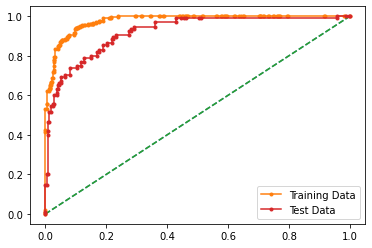

In [541]:
# AUC and ROC for the training data

# calculate AUC
ADB_train_auc = metrics.roc_auc_score(L_y_train,ADB_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % ADB_train_auc)

#  calculate roc curve
ADB_fpr_train, ADB_tpr_train, thresholds = metrics.roc_curve(L_y_train,ADB_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_fpr_train, ADB_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
ADB_test_auc = metrics.roc_auc_score(L_y_test,ADB_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % ADB_test_auc)

#  calculate roc curve
ADB_fpr_test, ADB_tpr_test, thresholds = metrics.roc_curve(L_y_test,ADB_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_fpr_test, ADB_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Gradient Boosting

In [542]:
gbcl = GradientBoostingClassifier(n_estimators = 100,random_state=1)
gbcl = gbcl.fit(L_X_train, L_y_train)

In [543]:
gbcl_ytrain_predict = gbcl.predict(L_X_train)
gbcl_ytest_predict = gbcl.predict(L_X_test)

In [544]:
gbcl_ytest_prob=gbcl.predict_proba(L_X_test)
gbcl_ytrain_prob=gbcl.predict_proba(L_X_train)
pd.DataFrame(Mgbcl_ytest_prob).head()

,0,1
0,0.927696,0.072304
1,0.904895,0.095105
2,0.932555,0.067445
3,0.933338,0.066662
4,0.934872,0.065128


In [545]:
gbcl_train_score = gbcl.score(L_X_train, L_y_train)
print('Accuracy Score is ',gbcl_train_score)

Accuracy Score is  0.9741935483870968


In [546]:
gbcl_test_score = gbcl.score(L_X_test, L_y_test)
print('Accuracy Score is ',gbcl_test_score)

Accuracy Score is  0.8888888888888888


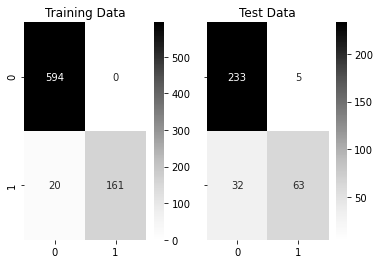

In [547]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(L_y_train,gbcl_ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(L_y_test,gbcl_ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [548]:
print('Classification Report of the training data:\n\n',classification_report(L_y_train, gbcl_ytrain_predict), '\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.97      1.00      0.98       594
           1       1.00      0.89      0.94       181

    accuracy                           0.97       775
   macro avg       0.98      0.94      0.96       775
weighted avg       0.98      0.97      0.97       775
 



In [549]:
print('Classification Report of the test data:\n\n',classification_report(L_y_test,gbcl_ytest_predict),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      0.98      0.93       238
           1       0.93      0.66      0.77        95

    accuracy                           0.89       333
   macro avg       0.90      0.82      0.85       333
weighted avg       0.89      0.89      0.88       333
 



In [550]:
gbcl_metrics=classification_report(L_y_train,gbcl_ytrain_predict,output_dict=True)
dfm=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_f1=round(dfm.loc["1"][2],2)
gbcl_train_recall=round(dfm.loc["1"][1],2)
gbcl_train_precision=round(dfm.loc["1"][0],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

gbcl_train_precision  1.0
gbcl_train_recall  0.89
gbcl_train_f1  0.94


In [551]:
gbcl_metrics=classification_report(L_y_test, gbcl_ytest_predict,output_dict=True)
dfm=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_precision=round(dfm.loc["1"][0],2)
gbcl_test_recall=round(dfm.loc["1"][1],2)
gbcl_test_f1=round(dfm.loc["1"][2],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.93
gbcl_test_recall  0.66
gbcl_test_f1  0.77


AUC for the Training Data: 0.997
AUC for the Test Data: 0.959


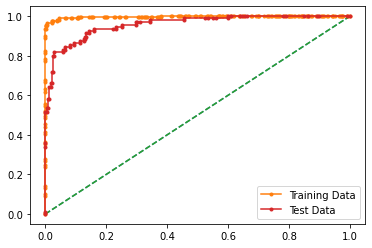

In [552]:
# AUC and ROC for the training data

# calculate AUC
gbcl_train_auc = metrics.roc_auc_score(L_y_train,gbcl_ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % gbcl_train_auc)

#  calculate roc curve
gbcl_fpr_train, gbcl_tpr_train, thresholds = metrics.roc_curve(L_y_train,gbcl_ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_fpr_train, gbcl_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
gbcl_test_auc = metrics.roc_auc_score(L_y_test,gbcl_ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % gbcl_test_auc)

#  calculate roc curve
gbcl_fpr_test, gbcl_tpr_test, thresholds = metrics.roc_curve(L_y_test,gbcl_ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_fpr_test, gbcl_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Model Comparison

In [576]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[LR_train_score,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
        'LR Test':[LR_test_score,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
          'TLR Train':[TLR_train_score,TLR_train_auc,TLR_train_recall,TLR_train_precision,TLR_train_f1],
        'TLR Test':[TLR_test_score,TLR_test_auc,TLR_test_recall,TLR_test_precision,TLR_test_f1],           
       'LDA Train':[LDA_train_score,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_score,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
       'DT Train':[dt_train_score,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'DT Test':[dt_test_score,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
         'NB Train':[NB_train_score,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[NB_test_score,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
          'ANN Train':[Lclf_train_score,Lclf_train_auc,Lclf_train_recall,Lclf_train_precision,Lclf_train_f1],
        'ANN Test':[Lclf_test_score,Lclf_test_auc,Lclf_test_recall,Lclf_test_precision,Lclf_test_f1],           
         'RF Train':[Lrf_train_score,Lrf_train_auc,Lrf_train_recall,Lrf_train_precision,Lrf_train_f1],
        'RF Test':[Lrf_test_score,Lrf_test_auc,Lrf_test_recall,Lrf_test_precision,Lrf_test_f1],
        'TRF Train':[rf_train_score,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'TRF Test':[rf_test_score,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'BAGGIBG Train':[bgcl_train_score,bgcl_train_auc,bgcl_train_recall,bgcl_train_precision,bgcl_train_f1],
        'BAGGIBG Test':[bgcl_test_score,bgcl_test_auc,bgcl_test_recall,bgcl_test_precision,bgcl_test_f1],
         'ADA Train':[ADB_train_score,ADB_train_auc,ADB_train_recall,ADB_train_precision,ADB_train_f1],
        'ADA Test':[ADB_test_score,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1],
         'GB Train':[gbcl_train_score,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
        'GB Test':[gbcl_test_score,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],
                    },index=index)
pd.set_option('display.max_columns', None)
round(data,2)


,LR Train,LR Test,TLR Train,TLR Test,LDA Train,LDA Test,DT Train,DT Test,NB Train,NB Test,ANN Train,ANN Test,RF Train,RF Test,TRF Train,TRF Test,BAGGIBG Train,BAGGIBG Test,ADA Train,ADA Test,GB Train,GB Test
Accuracy,0.84,0.82,0.72,0.75,0.84,0.82,0.87,0.79,0.83,0.80,0.95,0.87,1.0,0.95,0.92,0.86,0.87,0.81,0.91,0.86,0.97,0.89
AUC,0.81,0.86,0.81,0.86,0.81,0.86,0.92,0.85,0.79,0.85,0.93,0.87,1.0,0.95,0.99,0.95,0.96,0.93,0.98,0.92,1.00,0.96
Recall,0.45,0.45,0.72,0.80,0.45,0.46,0.58,0.45,0.46,0.47,0.90,0.83,1.0,0.91,0.67,0.54,0.49,0.38,0.72,0.61,0.89,0.66
Precision,0.76,0.84,0.44,0.55,0.76,0.85,0.82,0.70,0.72,0.74,0.89,0.81,1.0,0.99,1.00,0.94,0.96,0.88,0.89,0.87,1.00,0.93
F1 Score,0.56,0.59,0.55,0.65,0.56,0.60,0.68,0.55,0.56,0.58,0.89,0.82,1.0,0.95,0.80,0.68,0.64,0.53,0.80,0.72,0.94,0.77


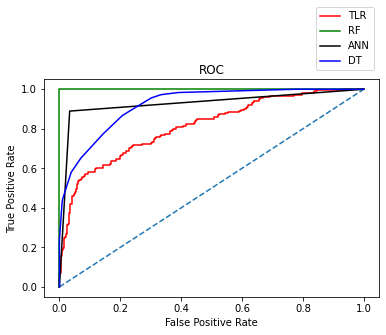

In [577]:
#ROC Curve for the 4 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(TLR_fpr_train, TLR_tpr_train,color='red',label="TLR")
plt.plot(Lrf_fpr_train,Lrf_tpr_train,color='green',label="RF")
plt.plot(Lclf_fpr_train,Lclf_tpr_train,color='black',label="ANN")
plt.plot(dt_fpr_train,dt_tpr_train,color='blue',label="DT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

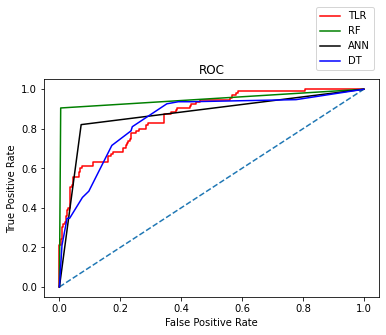

In [578]:
#ROC Curve for the 4 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(TLR_fpr_test, TLR_tpr_test,color='red',label="TLR")
plt.plot(Lrf_fpr_test,Lrf_tpr_test,color='green',label="RF")
plt.plot(Lclf_fpr_test,Lclf_tpr_test,color='black',label="ANN")
plt.plot(dt_fpr_test,dt_tpr_test,color='blue',label="DT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')